In [1445]:
import pandas as pd
from datetime import datetime
from bs4 import BeautifulSoup
import csv
import re 
import requests
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from scipy import stats
%matplotlib inline

## 1.1 Web scraping

In [1116]:
# Step 1: Saving all urls for each house in a data frame
boligsiden = pd.read_csv('/Users/madshelt/Dropbox/NYC Data Science Academy/Week5/Selenium/boligsiden.csv', skiprows=0)
boligsiden.columns = ['typehus', 'vaerelse', 'postnummer', 'adresse', 'energimaerke', 'href','grundareal']
url_list = boligsiden['href']

In [1117]:
# Step 2: Extracting variables from every url into a data frame 

df = pd.DataFrame()
i = 0
end = len(url_list)
for url in url_list:
    response = requests.get(url).text
    soup = BeautifulSoup(response, 'html.parser')
    try:
        ejendomsvaerdi = soup.find_all('div', attrs={'class': 'card__block'})[0].find_all('tr')[2].text[13:]
    except:
        ejendomsvaerdi = ''
    try:
        salgspris = soup.find_all('div', attrs={'class': 'card__block'})[0].find_all('tr')[7].text[10:]
    except:
        salgspris = ''
    salgsdato = soup.find_all('div', attrs={'class': 'card__block'})[0].find_all('tr')[7].text[:10]
    liggetid_start = soup.find_all('div', attrs={'class': 'card__block'})[0].find_all('tr')[11].text[7:17]
    liggetid_slut = soup.find_all('div', attrs={'class': 'card__block'})[0].find_all('tr')[11].text[20:]
    udbudspris = soup.find_all('div', attrs={'class': 'card__block'})[0].find_all('tr')[12].text[10:]
    boligareal = soup.find_all('div', attrs={'class': 'card__block'})[1].find_all('tr')[1].text[19:-4]
    antal_plan = soup.find_all('div', attrs={'class': 'card__block'})[1].find_all('tr')[5].text[12:]
    byggeaar = soup.find_all('div', attrs={'class': 'card__block'})[1].find_all('tr')[6].text[9:]
    ydervaegsmateriale = soup.find_all('div', attrs={'class': 'card__block'})[1].find_all('tr')[8].text[19:]
    varmekilde = soup.find_all('div', attrs={'class': 'card__block'})[1].find_all('tr')[9].text[12:]
    href = url

    df = df.append(pd.DataFrame({'ejendomsvaerdi': [ejendomsvaerdi],
                                'salgspris': [salgspris],
                                'salgsdato': [salgsdato],
                                'liggetid_start': [liggetid_start],
                                'liggetid_slut': [liggetid_slut],
                                'udbudspris': [udbudspris],
                                'boligareal': [boligareal],
                                'antal_plan': [antal_plan],
                                'byggeaar': [byggeaar],
                                'ydervaegsmateriale': [ydervaegsmateriale],
                                'varmekilde': [varmekilde],
                                'href': [href]}))
    
    print('Finished url ' + str(i) + ": " + url)
    i += 1
    if i == end:
        print("Finished scraping")

Finished url 0: https://www.boligsiden.dk/arkiv/238054659
Finished url 1: https://www.boligsiden.dk/arkiv/946315563
Finished url 2: https://www.boligsiden.dk/arkiv/386865360
Finished url 3: https://www.boligsiden.dk/arkiv/593073569
Finished url 4: https://www.boligsiden.dk/arkiv/332168039
Finished url 5: https://www.boligsiden.dk/arkiv/892847913
Finished url 6: https://www.boligsiden.dk/arkiv/136494454
Finished url 7: https://www.boligsiden.dk/arkiv/553724525
Finished url 8: https://www.boligsiden.dk/arkiv/937958344
Finished url 9: https://www.boligsiden.dk/arkiv/377036888
Finished url 10: https://www.boligsiden.dk/arkiv/113582561
Finished url 11: https://www.boligsiden.dk/arkiv/382518997
Finished url 12: https://www.boligsiden.dk/arkiv/721392697
Finished url 13: https://www.boligsiden.dk/arkiv/643485125
Finished url 14: https://www.boligsiden.dk/arkiv/294962351
Finished url 15: https://www.boligsiden.dk/arkiv/692188117
Finished url 16: https://www.boligsiden.dk/arkiv/462601603
Finishe

Finished url 139: https://www.boligsiden.dk/arkiv/440010196
Finished url 140: https://www.boligsiden.dk/arkiv/291298351
Finished url 141: https://www.boligsiden.dk/arkiv/729370630
Finished url 142: https://www.boligsiden.dk/arkiv/618073968
Finished url 143: https://www.boligsiden.dk/arkiv/293879017
Finished url 144: https://www.boligsiden.dk/arkiv/239210979
Finished url 145: https://www.boligsiden.dk/arkiv/680612196
Finished url 146: https://www.boligsiden.dk/arkiv/481017546
Finished url 147: https://www.boligsiden.dk/arkiv/638881956
Finished url 148: https://www.boligsiden.dk/arkiv/705678443
Finished url 149: https://www.boligsiden.dk/arkiv/934826250
Finished url 150: https://www.boligsiden.dk/arkiv/405668383
Finished url 151: https://www.boligsiden.dk/arkiv/757563649
Finished url 152: https://www.boligsiden.dk/arkiv/850759662
Finished url 153: https://www.boligsiden.dk/arkiv/498275586
Finished url 154: https://www.boligsiden.dk/arkiv/544957161
Finished url 155: https://www.boligsiden

Finished url 276: https://www.boligsiden.dk/arkiv/884757650
Finished url 277: https://www.boligsiden.dk/arkiv/508716497
Finished url 278: https://www.boligsiden.dk/arkiv/950967662
Finished url 279: https://www.boligsiden.dk/arkiv/758605265
Finished url 280: https://www.boligsiden.dk/arkiv/665225690
Finished url 281: https://www.boligsiden.dk/arkiv/374977940
Finished url 282: https://www.boligsiden.dk/arkiv/143778476
Finished url 283: https://www.boligsiden.dk/arkiv/938018409
Finished url 284: https://www.boligsiden.dk/arkiv/184815401
Finished url 285: https://www.boligsiden.dk/arkiv/224246169
Finished url 286: https://www.boligsiden.dk/arkiv/715270745
Finished url 287: https://www.boligsiden.dk/arkiv/795937119
Finished url 288: https://www.boligsiden.dk/arkiv/109695371
Finished url 289: https://www.boligsiden.dk/arkiv/560763318
Finished url 290: https://www.boligsiden.dk/arkiv/930117026
Finished url 291: https://www.boligsiden.dk/arkiv/632671623
Finished url 292: https://www.boligsiden

Finished url 413: https://www.boligsiden.dk/arkiv/334694293
Finished url 414: https://www.boligsiden.dk/arkiv/792704439
Finished url 415: https://www.boligsiden.dk/arkiv/135919045
Finished url 416: https://www.boligsiden.dk/arkiv/499309724
Finished url 417: https://www.boligsiden.dk/arkiv/940296994
Finished url 418: https://www.boligsiden.dk/arkiv/976691370
Finished url 419: https://www.boligsiden.dk/arkiv/547529467
Finished url 420: https://www.boligsiden.dk/arkiv/627383575
Finished url 421: https://www.boligsiden.dk/arkiv/555486178
Finished url 422: https://www.boligsiden.dk/arkiv/361423951
Finished url 423: https://www.boligsiden.dk/arkiv/409962853
Finished url 424: https://www.boligsiden.dk/arkiv/836441436
Finished url 425: https://www.boligsiden.dk/arkiv/727214173
Finished url 426: https://www.boligsiden.dk/arkiv/737923517
Finished url 427: https://www.boligsiden.dk/arkiv/453306331
Finished url 428: https://www.boligsiden.dk/arkiv/685191255
Finished url 429: https://www.boligsiden

Finished url 550: https://www.boligsiden.dk/arkiv/922826065
Finished url 551: https://www.boligsiden.dk/arkiv/441375738
Finished url 552: https://www.boligsiden.dk/arkiv/904192041
Finished url 553: https://www.boligsiden.dk/arkiv/917827069
Finished url 554: https://www.boligsiden.dk/arkiv/829025160
Finished url 555: https://www.boligsiden.dk/arkiv/974103677
Finished url 556: https://www.boligsiden.dk/arkiv/629153095
Finished url 557: https://www.boligsiden.dk/arkiv/520081042
Finished url 558: https://www.boligsiden.dk/arkiv/313112416
Finished url 559: https://www.boligsiden.dk/arkiv/160252704
Finished url 560: https://www.boligsiden.dk/arkiv/188390071
Finished url 561: https://www.boligsiden.dk/arkiv/934066840
Finished url 562: https://www.boligsiden.dk/arkiv/375722960
Finished url 563: https://www.boligsiden.dk/arkiv/916678342
Finished url 564: https://www.boligsiden.dk/arkiv/102260561
Finished url 565: https://www.boligsiden.dk/arkiv/219314782
Finished url 566: https://www.boligsiden

Finished url 687: https://www.boligsiden.dk/arkiv/796534115
Finished url 688: https://www.boligsiden.dk/arkiv/359749306
Finished url 689: https://www.boligsiden.dk/arkiv/482394314
Finished url 690: https://www.boligsiden.dk/arkiv/178423723
Finished url 691: https://www.boligsiden.dk/arkiv/633347184
Finished url 692: https://www.boligsiden.dk/arkiv/750433846
Finished url 693: https://www.boligsiden.dk/arkiv/854571486
Finished url 694: https://www.boligsiden.dk/arkiv/984223432
Finished url 695: https://www.boligsiden.dk/arkiv/422249416
Finished url 696: https://www.boligsiden.dk/arkiv/280794169
Finished url 697: https://www.boligsiden.dk/arkiv/760098286
Finished url 698: https://www.boligsiden.dk/arkiv/243488454
Finished url 699: https://www.boligsiden.dk/arkiv/926712551
Finished url 700: https://www.boligsiden.dk/arkiv/420025614
Finished url 701: https://www.boligsiden.dk/arkiv/434423094
Finished url 702: https://www.boligsiden.dk/arkiv/737123650
Finished url 703: https://www.boligsiden

Finished url 824: https://www.boligsiden.dk/arkiv/814672558
Finished url 825: https://www.boligsiden.dk/arkiv/183279919
Finished url 826: https://www.boligsiden.dk/arkiv/872791480
Finished url 827: https://www.boligsiden.dk/arkiv/896757511
Finished url 828: https://www.boligsiden.dk/arkiv/936775961
Finished url 829: https://www.boligsiden.dk/arkiv/380677485
Finished url 830: https://www.boligsiden.dk/arkiv/866301363
Finished url 831: https://www.boligsiden.dk/arkiv/300883191
Finished url 832: https://www.boligsiden.dk/arkiv/115513828
Finished url 833: https://www.boligsiden.dk/arkiv/938683125
Finished url 834: https://www.boligsiden.dk/arkiv/769139977
Finished url 835: https://www.boligsiden.dk/arkiv/923924109
Finished url 836: https://www.boligsiden.dk/arkiv/567046520
Finished url 837: https://www.boligsiden.dk/arkiv/725148234
Finished url 838: https://www.boligsiden.dk/arkiv/969893711
Finished url 839: https://www.boligsiden.dk/arkiv/728869014
Finished url 840: https://www.boligsiden

Finished url 961: https://www.boligsiden.dk/arkiv/377147163
Finished url 962: https://www.boligsiden.dk/arkiv/847422775
Finished url 963: https://www.boligsiden.dk/arkiv/432694771
Finished url 964: https://www.boligsiden.dk/arkiv/767918078
Finished url 965: https://www.boligsiden.dk/arkiv/193834975
Finished url 966: https://www.boligsiden.dk/arkiv/941633291
Finished url 967: https://www.boligsiden.dk/arkiv/262773703
Finished url 968: https://www.boligsiden.dk/arkiv/756358063
Finished url 969: https://www.boligsiden.dk/arkiv/340751619
Finished url 970: https://www.boligsiden.dk/arkiv/462141339
Finished url 971: https://www.boligsiden.dk/arkiv/804569747
Finished url 972: https://www.boligsiden.dk/arkiv/920640065
Finished url 973: https://www.boligsiden.dk/arkiv/408638661
Finished url 974: https://www.boligsiden.dk/arkiv/419390858
Finished url 975: https://www.boligsiden.dk/arkiv/909275117
Finished url 976: https://www.boligsiden.dk/arkiv/185401175
Finished url 977: https://www.boligsiden

Finished url 1096: https://www.boligsiden.dk/arkiv/332536516
Finished url 1097: https://www.boligsiden.dk/arkiv/878854022
Finished url 1098: https://www.boligsiden.dk/arkiv/509275270
Finished url 1099: https://www.boligsiden.dk/arkiv/986346501
Finished url 1100: https://www.boligsiden.dk/arkiv/128739802
Finished url 1101: https://www.boligsiden.dk/arkiv/245053376
Finished url 1102: https://www.boligsiden.dk/arkiv/131767775
Finished url 1103: https://www.boligsiden.dk/arkiv/132379506
Finished url 1104: https://www.boligsiden.dk/arkiv/958267106
Finished url 1105: https://www.boligsiden.dk/arkiv/561808635
Finished url 1106: https://www.boligsiden.dk/arkiv/671755863
Finished url 1107: https://www.boligsiden.dk/arkiv/175983013
Finished url 1108: https://www.boligsiden.dk/arkiv/610373811
Finished url 1109: https://www.boligsiden.dk/arkiv/278160253
Finished url 1110: https://www.boligsiden.dk/arkiv/332788707
Finished url 1111: https://www.boligsiden.dk/arkiv/232342996
Finished url 1112: https

Finished url 1231: https://www.boligsiden.dk/arkiv/883041725
Finished url 1232: https://www.boligsiden.dk/arkiv/911504185
Finished url 1233: https://www.boligsiden.dk/arkiv/810441770
Finished url 1234: https://www.boligsiden.dk/arkiv/493253300
Finished url 1235: https://www.boligsiden.dk/arkiv/421091322
Finished url 1236: https://www.boligsiden.dk/arkiv/336701004
Finished url 1237: https://www.boligsiden.dk/arkiv/985319597
Finished url 1238: https://www.boligsiden.dk/arkiv/564129093
Finished url 1239: https://www.boligsiden.dk/arkiv/481864312
Finished url 1240: https://www.boligsiden.dk/arkiv/900004547
Finished url 1241: https://www.boligsiden.dk/arkiv/729345568
Finished url 1242: https://www.boligsiden.dk/arkiv/758575166
Finished url 1243: https://www.boligsiden.dk/arkiv/514336164
Finished url 1244: https://www.boligsiden.dk/arkiv/944282144
Finished url 1245: https://www.boligsiden.dk/arkiv/102458095
Finished url 1246: https://www.boligsiden.dk/arkiv/212601066
Finished url 1247: https

Finished url 1366: https://www.boligsiden.dk/arkiv/810693578
Finished url 1367: https://www.boligsiden.dk/arkiv/562739526
Finished url 1368: https://www.boligsiden.dk/arkiv/964910965
Finished url 1369: https://www.boligsiden.dk/arkiv/842475803
Finished url 1370: https://www.boligsiden.dk/arkiv/105043494
Finished url 1371: https://www.boligsiden.dk/arkiv/188239187
Finished url 1372: https://www.boligsiden.dk/arkiv/932229141
Finished url 1373: https://www.boligsiden.dk/arkiv/829428617
Finished url 1374: https://www.boligsiden.dk/arkiv/608187152
Finished url 1375: https://www.boligsiden.dk/arkiv/482554929
Finished url 1376: https://www.boligsiden.dk/arkiv/476565509
Finished url 1377: https://www.boligsiden.dk/arkiv/662644014
Finished url 1378: https://www.boligsiden.dk/arkiv/635915555
Finished url 1379: https://www.boligsiden.dk/arkiv/433315908
Finished url 1380: https://www.boligsiden.dk/arkiv/109574766
Finished url 1381: https://www.boligsiden.dk/arkiv/487472463
Finished url 1382: https

Finished url 1501: https://www.boligsiden.dk/arkiv/774290980
Finished url 1502: https://www.boligsiden.dk/arkiv/563727049
Finished url 1503: https://www.boligsiden.dk/arkiv/632727535
Finished url 1504: https://www.boligsiden.dk/arkiv/905328997
Finished url 1505: https://www.boligsiden.dk/arkiv/596803578
Finished url 1506: https://www.boligsiden.dk/arkiv/540522224
Finished url 1507: https://www.boligsiden.dk/arkiv/337835032
Finished url 1508: https://www.boligsiden.dk/arkiv/686547293
Finished url 1509: https://www.boligsiden.dk/arkiv/882437846
Finished url 1510: https://www.boligsiden.dk/arkiv/474780379
Finished url 1511: https://www.boligsiden.dk/arkiv/509298120
Finished url 1512: https://www.boligsiden.dk/arkiv/805524872
Finished url 1513: https://www.boligsiden.dk/arkiv/960127772
Finished url 1514: https://www.boligsiden.dk/arkiv/117955697
Finished url 1515: https://www.boligsiden.dk/arkiv/836777869
Finished url 1516: https://www.boligsiden.dk/arkiv/742400250
Finished url 1517: https

Finished url 1636: https://www.boligsiden.dk/arkiv/197025310
Finished url 1637: https://www.boligsiden.dk/arkiv/720252328
Finished url 1638: https://www.boligsiden.dk/arkiv/434802477
Finished url 1639: https://www.boligsiden.dk/arkiv/978923314
Finished url 1640: https://www.boligsiden.dk/arkiv/228779217
Finished url 1641: https://www.boligsiden.dk/arkiv/307002676
Finished url 1642: https://www.boligsiden.dk/arkiv/652463347
Finished url 1643: https://www.boligsiden.dk/arkiv/877785812
Finished url 1644: https://www.boligsiden.dk/arkiv/421801092
Finished url 1645: https://www.boligsiden.dk/arkiv/662947831
Finished url 1646: https://www.boligsiden.dk/arkiv/199536433
Finished url 1647: https://www.boligsiden.dk/arkiv/989946130
Finished url 1648: https://www.boligsiden.dk/arkiv/930260587
Finished url 1649: https://www.boligsiden.dk/arkiv/225233683
Finished url 1650: https://www.boligsiden.dk/arkiv/170680223
Finished url 1651: https://www.boligsiden.dk/arkiv/927287175
Finished url 1652: https

Finished url 1771: https://www.boligsiden.dk/arkiv/381412433
Finished url 1772: https://www.boligsiden.dk/arkiv/747213107
Finished url 1773: https://www.boligsiden.dk/arkiv/840559500
Finished url 1774: https://www.boligsiden.dk/arkiv/655652341
Finished url 1775: https://www.boligsiden.dk/arkiv/239152672
Finished url 1776: https://www.boligsiden.dk/arkiv/361633609
Finished url 1777: https://www.boligsiden.dk/arkiv/459954279
Finished url 1778: https://www.boligsiden.dk/arkiv/462544761
Finished url 1779: https://www.boligsiden.dk/arkiv/850537058
Finished url 1780: https://www.boligsiden.dk/arkiv/565189859
Finished url 1781: https://www.boligsiden.dk/arkiv/969514649
Finished url 1782: https://www.boligsiden.dk/arkiv/768230328
Finished url 1783: https://www.boligsiden.dk/arkiv/691360731
Finished url 1784: https://www.boligsiden.dk/arkiv/433912708
Finished url 1785: https://www.boligsiden.dk/arkiv/241159536
Finished url 1786: https://www.boligsiden.dk/arkiv/256772496
Finished url 1787: https

Finished url 1906: https://www.boligsiden.dk/arkiv/417875868
Finished url 1907: https://www.boligsiden.dk/arkiv/386277878
Finished url 1908: https://www.boligsiden.dk/arkiv/512674684
Finished url 1909: https://www.boligsiden.dk/arkiv/880691743
Finished url 1910: https://www.boligsiden.dk/arkiv/547121921
Finished url 1911: https://www.boligsiden.dk/arkiv/771172278
Finished url 1912: https://www.boligsiden.dk/arkiv/853005972
Finished url 1913: https://www.boligsiden.dk/arkiv/294035398
Finished url 1914: https://www.boligsiden.dk/arkiv/910904093
Finished url 1915: https://www.boligsiden.dk/arkiv/116375560
Finished url 1916: https://www.boligsiden.dk/arkiv/238446598
Finished url 1917: https://www.boligsiden.dk/arkiv/933486829
Finished url 1918: https://www.boligsiden.dk/arkiv/781081566
Finished url 1919: https://www.boligsiden.dk/arkiv/326844081
Finished url 1920: https://www.boligsiden.dk/arkiv/144815210
Finished url 1921: https://www.boligsiden.dk/arkiv/973731700
Finished url 1922: https

Finished url 2041: https://www.boligsiden.dk/arkiv/361345006
Finished url 2042: https://www.boligsiden.dk/arkiv/983827960
Finished url 2043: https://www.boligsiden.dk/arkiv/753516068
Finished url 2044: https://www.boligsiden.dk/arkiv/998902358
Finished url 2045: https://www.boligsiden.dk/arkiv/534055608
Finished url 2046: https://www.boligsiden.dk/arkiv/178122343
Finished url 2047: https://www.boligsiden.dk/arkiv/405196296
Finished url 2048: https://www.boligsiden.dk/arkiv/252010176
Finished url 2049: https://www.boligsiden.dk/arkiv/145257109
Finished url 2050: https://www.boligsiden.dk/arkiv/905144519
Finished url 2051: https://www.boligsiden.dk/arkiv/489681342
Finished url 2052: https://www.boligsiden.dk/arkiv/638241805
Finished url 2053: https://www.boligsiden.dk/arkiv/187998137
Finished url 2054: https://www.boligsiden.dk/arkiv/720208741
Finished url 2055: https://www.boligsiden.dk/arkiv/259844500
Finished url 2056: https://www.boligsiden.dk/arkiv/378392268
Finished url 2057: https

Finished url 2176: https://www.boligsiden.dk/arkiv/549111355
Finished url 2177: https://www.boligsiden.dk/arkiv/666079916
Finished url 2178: https://www.boligsiden.dk/arkiv/777757488
Finished url 2179: https://www.boligsiden.dk/arkiv/269551485
Finished url 2180: https://www.boligsiden.dk/arkiv/340323779
Finished url 2181: https://www.boligsiden.dk/arkiv/789422591
Finished url 2182: https://www.boligsiden.dk/arkiv/580121809
Finished url 2183: https://www.boligsiden.dk/arkiv/274372316
Finished url 2184: https://www.boligsiden.dk/arkiv/276590343
Finished url 2185: https://www.boligsiden.dk/arkiv/440624868
Finished url 2186: https://www.boligsiden.dk/arkiv/464694380
Finished url 2187: https://www.boligsiden.dk/arkiv/693196838
Finished url 2188: https://www.boligsiden.dk/arkiv/325167278
Finished url 2189: https://www.boligsiden.dk/arkiv/920030190
Finished url 2190: https://www.boligsiden.dk/arkiv/561606077
Finished url 2191: https://www.boligsiden.dk/arkiv/542664841
Finished url 2192: https

Finished url 2311: https://www.boligsiden.dk/arkiv/767634351
Finished url 2312: https://www.boligsiden.dk/arkiv/472527756
Finished url 2313: https://www.boligsiden.dk/arkiv/329980872
Finished url 2314: https://www.boligsiden.dk/arkiv/436037301
Finished url 2315: https://www.boligsiden.dk/arkiv/213319904
Finished url 2316: https://www.boligsiden.dk/arkiv/478719861
Finished url 2317: https://www.boligsiden.dk/arkiv/442872833
Finished url 2318: https://www.boligsiden.dk/arkiv/809936297
Finished url 2319: https://www.boligsiden.dk/arkiv/177817619
Finished url 2320: https://www.boligsiden.dk/arkiv/400553975
Finished url 2321: https://www.boligsiden.dk/arkiv/599927891
Finished url 2322: https://www.boligsiden.dk/arkiv/391368920
Finished url 2323: https://www.boligsiden.dk/arkiv/455476362
Finished url 2324: https://www.boligsiden.dk/arkiv/828130675
Finished url 2325: https://www.boligsiden.dk/arkiv/584022073
Finished url 2326: https://www.boligsiden.dk/arkiv/336550935
Finished url 2327: https

Finished url 2446: https://www.boligsiden.dk/arkiv/554523434
Finished url 2447: https://www.boligsiden.dk/arkiv/351855219
Finished url 2448: https://www.boligsiden.dk/arkiv/969980512
Finished url 2449: https://www.boligsiden.dk/arkiv/379523481
Finished url 2450: https://www.boligsiden.dk/arkiv/875846518
Finished url 2451: https://www.boligsiden.dk/arkiv/566432124
Finished url 2452: https://www.boligsiden.dk/arkiv/395193985
Finished url 2453: https://www.boligsiden.dk/arkiv/217727332
Finished url 2454: https://www.boligsiden.dk/arkiv/621687425
Finished url 2455: https://www.boligsiden.dk/arkiv/398607098
Finished url 2456: https://www.boligsiden.dk/arkiv/734273168
Finished url 2457: https://www.boligsiden.dk/arkiv/356900988
Finished url 2458: https://www.boligsiden.dk/arkiv/990304283
Finished url 2459: https://www.boligsiden.dk/arkiv/589111916
Finished url 2460: https://www.boligsiden.dk/arkiv/965357492
Finished url 2461: https://www.boligsiden.dk/arkiv/507470557
Finished url 2462: https

Finished url 2581: https://www.boligsiden.dk/arkiv/483572634
Finished url 2582: https://www.boligsiden.dk/arkiv/346793910
Finished url 2583: https://www.boligsiden.dk/arkiv/203155425
Finished url 2584: https://www.boligsiden.dk/arkiv/450290235
Finished url 2585: https://www.boligsiden.dk/arkiv/261569781
Finished url 2586: https://www.boligsiden.dk/arkiv/815723472
Finished url 2587: https://www.boligsiden.dk/arkiv/155869752
Finished url 2588: https://www.boligsiden.dk/arkiv/461349770
Finished url 2589: https://www.boligsiden.dk/arkiv/196615457
Finished url 2590: https://www.boligsiden.dk/arkiv/652380543
Finished url 2591: https://www.boligsiden.dk/arkiv/137233146
Finished url 2592: https://www.boligsiden.dk/arkiv/351749720
Finished url 2593: https://www.boligsiden.dk/arkiv/454026177
Finished url 2594: https://www.boligsiden.dk/arkiv/209721985
Finished url 2595: https://www.boligsiden.dk/arkiv/844369204
Finished url 2596: https://www.boligsiden.dk/arkiv/213512325
Finished url 2597: https

Finished url 2716: https://www.boligsiden.dk/arkiv/521364736
Finished url 2717: https://www.boligsiden.dk/arkiv/850130417
Finished url 2718: https://www.boligsiden.dk/arkiv/889961371
Finished url 2719: https://www.boligsiden.dk/arkiv/657484019
Finished url 2720: https://www.boligsiden.dk/arkiv/741629414
Finished url 2721: https://www.boligsiden.dk/arkiv/442023916
Finished url 2722: https://www.boligsiden.dk/arkiv/411828195
Finished url 2723: https://www.boligsiden.dk/arkiv/938836031
Finished url 2724: https://www.boligsiden.dk/arkiv/776166177
Finished url 2725: https://www.boligsiden.dk/arkiv/846672564
Finished url 2726: https://www.boligsiden.dk/arkiv/530707667
Finished url 2727: https://www.boligsiden.dk/arkiv/413804433
Finished url 2728: https://www.boligsiden.dk/arkiv/691825776
Finished url 2729: https://www.boligsiden.dk/arkiv/459859328
Finished url 2730: https://www.boligsiden.dk/arkiv/123998871
Finished url 2731: https://www.boligsiden.dk/arkiv/626386431
Finished url 2732: https

Finished url 2851: https://www.boligsiden.dk/arkiv/792532554
Finished url 2852: https://www.boligsiden.dk/arkiv/378258723
Finished url 2853: https://www.boligsiden.dk/arkiv/468830650
Finished url 2854: https://www.boligsiden.dk/arkiv/850507926
Finished url 2855: https://www.boligsiden.dk/arkiv/937874819
Finished url 2856: https://www.boligsiden.dk/arkiv/315017200
Finished url 2857: https://www.boligsiden.dk/arkiv/875657756
Finished url 2858: https://www.boligsiden.dk/arkiv/332640021
Finished url 2859: https://www.boligsiden.dk/arkiv/582568451
Finished url 2860: https://www.boligsiden.dk/arkiv/863565286
Finished url 2861: https://www.boligsiden.dk/arkiv/986148844
Finished url 2862: https://www.boligsiden.dk/arkiv/985308801
Finished url 2863: https://www.boligsiden.dk/arkiv/476262458
Finished url 2864: https://www.boligsiden.dk/arkiv/121679730
Finished url 2865: https://www.boligsiden.dk/arkiv/998154341
Finished url 2866: https://www.boligsiden.dk/arkiv/195543759
Finished url 2867: https

Finished url 2986: https://www.boligsiden.dk/arkiv/907485938
Finished url 2987: https://www.boligsiden.dk/arkiv/978637776
Finished url 2988: https://www.boligsiden.dk/arkiv/280023268
Finished url 2989: https://www.boligsiden.dk/arkiv/225697785
Finished url 2990: https://www.boligsiden.dk/arkiv/618573198
Finished url 2991: https://www.boligsiden.dk/arkiv/885499277
Finished url 2992: https://www.boligsiden.dk/arkiv/992219260
Finished url 2993: https://www.boligsiden.dk/arkiv/939636567
Finished url 2994: https://www.boligsiden.dk/arkiv/491324556
Finished url 2995: https://www.boligsiden.dk/arkiv/854147960
Finished url 2996: https://www.boligsiden.dk/arkiv/166872206
Finished url 2997: https://www.boligsiden.dk/arkiv/234520188
Finished url 2998: https://www.boligsiden.dk/arkiv/692261228
Finished url 2999: https://www.boligsiden.dk/arkiv/144912131
Finished url 3000: https://www.boligsiden.dk/arkiv/918531299
Finished url 3001: https://www.boligsiden.dk/arkiv/410701573
Finished url 3002: https

Finished url 3121: https://www.boligsiden.dk/arkiv/487249690
Finished url 3122: https://www.boligsiden.dk/arkiv/744444521
Finished url 3123: https://www.boligsiden.dk/arkiv/544728055
Finished url 3124: https://www.boligsiden.dk/arkiv/585175245
Finished url 3125: https://www.boligsiden.dk/arkiv/428496229
Finished url 3126: https://www.boligsiden.dk/arkiv/950889764
Finished url 3127: https://www.boligsiden.dk/arkiv/659308818
Finished url 3128: https://www.boligsiden.dk/arkiv/758787248
Finished url 3129: https://www.boligsiden.dk/arkiv/907098012
Finished url 3130: https://www.boligsiden.dk/arkiv/865390273
Finished url 3131: https://www.boligsiden.dk/arkiv/571458206
Finished url 3132: https://www.boligsiden.dk/arkiv/480357002
Finished url 3133: https://www.boligsiden.dk/arkiv/736216793
Finished url 3134: https://www.boligsiden.dk/arkiv/333117883
Finished url 3135: https://www.boligsiden.dk/arkiv/554154042
Finished url 3136: https://www.boligsiden.dk/arkiv/734395431
Finished url 3137: https

Finished url 3256: https://www.boligsiden.dk/arkiv/290205947
Finished url 3257: https://www.boligsiden.dk/arkiv/495621440
Finished url 3258: https://www.boligsiden.dk/arkiv/180101176
Finished url 3259: https://www.boligsiden.dk/arkiv/401614421
Finished url 3260: https://www.boligsiden.dk/arkiv/648680651
Finished url 3261: https://www.boligsiden.dk/arkiv/275037152
Finished url 3262: https://www.boligsiden.dk/arkiv/920968195
Finished url 3263: https://www.boligsiden.dk/arkiv/587956093
Finished url 3264: https://www.boligsiden.dk/arkiv/740134618
Finished url 3265: https://www.boligsiden.dk/arkiv/223917001
Finished url 3266: https://www.boligsiden.dk/arkiv/252800520
Finished url 3267: https://www.boligsiden.dk/arkiv/384544004
Finished url 3268: https://www.boligsiden.dk/arkiv/101574998
Finished url 3269: https://www.boligsiden.dk/arkiv/757023128
Finished url 3270: https://www.boligsiden.dk/arkiv/196061112
Finished url 3271: https://www.boligsiden.dk/arkiv/546780940
Finished url 3272: https

Finished url 3391: https://www.boligsiden.dk/arkiv/860391167
Finished url 3392: https://www.boligsiden.dk/arkiv/747491001
Finished url 3393: https://www.boligsiden.dk/arkiv/124288744
Finished url 3394: https://www.boligsiden.dk/arkiv/456870482
Finished url 3395: https://www.boligsiden.dk/arkiv/582237129
Finished url 3396: https://www.boligsiden.dk/arkiv/322323818
Finished url 3397: https://www.boligsiden.dk/arkiv/189547300
Finished url 3398: https://www.boligsiden.dk/arkiv/917351192
Finished url 3399: https://www.boligsiden.dk/arkiv/998633331
Finished url 3400: https://www.boligsiden.dk/arkiv/529287708
Finished url 3401: https://www.boligsiden.dk/arkiv/640625418
Finished url 3402: https://www.boligsiden.dk/arkiv/846210477
Finished url 3403: https://www.boligsiden.dk/arkiv/799262444
Finished url 3404: https://www.boligsiden.dk/arkiv/976008011
Finished url 3405: https://www.boligsiden.dk/arkiv/677456458
Finished url 3406: https://www.boligsiden.dk/arkiv/267755450
Finished url 3407: https

Finished url 3526: https://www.boligsiden.dk/arkiv/742404720
Finished url 3527: https://www.boligsiden.dk/arkiv/160246396
Finished url 3528: https://www.boligsiden.dk/arkiv/942163173
Finished url 3529: https://www.boligsiden.dk/arkiv/205681781
Finished url 3530: https://www.boligsiden.dk/arkiv/198391517
Finished url 3531: https://www.boligsiden.dk/arkiv/625143616
Finished url 3532: https://www.boligsiden.dk/arkiv/191408186
Finished url 3533: https://www.boligsiden.dk/arkiv/345374718
Finished url 3534: https://www.boligsiden.dk/arkiv/103439406
Finished url 3535: https://www.boligsiden.dk/arkiv/806631239
Finished url 3536: https://www.boligsiden.dk/arkiv/146710207
Finished url 3537: https://www.boligsiden.dk/arkiv/115347381
Finished url 3538: https://www.boligsiden.dk/arkiv/219358829
Finished url 3539: https://www.boligsiden.dk/arkiv/290445226
Finished url 3540: https://www.boligsiden.dk/arkiv/690543221
Finished url 3541: https://www.boligsiden.dk/arkiv/664766687
Finished url 3542: https

Finished url 3661: https://www.boligsiden.dk/arkiv/355849867
Finished url 3662: https://www.boligsiden.dk/arkiv/706301337
Finished url 3663: https://www.boligsiden.dk/arkiv/476908478
Finished url 3664: https://www.boligsiden.dk/arkiv/553562972
Finished url 3665: https://www.boligsiden.dk/arkiv/744764577
Finished url 3666: https://www.boligsiden.dk/arkiv/391038206
Finished url 3667: https://www.boligsiden.dk/arkiv/290156529
Finished url 3668: https://www.boligsiden.dk/arkiv/372928506
Finished url 3669: https://www.boligsiden.dk/arkiv/509946723
Finished url 3670: https://www.boligsiden.dk/arkiv/684353879
Finished url 3671: https://www.boligsiden.dk/arkiv/640078569
Finished url 3672: https://www.boligsiden.dk/arkiv/795127674
Finished url 3673: https://www.boligsiden.dk/arkiv/434995699
Finished url 3674: https://www.boligsiden.dk/arkiv/854047196
Finished url 3675: https://www.boligsiden.dk/arkiv/163700904
Finished url 3676: https://www.boligsiden.dk/arkiv/224035325
Finished url 3677: https

Finished url 3796: https://www.boligsiden.dk/arkiv/604367391
Finished url 3797: https://www.boligsiden.dk/arkiv/194919820
Finished url 3798: https://www.boligsiden.dk/arkiv/197068049
Finished url 3799: https://www.boligsiden.dk/arkiv/441843236
Finished url 3800: https://www.boligsiden.dk/arkiv/348897462
Finished url 3801: https://www.boligsiden.dk/arkiv/162611269
Finished url 3802: https://www.boligsiden.dk/arkiv/937593267
Finished url 3803: https://www.boligsiden.dk/arkiv/242543935
Finished url 3804: https://www.boligsiden.dk/arkiv/438230421
Finished url 3805: https://www.boligsiden.dk/arkiv/376464700
Finished url 3806: https://www.boligsiden.dk/arkiv/451670527
Finished url 3807: https://www.boligsiden.dk/arkiv/351625100
Finished url 3808: https://www.boligsiden.dk/arkiv/811771913
Finished url 3809: https://www.boligsiden.dk/arkiv/431348191
Finished url 3810: https://www.boligsiden.dk/arkiv/675738202
Finished url 3811: https://www.boligsiden.dk/arkiv/357098623
Finished url 3812: https

Finished url 3931: https://www.boligsiden.dk/arkiv/325072170
Finished url 3932: https://www.boligsiden.dk/arkiv/122592408
Finished url 3933: https://www.boligsiden.dk/arkiv/478214752
Finished url 3934: https://www.boligsiden.dk/arkiv/895206253
Finished url 3935: https://www.boligsiden.dk/arkiv/217679173
Finished url 3936: https://www.boligsiden.dk/arkiv/744022053
Finished url 3937: https://www.boligsiden.dk/arkiv/591725732
Finished url 3938: https://www.boligsiden.dk/arkiv/490732456
Finished url 3939: https://www.boligsiden.dk/arkiv/717255779
Finished url 3940: https://www.boligsiden.dk/arkiv/722942783
Finished url 3941: https://www.boligsiden.dk/arkiv/187672020
Finished url 3942: https://www.boligsiden.dk/arkiv/239733020
Finished url 3943: https://www.boligsiden.dk/arkiv/867027183
Finished url 3944: https://www.boligsiden.dk/arkiv/755555940
Finished url 3945: https://www.boligsiden.dk/arkiv/997927706
Finished url 3946: https://www.boligsiden.dk/arkiv/416051924
Finished url 3947: https

Finished url 4066: https://www.boligsiden.dk/arkiv/116068846
Finished url 4067: https://www.boligsiden.dk/arkiv/654611360
Finished url 4068: https://www.boligsiden.dk/arkiv/938280776
Finished url 4069: https://www.boligsiden.dk/arkiv/667664471
Finished url 4070: https://www.boligsiden.dk/arkiv/597788830
Finished url 4071: https://www.boligsiden.dk/arkiv/746821436
Finished url 4072: https://www.boligsiden.dk/arkiv/328682581
Finished url 4073: https://www.boligsiden.dk/arkiv/651539296
Finished url 4074: https://www.boligsiden.dk/arkiv/723932364
Finished url 4075: https://www.boligsiden.dk/arkiv/540858311
Finished url 4076: https://www.boligsiden.dk/arkiv/332202732
Finished url 4077: https://www.boligsiden.dk/arkiv/702148590
Finished url 4078: https://www.boligsiden.dk/arkiv/343417341
Finished url 4079: https://www.boligsiden.dk/arkiv/833657043
Finished url 4080: https://www.boligsiden.dk/arkiv/408502711
Finished url 4081: https://www.boligsiden.dk/arkiv/275260248
Finished url 4082: https

Finished url 4201: https://www.boligsiden.dk/arkiv/714252756
Finished url 4202: https://www.boligsiden.dk/arkiv/263420035
Finished url 4203: https://www.boligsiden.dk/arkiv/559338272
Finished url 4204: https://www.boligsiden.dk/arkiv/381272054
Finished url 4205: https://www.boligsiden.dk/arkiv/431165717
Finished url 4206: https://www.boligsiden.dk/arkiv/851641266
Finished url 4207: https://www.boligsiden.dk/arkiv/808077245
Finished url 4208: https://www.boligsiden.dk/arkiv/216657730
Finished url 4209: https://www.boligsiden.dk/arkiv/860520161
Finished url 4210: https://www.boligsiden.dk/arkiv/718270145
Finished url 4211: https://www.boligsiden.dk/arkiv/896763603
Finished url 4212: https://www.boligsiden.dk/arkiv/474767574
Finished url 4213: https://www.boligsiden.dk/arkiv/463831822
Finished url 4214: https://www.boligsiden.dk/arkiv/130003547
Finished url 4215: https://www.boligsiden.dk/arkiv/767241207
Finished url 4216: https://www.boligsiden.dk/arkiv/616345212
Finished url 4217: https

Finished url 4336: https://www.boligsiden.dk/arkiv/104336360
Finished url 4337: https://www.boligsiden.dk/arkiv/732518466
Finished url 4338: https://www.boligsiden.dk/arkiv/528839756
Finished url 4339: https://www.boligsiden.dk/arkiv/732118460
Finished url 4340: https://www.boligsiden.dk/arkiv/530601491
Finished url 4341: https://www.boligsiden.dk/arkiv/666707772
Finished url 4342: https://www.boligsiden.dk/arkiv/116670967
Finished url 4343: https://www.boligsiden.dk/arkiv/940253874
Finished url 4344: https://www.boligsiden.dk/arkiv/665008865
Finished url 4345: https://www.boligsiden.dk/arkiv/420013042
Finished url 4346: https://www.boligsiden.dk/arkiv/600841028
Finished url 4347: https://www.boligsiden.dk/arkiv/856861981
Finished url 4348: https://www.boligsiden.dk/arkiv/653358900
Finished url 4349: https://www.boligsiden.dk/arkiv/736579402
Finished url 4350: https://www.boligsiden.dk/arkiv/222416015
Finished url 4351: https://www.boligsiden.dk/arkiv/131193919
Finished url 4352: https

Finished url 4471: https://www.boligsiden.dk/arkiv/912386306
Finished url 4472: https://www.boligsiden.dk/arkiv/569335961
Finished url 4473: https://www.boligsiden.dk/arkiv/155011675
Finished url 4474: https://www.boligsiden.dk/arkiv/272378332
Finished url 4475: https://www.boligsiden.dk/arkiv/798188855
Finished url 4476: https://www.boligsiden.dk/arkiv/646394025
Finished url 4477: https://www.boligsiden.dk/arkiv/572660952
Finished url 4478: https://www.boligsiden.dk/arkiv/357177622
Finished url 4479: https://www.boligsiden.dk/arkiv/872232919
Finished url 4480: https://www.boligsiden.dk/arkiv/961670213
Finished url 4481: https://www.boligsiden.dk/arkiv/683121765
Finished url 4482: https://www.boligsiden.dk/arkiv/131383886
Finished url 4483: https://www.boligsiden.dk/arkiv/918426012
Finished url 4484: https://www.boligsiden.dk/arkiv/288656500
Finished url 4485: https://www.boligsiden.dk/arkiv/119599146
Finished url 4486: https://www.boligsiden.dk/arkiv/312918188
Finished url 4487: https

Finished url 4606: https://www.boligsiden.dk/arkiv/126043685
Finished url 4607: https://www.boligsiden.dk/arkiv/223594632
Finished url 4608: https://www.boligsiden.dk/arkiv/538381024
Finished url 4609: https://www.boligsiden.dk/arkiv/897406938
Finished url 4610: https://www.boligsiden.dk/arkiv/771075263
Finished url 4611: https://www.boligsiden.dk/arkiv/902442460
Finished url 4612: https://www.boligsiden.dk/arkiv/140717450
Finished url 4613: https://www.boligsiden.dk/arkiv/663546264
Finished url 4614: https://www.boligsiden.dk/arkiv/649457607
Finished url 4615: https://www.boligsiden.dk/arkiv/694863718
Finished url 4616: https://www.boligsiden.dk/arkiv/850806900
Finished url 4617: https://www.boligsiden.dk/arkiv/210682370
Finished url 4618: https://www.boligsiden.dk/arkiv/457494933
Finished url 4619: https://www.boligsiden.dk/arkiv/822218722
Finished url 4620: https://www.boligsiden.dk/arkiv/342245795
Finished url 4621: https://www.boligsiden.dk/arkiv/571352992
Finished url 4622: https

Finished url 4741: https://www.boligsiden.dk/arkiv/314402709
Finished url 4742: https://www.boligsiden.dk/arkiv/918177795
Finished url 4743: https://www.boligsiden.dk/arkiv/178671859
Finished url 4744: https://www.boligsiden.dk/arkiv/369233783
Finished url 4745: https://www.boligsiden.dk/arkiv/604730753
Finished url 4746: https://www.boligsiden.dk/arkiv/171240927
Finished url 4747: https://www.boligsiden.dk/arkiv/474551783
Finished url 4748: https://www.boligsiden.dk/arkiv/781350206
Finished url 4749: https://www.boligsiden.dk/arkiv/255134284
Finished url 4750: https://www.boligsiden.dk/arkiv/741257175
Finished url 4751: https://www.boligsiden.dk/arkiv/447440885
Finished url 4752: https://www.boligsiden.dk/arkiv/662526949
Finished url 4753: https://www.boligsiden.dk/arkiv/570813056
Finished url 4754: https://www.boligsiden.dk/arkiv/351315607
Finished url 4755: https://www.boligsiden.dk/arkiv/796435445
Finished url 4756: https://www.boligsiden.dk/arkiv/828504913
Finished url 4757: https

Finished url 4876: https://www.boligsiden.dk/arkiv/235415574
Finished url 4877: https://www.boligsiden.dk/arkiv/710970288
Finished url 4878: https://www.boligsiden.dk/arkiv/378834574
Finished url 4879: https://www.boligsiden.dk/arkiv/587351994
Finished url 4880: https://www.boligsiden.dk/arkiv/682070967
Finished url 4881: https://www.boligsiden.dk/arkiv/479751460
Finished url 4882: https://www.boligsiden.dk/arkiv/214926202
Finished url 4883: https://www.boligsiden.dk/arkiv/673214560
Finished url 4884: https://www.boligsiden.dk/arkiv/920092131
Finished url 4885: https://www.boligsiden.dk/arkiv/117679215
Finished url 4886: https://www.boligsiden.dk/arkiv/471163486
Finished url 4887: https://www.boligsiden.dk/arkiv/220377119
Finished url 4888: https://www.boligsiden.dk/arkiv/521065625
Finished url 4889: https://www.boligsiden.dk/arkiv/358770093
Finished url 4890: https://www.boligsiden.dk/arkiv/440709803
Finished url 4891: https://www.boligsiden.dk/arkiv/491816937
Finished url 4892: https

Finished url 5011: https://www.boligsiden.dk/arkiv/252268133
Finished url 5012: https://www.boligsiden.dk/arkiv/292412312
Finished url 5013: https://www.boligsiden.dk/arkiv/147275136
Finished url 5014: https://www.boligsiden.dk/arkiv/422998716
Finished url 5015: https://www.boligsiden.dk/arkiv/486335455
Finished url 5016: https://www.boligsiden.dk/arkiv/271211394
Finished url 5017: https://www.boligsiden.dk/arkiv/503435119
Finished url 5018: https://www.boligsiden.dk/arkiv/823983629
Finished url 5019: https://www.boligsiden.dk/arkiv/990683537
Finished url 5020: https://www.boligsiden.dk/arkiv/341766271
Finished url 5021: https://www.boligsiden.dk/arkiv/737361955
Finished url 5022: https://www.boligsiden.dk/arkiv/956495651
Finished url 5023: https://www.boligsiden.dk/arkiv/602550654
Finished url 5024: https://www.boligsiden.dk/arkiv/731885940
Finished url 5025: https://www.boligsiden.dk/arkiv/675527736
Finished url 5026: https://www.boligsiden.dk/arkiv/194072972
Finished url 5027: https

Finished url 5146: https://www.boligsiden.dk/arkiv/804055048
Finished url 5147: https://www.boligsiden.dk/arkiv/320024752
Finished url 5148: https://www.boligsiden.dk/arkiv/906552025
Finished url 5149: https://www.boligsiden.dk/arkiv/586169780
Finished url 5150: https://www.boligsiden.dk/arkiv/113594781
Finished url 5151: https://www.boligsiden.dk/arkiv/199197087
Finished url 5152: https://www.boligsiden.dk/arkiv/657777599
Finished url 5153: https://www.boligsiden.dk/arkiv/260849669
Finished url 5154: https://www.boligsiden.dk/arkiv/910650758
Finished url 5155: https://www.boligsiden.dk/arkiv/868292636
Finished url 5156: https://www.boligsiden.dk/arkiv/295805167
Finished url 5157: https://www.boligsiden.dk/arkiv/226790230
Finished url 5158: https://www.boligsiden.dk/arkiv/229034865
Finished url 5159: https://www.boligsiden.dk/arkiv/900529895
Finished url 5160: https://www.boligsiden.dk/arkiv/795224454
Finished url 5161: https://www.boligsiden.dk/arkiv/292407767
Finished url 5162: https

Finished url 5281: https://www.boligsiden.dk/arkiv/138549570
Finished url 5282: https://www.boligsiden.dk/arkiv/652330343
Finished url 5283: https://www.boligsiden.dk/arkiv/841617401
Finished url 5284: https://www.boligsiden.dk/arkiv/625065851
Finished url 5285: https://www.boligsiden.dk/arkiv/593763174
Finished url 5286: https://www.boligsiden.dk/arkiv/866394800
Finished url 5287: https://www.boligsiden.dk/arkiv/566298897
Finished url 5288: https://www.boligsiden.dk/arkiv/539872038
Finished url 5289: https://www.boligsiden.dk/arkiv/609624727
Finished url 5290: https://www.boligsiden.dk/arkiv/831064629
Finished url 5291: https://www.boligsiden.dk/arkiv/857751299
Finished url 5292: https://www.boligsiden.dk/arkiv/219907604
Finished url 5293: https://www.boligsiden.dk/arkiv/764257891
Finished url 5294: https://www.boligsiden.dk/arkiv/290843832
Finished url 5295: https://www.boligsiden.dk/arkiv/364281782
Finished url 5296: https://www.boligsiden.dk/arkiv/288835935
Finished url 5297: https

Finished url 5416: https://www.boligsiden.dk/arkiv/121847069
Finished url 5417: https://www.boligsiden.dk/arkiv/102821535
Finished url 5418: https://www.boligsiden.dk/arkiv/621484460
Finished url 5419: https://www.boligsiden.dk/arkiv/269752953
Finished url 5420: https://www.boligsiden.dk/arkiv/375046458
Finished url 5421: https://www.boligsiden.dk/arkiv/626003949
Finished url 5422: https://www.boligsiden.dk/arkiv/645611830
Finished url 5423: https://www.boligsiden.dk/arkiv/548648441
Finished url 5424: https://www.boligsiden.dk/arkiv/252514593
Finished url 5425: https://www.boligsiden.dk/arkiv/941414923
Finished url 5426: https://www.boligsiden.dk/arkiv/913953963
Finished url 5427: https://www.boligsiden.dk/arkiv/864199590
Finished url 5428: https://www.boligsiden.dk/arkiv/883530397
Finished url 5429: https://www.boligsiden.dk/arkiv/547265153
Finished url 5430: https://www.boligsiden.dk/arkiv/685033084
Finished url 5431: https://www.boligsiden.dk/arkiv/862012746
Finished url 5432: https

Finished url 5551: https://www.boligsiden.dk/arkiv/780676872
Finished url 5552: https://www.boligsiden.dk/arkiv/953774668
Finished url 5553: https://www.boligsiden.dk/arkiv/782469742
Finished url 5554: https://www.boligsiden.dk/arkiv/944715998
Finished url 5555: https://www.boligsiden.dk/arkiv/420259210
Finished url 5556: https://www.boligsiden.dk/arkiv/895013320
Finished url 5557: https://www.boligsiden.dk/arkiv/720209866
Finished url 5558: https://www.boligsiden.dk/arkiv/896445034
Finished url 5559: https://www.boligsiden.dk/arkiv/361137007
Finished url 5560: https://www.boligsiden.dk/arkiv/275892339
Finished url 5561: https://www.boligsiden.dk/arkiv/641144812
Finished url 5562: https://www.boligsiden.dk/arkiv/146328580
Finished url 5563: https://www.boligsiden.dk/arkiv/962562675
Finished url 5564: https://www.boligsiden.dk/arkiv/631116685
Finished url 5565: https://www.boligsiden.dk/arkiv/864799734
Finished url 5566: https://www.boligsiden.dk/arkiv/632628246
Finished url 5567: https

Finished url 5686: https://www.boligsiden.dk/arkiv/645043178
Finished url 5687: https://www.boligsiden.dk/arkiv/213278875
Finished url 5688: https://www.boligsiden.dk/arkiv/211355828
Finished url 5689: https://www.boligsiden.dk/arkiv/910272600
Finished url 5690: https://www.boligsiden.dk/arkiv/353297874
Finished url 5691: https://www.boligsiden.dk/arkiv/130154219
Finished url 5692: https://www.boligsiden.dk/arkiv/792459872
Finished url 5693: https://www.boligsiden.dk/arkiv/550627563
Finished url 5694: https://www.boligsiden.dk/arkiv/377166176
Finished url 5695: https://www.boligsiden.dk/arkiv/556837366
Finished url 5696: https://www.boligsiden.dk/arkiv/995353963
Finished url 5697: https://www.boligsiden.dk/arkiv/638065045
Finished url 5698: https://www.boligsiden.dk/arkiv/809993518
Finished url 5699: https://www.boligsiden.dk/arkiv/734532038
Finished url 5700: https://www.boligsiden.dk/arkiv/963925800
Finished url 5701: https://www.boligsiden.dk/arkiv/944335135
Finished url 5702: https

Finished url 5821: https://www.boligsiden.dk/arkiv/787534477
Finished url 5822: https://www.boligsiden.dk/arkiv/917282880
Finished url 5823: https://www.boligsiden.dk/arkiv/296151362
Finished url 5824: https://www.boligsiden.dk/arkiv/978693371
Finished url 5825: https://www.boligsiden.dk/arkiv/828756267
Finished url 5826: https://www.boligsiden.dk/arkiv/330675850
Finished url 5827: https://www.boligsiden.dk/arkiv/582729167
Finished url 5828: https://www.boligsiden.dk/arkiv/250511091
Finished url 5829: https://www.boligsiden.dk/arkiv/902438849
Finished url 5830: https://www.boligsiden.dk/arkiv/720270691
Finished url 5831: https://www.boligsiden.dk/arkiv/865042929
Finished url 5832: https://www.boligsiden.dk/arkiv/625383874
Finished url 5833: https://www.boligsiden.dk/arkiv/145102666
Finished url 5834: https://www.boligsiden.dk/arkiv/888782492
Finished url 5835: https://www.boligsiden.dk/arkiv/961107094
Finished url 5836: https://www.boligsiden.dk/arkiv/670232017
Finished url 5837: https

Finished url 5956: https://www.boligsiden.dk/arkiv/108811153
Finished url 5957: https://www.boligsiden.dk/arkiv/172088378
Finished url 5958: https://www.boligsiden.dk/arkiv/127964456
Finished url 5959: https://www.boligsiden.dk/arkiv/365064825
Finished url 5960: https://www.boligsiden.dk/arkiv/866953135
Finished url 5961: https://www.boligsiden.dk/arkiv/382081932
Finished url 5962: https://www.boligsiden.dk/arkiv/411424563
Finished url 5963: https://www.boligsiden.dk/arkiv/368132817
Finished url 5964: https://www.boligsiden.dk/arkiv/864621485
Finished url 5965: https://www.boligsiden.dk/arkiv/132584482
Finished url 5966: https://www.boligsiden.dk/arkiv/669875169
Finished url 5967: https://www.boligsiden.dk/arkiv/249407756
Finished url 5968: https://www.boligsiden.dk/arkiv/347403394
Finished url 5969: https://www.boligsiden.dk/arkiv/744485099
Finished url 5970: https://www.boligsiden.dk/arkiv/439816317
Finished url 5971: https://www.boligsiden.dk/arkiv/950090234
Finished url 5972: https

Finished url 6091: https://www.boligsiden.dk/arkiv/382794901
Finished url 6092: https://www.boligsiden.dk/arkiv/780319213
Finished url 6093: https://www.boligsiden.dk/arkiv/497791250
Finished url 6094: https://www.boligsiden.dk/arkiv/988102869
Finished url 6095: https://www.boligsiden.dk/arkiv/130542045
Finished url 6096: https://www.boligsiden.dk/arkiv/169735314
Finished url 6097: https://www.boligsiden.dk/arkiv/522894912
Finished url 6098: https://www.boligsiden.dk/arkiv/738025498
Finished url 6099: https://www.boligsiden.dk/arkiv/588870244
Finished url 6100: https://www.boligsiden.dk/arkiv/494010531
Finished url 6101: https://www.boligsiden.dk/arkiv/184017438
Finished url 6102: https://www.boligsiden.dk/arkiv/467671605
Finished url 6103: https://www.boligsiden.dk/arkiv/367478017
Finished url 6104: https://www.boligsiden.dk/arkiv/991419705
Finished url 6105: https://www.boligsiden.dk/arkiv/418432098
Finished url 6106: https://www.boligsiden.dk/arkiv/656605507
Finished url 6107: https

Finished url 6226: https://www.boligsiden.dk/arkiv/357518575
Finished url 6227: https://www.boligsiden.dk/arkiv/791444929
Finished url 6228: https://www.boligsiden.dk/arkiv/759971186
Finished url 6229: https://www.boligsiden.dk/arkiv/997788755
Finished url 6230: https://www.boligsiden.dk/arkiv/994927531
Finished url 6231: https://www.boligsiden.dk/arkiv/405693765
Finished url 6232: https://www.boligsiden.dk/arkiv/498895786
Finished url 6233: https://www.boligsiden.dk/arkiv/914899783
Finished url 6234: https://www.boligsiden.dk/arkiv/670392536
Finished url 6235: https://www.boligsiden.dk/arkiv/927578447
Finished url 6236: https://www.boligsiden.dk/arkiv/409557392
Finished url 6237: https://www.boligsiden.dk/arkiv/432390137
Finished url 6238: https://www.boligsiden.dk/arkiv/202457384
Finished url 6239: https://www.boligsiden.dk/arkiv/616624432
Finished url 6240: https://www.boligsiden.dk/arkiv/964922109
Finished url 6241: https://www.boligsiden.dk/arkiv/279699488
Finished url 6242: https

Finished url 6361: https://www.boligsiden.dk/arkiv/218067890
Finished url 6362: https://www.boligsiden.dk/arkiv/363246983
Finished url 6363: https://www.boligsiden.dk/arkiv/561172796
Finished url 6364: https://www.boligsiden.dk/arkiv/277944081
Finished url 6365: https://www.boligsiden.dk/arkiv/164258101
Finished url 6366: https://www.boligsiden.dk/arkiv/200175311
Finished url 6367: https://www.boligsiden.dk/arkiv/780119585
Finished url 6368: https://www.boligsiden.dk/arkiv/939027610
Finished url 6369: https://www.boligsiden.dk/arkiv/325930317
Finished url 6370: https://www.boligsiden.dk/arkiv/351689548
Finished url 6371: https://www.boligsiden.dk/arkiv/462649273
Finished url 6372: https://www.boligsiden.dk/arkiv/611441012
Finished url 6373: https://www.boligsiden.dk/arkiv/793798346
Finished url 6374: https://www.boligsiden.dk/arkiv/841891223
Finished url 6375: https://www.boligsiden.dk/arkiv/548265788
Finished url 6376: https://www.boligsiden.dk/arkiv/151473722
Finished url 6377: https

Finished url 6496: https://www.boligsiden.dk/arkiv/676241496
Finished url 6497: https://www.boligsiden.dk/arkiv/261882997
Finished url 6498: https://www.boligsiden.dk/arkiv/313555624
Finished url 6499: https://www.boligsiden.dk/arkiv/444953432
Finished url 6500: https://www.boligsiden.dk/arkiv/186567204
Finished url 6501: https://www.boligsiden.dk/arkiv/822168097
Finished url 6502: https://www.boligsiden.dk/arkiv/131253183
Finished url 6503: https://www.boligsiden.dk/arkiv/372841325
Finished url 6504: https://www.boligsiden.dk/arkiv/964486709
Finished url 6505: https://www.boligsiden.dk/arkiv/885075470
Finished url 6506: https://www.boligsiden.dk/arkiv/466960681
Finished url 6507: https://www.boligsiden.dk/arkiv/769058312
Finished url 6508: https://www.boligsiden.dk/arkiv/676088680
Finished url 6509: https://www.boligsiden.dk/arkiv/649448415
Finished url 6510: https://www.boligsiden.dk/arkiv/517759636
Finished url 6511: https://www.boligsiden.dk/arkiv/999083023
Finished url 6512: https

Finished url 6631: https://www.boligsiden.dk/arkiv/194207435
Finished url 6632: https://www.boligsiden.dk/arkiv/702350325
Finished url 6633: https://www.boligsiden.dk/arkiv/818697286
Finished url 6634: https://www.boligsiden.dk/arkiv/697187598
Finished url 6635: https://www.boligsiden.dk/arkiv/486544356
Finished url 6636: https://www.boligsiden.dk/arkiv/928373973
Finished url 6637: https://www.boligsiden.dk/arkiv/314392330
Finished url 6638: https://www.boligsiden.dk/arkiv/962531455
Finished url 6639: https://www.boligsiden.dk/arkiv/110393071
Finished url 6640: https://www.boligsiden.dk/arkiv/985645444
Finished url 6641: https://www.boligsiden.dk/arkiv/437098840
Finished url 6642: https://www.boligsiden.dk/arkiv/633094256
Finished url 6643: https://www.boligsiden.dk/arkiv/916377717
Finished url 6644: https://www.boligsiden.dk/arkiv/968552154
Finished url 6645: https://www.boligsiden.dk/arkiv/952036357
Finished url 6646: https://www.boligsiden.dk/arkiv/583874923
Finished url 6647: https

Finished url 6766: https://www.boligsiden.dk/arkiv/237280838
Finished url 6767: https://www.boligsiden.dk/arkiv/830457770
Finished url 6768: https://www.boligsiden.dk/arkiv/977720459
Finished url 6769: https://www.boligsiden.dk/arkiv/941774539
Finished url 6770: https://www.boligsiden.dk/arkiv/931306903
Finished url 6771: https://www.boligsiden.dk/arkiv/189653421
Finished url 6772: https://www.boligsiden.dk/arkiv/374120778
Finished url 6773: https://www.boligsiden.dk/arkiv/715427224
Finished url 6774: https://www.boligsiden.dk/arkiv/789131603
Finished url 6775: https://www.boligsiden.dk/arkiv/844082209
Finished url 6776: https://www.boligsiden.dk/arkiv/860796752
Finished url 6777: https://www.boligsiden.dk/arkiv/825051550
Finished url 6778: https://www.boligsiden.dk/arkiv/581363828
Finished url 6779: https://www.boligsiden.dk/arkiv/606426652
Finished url 6780: https://www.boligsiden.dk/arkiv/360679925
Finished url 6781: https://www.boligsiden.dk/arkiv/804525461
Finished url 6782: https

Finished url 6901: https://www.boligsiden.dk/arkiv/435654000
Finished url 6902: https://www.boligsiden.dk/arkiv/470564259
Finished url 6903: https://www.boligsiden.dk/arkiv/793528032
Finished url 6904: https://www.boligsiden.dk/arkiv/943081691
Finished url 6905: https://www.boligsiden.dk/arkiv/614779619
Finished url 6906: https://www.boligsiden.dk/arkiv/418804913
Finished url 6907: https://www.boligsiden.dk/arkiv/675006986
Finished url 6908: https://www.boligsiden.dk/arkiv/270829102
Finished url 6909: https://www.boligsiden.dk/arkiv/147463792
Finished url 6910: https://www.boligsiden.dk/arkiv/546386587
Finished url 6911: https://www.boligsiden.dk/arkiv/827923204
Finished url 6912: https://www.boligsiden.dk/arkiv/632790054
Finished url 6913: https://www.boligsiden.dk/arkiv/597108721
Finished url 6914: https://www.boligsiden.dk/arkiv/918039358
Finished url 6915: https://www.boligsiden.dk/arkiv/706373340
Finished url 6916: https://www.boligsiden.dk/arkiv/421970619
Finished url 6917: https

Finished url 7036: https://www.boligsiden.dk/arkiv/994858369
Finished url 7037: https://www.boligsiden.dk/arkiv/192412099
Finished url 7038: https://www.boligsiden.dk/arkiv/722688718
Finished url 7039: https://www.boligsiden.dk/arkiv/354207499
Finished url 7040: https://www.boligsiden.dk/arkiv/261464908
Finished url 7041: https://www.boligsiden.dk/arkiv/247218064
Finished url 7042: https://www.boligsiden.dk/arkiv/621699802
Finished url 7043: https://www.boligsiden.dk/arkiv/580540323
Finished url 7044: https://www.boligsiden.dk/arkiv/270094643
Finished url 7045: https://www.boligsiden.dk/arkiv/317255315
Finished url 7046: https://www.boligsiden.dk/arkiv/535075481
Finished url 7047: https://www.boligsiden.dk/arkiv/210686666
Finished url 7048: https://www.boligsiden.dk/arkiv/361069758
Finished url 7049: https://www.boligsiden.dk/arkiv/892636159
Finished url 7050: https://www.boligsiden.dk/arkiv/411800011
Finished url 7051: https://www.boligsiden.dk/arkiv/305434755
Finished url 7052: https

Finished url 7171: https://www.boligsiden.dk/arkiv/662387034
Finished url 7172: https://www.boligsiden.dk/arkiv/727766233
Finished url 7173: https://www.boligsiden.dk/arkiv/561612447
Finished url 7174: https://www.boligsiden.dk/arkiv/344747085
Finished url 7175: https://www.boligsiden.dk/arkiv/516804488
Finished url 7176: https://www.boligsiden.dk/arkiv/397253399
Finished url 7177: https://www.boligsiden.dk/arkiv/405941150
Finished url 7178: https://www.boligsiden.dk/arkiv/706613473
Finished url 7179: https://www.boligsiden.dk/arkiv/983322072
Finished url 7180: https://www.boligsiden.dk/arkiv/817860075
Finished url 7181: https://www.boligsiden.dk/arkiv/450462164
Finished url 7182: https://www.boligsiden.dk/arkiv/921216266
Finished url 7183: https://www.boligsiden.dk/arkiv/693985290
Finished url 7184: https://www.boligsiden.dk/arkiv/866046385
Finished url 7185: https://www.boligsiden.dk/arkiv/788563037
Finished url 7186: https://www.boligsiden.dk/arkiv/941204161
Finished url 7187: https

Finished url 7306: https://www.boligsiden.dk/arkiv/155035473
Finished url 7307: https://www.boligsiden.dk/arkiv/196992097
Finished url 7308: https://www.boligsiden.dk/arkiv/770780732
Finished url 7309: https://www.boligsiden.dk/arkiv/908584422
Finished url 7310: https://www.boligsiden.dk/arkiv/795433093
Finished url 7311: https://www.boligsiden.dk/arkiv/643334103
Finished url 7312: https://www.boligsiden.dk/arkiv/421273180
Finished url 7313: https://www.boligsiden.dk/arkiv/576374906
Finished url 7314: https://www.boligsiden.dk/arkiv/994853418
Finished url 7315: https://www.boligsiden.dk/arkiv/817889894
Finished url 7316: https://www.boligsiden.dk/arkiv/380262394
Finished url 7317: https://www.boligsiden.dk/arkiv/217962530
Finished url 7318: https://www.boligsiden.dk/arkiv/305931030
Finished url 7319: https://www.boligsiden.dk/arkiv/519447981
Finished url 7320: https://www.boligsiden.dk/arkiv/715360370
Finished url 7321: https://www.boligsiden.dk/arkiv/668029009
Finished url 7322: https

Finished url 7441: https://www.boligsiden.dk/arkiv/278587233
Finished url 7442: https://www.boligsiden.dk/arkiv/226973692
Finished url 7443: https://www.boligsiden.dk/arkiv/252834484
Finished url 7444: https://www.boligsiden.dk/arkiv/966100308
Finished url 7445: https://www.boligsiden.dk/arkiv/428228116
Finished url 7446: https://www.boligsiden.dk/arkiv/920783211
Finished url 7447: https://www.boligsiden.dk/arkiv/706306981
Finished url 7448: https://www.boligsiden.dk/arkiv/922695010
Finished url 7449: https://www.boligsiden.dk/arkiv/926665489
Finished url 7450: https://www.boligsiden.dk/arkiv/126307039
Finished url 7451: https://www.boligsiden.dk/arkiv/505587827
Finished url 7452: https://www.boligsiden.dk/arkiv/159966167
Finished url 7453: https://www.boligsiden.dk/arkiv/116798973
Finished url 7454: https://www.boligsiden.dk/arkiv/796985515
Finished url 7455: https://www.boligsiden.dk/arkiv/873342010
Finished url 7456: https://www.boligsiden.dk/arkiv/479829975
Finished url 7457: https

Finished url 7576: https://www.boligsiden.dk/arkiv/765610027
Finished url 7577: https://www.boligsiden.dk/arkiv/812705076
Finished url 7578: https://www.boligsiden.dk/arkiv/336356150
Finished url 7579: https://www.boligsiden.dk/arkiv/705456425
Finished url 7580: https://www.boligsiden.dk/arkiv/457374359
Finished url 7581: https://www.boligsiden.dk/arkiv/971744351
Finished url 7582: https://www.boligsiden.dk/arkiv/518690880
Finished url 7583: https://www.boligsiden.dk/arkiv/203361109
Finished url 7584: https://www.boligsiden.dk/arkiv/230970254
Finished url 7585: https://www.boligsiden.dk/arkiv/256282999
Finished url 7586: https://www.boligsiden.dk/arkiv/497715146
Finished url 7587: https://www.boligsiden.dk/arkiv/740162036
Finished url 7588: https://www.boligsiden.dk/arkiv/757641978
Finished url 7589: https://www.boligsiden.dk/arkiv/392834991
Finished url 7590: https://www.boligsiden.dk/arkiv/578262527
Finished url 7591: https://www.boligsiden.dk/arkiv/864248523
Finished url 7592: https

Finished url 7711: https://www.boligsiden.dk/arkiv/414303729
Finished url 7712: https://www.boligsiden.dk/arkiv/468983343
Finished url 7713: https://www.boligsiden.dk/arkiv/779485354
Finished url 7714: https://www.boligsiden.dk/arkiv/787864972
Finished url 7715: https://www.boligsiden.dk/arkiv/210903720
Finished url 7716: https://www.boligsiden.dk/arkiv/985929057
Finished url 7717: https://www.boligsiden.dk/arkiv/810191070
Finished url 7718: https://www.boligsiden.dk/arkiv/781126474
Finished url 7719: https://www.boligsiden.dk/arkiv/770866268
Finished url 7720: https://www.boligsiden.dk/arkiv/981763404
Finished url 7721: https://www.boligsiden.dk/arkiv/188381228
Finished url 7722: https://www.boligsiden.dk/arkiv/473167339
Finished url 7723: https://www.boligsiden.dk/arkiv/398544993
Finished url 7724: https://www.boligsiden.dk/arkiv/728472643
Finished url 7725: https://www.boligsiden.dk/arkiv/873184286
Finished url 7726: https://www.boligsiden.dk/arkiv/320318533
Finished url 7727: https

Finished url 7846: https://www.boligsiden.dk/arkiv/825372764
Finished url 7847: https://www.boligsiden.dk/arkiv/880291101
Finished url 7848: https://www.boligsiden.dk/arkiv/918885503
Finished url 7849: https://www.boligsiden.dk/arkiv/574701357
Finished url 7850: https://www.boligsiden.dk/arkiv/549510293
Finished url 7851: https://www.boligsiden.dk/arkiv/705934214
Finished url 7852: https://www.boligsiden.dk/arkiv/915937390
Finished url 7853: https://www.boligsiden.dk/arkiv/202567560
Finished url 7854: https://www.boligsiden.dk/arkiv/899443235
Finished url 7855: https://www.boligsiden.dk/arkiv/111605553
Finished url 7856: https://www.boligsiden.dk/arkiv/611783574
Finished url 7857: https://www.boligsiden.dk/arkiv/347537962
Finished url 7858: https://www.boligsiden.dk/arkiv/877716526
Finished url 7859: https://www.boligsiden.dk/arkiv/904631767
Finished url 7860: https://www.boligsiden.dk/arkiv/545106149
Finished url 7861: https://www.boligsiden.dk/arkiv/257009337
Finished url 7862: https

Finished url 7981: https://www.boligsiden.dk/arkiv/426780880
Finished url 7982: https://www.boligsiden.dk/arkiv/612195578
Finished url 7983: https://www.boligsiden.dk/arkiv/368364529
Finished url 7984: https://www.boligsiden.dk/arkiv/499297901
Finished url 7985: https://www.boligsiden.dk/arkiv/654351483
Finished url 7986: https://www.boligsiden.dk/arkiv/685453520
Finished url 7987: https://www.boligsiden.dk/arkiv/338153719
Finished url 7988: https://www.boligsiden.dk/arkiv/771202869
Finished url 7989: https://www.boligsiden.dk/arkiv/236861852
Finished url 7990: https://www.boligsiden.dk/arkiv/212176792
Finished url 7991: https://www.boligsiden.dk/arkiv/432979240
Finished url 7992: https://www.boligsiden.dk/arkiv/307134614
Finished url 7993: https://www.boligsiden.dk/arkiv/512022623
Finished url 7994: https://www.boligsiden.dk/arkiv/776785869
Finished url 7995: https://www.boligsiden.dk/arkiv/824597261
Finished url 7996: https://www.boligsiden.dk/arkiv/300441999
Finished url 7997: https

Finished url 8116: https://www.boligsiden.dk/arkiv/399975634
Finished url 8117: https://www.boligsiden.dk/arkiv/161134722
Finished url 8118: https://www.boligsiden.dk/arkiv/367192890
Finished url 8119: https://www.boligsiden.dk/arkiv/367071528
Finished url 8120: https://www.boligsiden.dk/arkiv/212601039
Finished url 8121: https://www.boligsiden.dk/arkiv/978279176
Finished url 8122: https://www.boligsiden.dk/arkiv/686522560
Finished url 8123: https://www.boligsiden.dk/arkiv/498826579
Finished url 8124: https://www.boligsiden.dk/arkiv/958304508
Finished url 8125: https://www.boligsiden.dk/arkiv/315259928
Finished url 8126: https://www.boligsiden.dk/arkiv/126872753
Finished url 8127: https://www.boligsiden.dk/arkiv/546542929
Finished url 8128: https://www.boligsiden.dk/arkiv/694566105
Finished url 8129: https://www.boligsiden.dk/arkiv/273025186
Finished url 8130: https://www.boligsiden.dk/arkiv/109586964
Finished url 8131: https://www.boligsiden.dk/arkiv/219588838
Finished url 8132: https

Finished url 8251: https://www.boligsiden.dk/arkiv/283435752
Finished url 8252: https://www.boligsiden.dk/arkiv/407891981
Finished url 8253: https://www.boligsiden.dk/arkiv/882450418
Finished url 8254: https://www.boligsiden.dk/arkiv/584070867
Finished url 8255: https://www.boligsiden.dk/arkiv/234675911
Finished url 8256: https://www.boligsiden.dk/arkiv/554730414
Finished url 8257: https://www.boligsiden.dk/arkiv/986479961
Finished url 8258: https://www.boligsiden.dk/arkiv/680540295
Finished url 8259: https://www.boligsiden.dk/arkiv/299970164
Finished url 8260: https://www.boligsiden.dk/arkiv/741479839
Finished url 8261: https://www.boligsiden.dk/arkiv/169760301
Finished url 8262: https://www.boligsiden.dk/arkiv/941966982
Finished url 8263: https://www.boligsiden.dk/arkiv/804371542
Finished url 8264: https://www.boligsiden.dk/arkiv/688203223
Finished url 8265: https://www.boligsiden.dk/arkiv/717814260
Finished url 8266: https://www.boligsiden.dk/arkiv/479913455
Finished url 8267: https

Finished url 8386: https://www.boligsiden.dk/arkiv/114823431
Finished url 8387: https://www.boligsiden.dk/arkiv/922633791
Finished url 8388: https://www.boligsiden.dk/arkiv/928567663
Finished url 8389: https://www.boligsiden.dk/arkiv/187413264
Finished url 8390: https://www.boligsiden.dk/arkiv/465061162
Finished url 8391: https://www.boligsiden.dk/arkiv/167611919
Finished url 8392: https://www.boligsiden.dk/arkiv/773715554
Finished url 8393: https://www.boligsiden.dk/arkiv/122265257
Finished url 8394: https://www.boligsiden.dk/arkiv/786509458
Finished url 8395: https://www.boligsiden.dk/arkiv/401583319
Finished url 8396: https://www.boligsiden.dk/arkiv/304217112
Finished url 8397: https://www.boligsiden.dk/arkiv/990302415
Finished url 8398: https://www.boligsiden.dk/arkiv/845921313
Finished url 8399: https://www.boligsiden.dk/arkiv/283718148
Finished url 8400: https://www.boligsiden.dk/arkiv/780266304
Finished url 8401: https://www.boligsiden.dk/arkiv/737314573
Finished url 8402: https

Finished url 8521: https://www.boligsiden.dk/arkiv/922876422
Finished url 8522: https://www.boligsiden.dk/arkiv/301342442
Finished url 8523: https://www.boligsiden.dk/arkiv/144197309
Finished url 8524: https://www.boligsiden.dk/arkiv/609967481
Finished url 8525: https://www.boligsiden.dk/arkiv/257172053
Finished url 8526: https://www.boligsiden.dk/arkiv/891041829
Finished url 8527: https://www.boligsiden.dk/arkiv/542362561
Finished url 8528: https://www.boligsiden.dk/arkiv/616672259
Finished url 8529: https://www.boligsiden.dk/arkiv/458505588
Finished url 8530: https://www.boligsiden.dk/arkiv/843803438
Finished url 8531: https://www.boligsiden.dk/arkiv/355882967
Finished url 8532: https://www.boligsiden.dk/arkiv/688044776
Finished url 8533: https://www.boligsiden.dk/arkiv/218234704
Finished url 8534: https://www.boligsiden.dk/arkiv/373106043
Finished url 8535: https://www.boligsiden.dk/arkiv/787945379
Finished url 8536: https://www.boligsiden.dk/arkiv/869950590
Finished url 8537: https

Finished url 8656: https://www.boligsiden.dk/arkiv/853308352
Finished url 8657: https://www.boligsiden.dk/arkiv/231172371
Finished url 8658: https://www.boligsiden.dk/arkiv/758055181
Finished url 8659: https://www.boligsiden.dk/arkiv/748403445
Finished url 8660: https://www.boligsiden.dk/arkiv/746774843
Finished url 8661: https://www.boligsiden.dk/arkiv/301852765
Finished url 8662: https://www.boligsiden.dk/arkiv/393606456
Finished url 8663: https://www.boligsiden.dk/arkiv/427163906
Finished url 8664: https://www.boligsiden.dk/arkiv/326941978
Finished url 8665: https://www.boligsiden.dk/arkiv/323812071
Finished url 8666: https://www.boligsiden.dk/arkiv/818534909
Finished url 8667: https://www.boligsiden.dk/arkiv/104001065
Finished url 8668: https://www.boligsiden.dk/arkiv/375449220
Finished url 8669: https://www.boligsiden.dk/arkiv/969020854
Finished url 8670: https://www.boligsiden.dk/arkiv/524027264
Finished url 8671: https://www.boligsiden.dk/arkiv/477752087
Finished url 8672: https

Finished url 8791: https://www.boligsiden.dk/arkiv/626473360
Finished url 8792: https://www.boligsiden.dk/arkiv/280859557
Finished url 8793: https://www.boligsiden.dk/arkiv/175819626
Finished url 8794: https://www.boligsiden.dk/arkiv/999796658
Finished url 8795: https://www.boligsiden.dk/arkiv/893791542
Finished url 8796: https://www.boligsiden.dk/arkiv/393401541
Finished url 8797: https://www.boligsiden.dk/arkiv/228811190
Finished url 8798: https://www.boligsiden.dk/arkiv/325787953
Finished url 8799: https://www.boligsiden.dk/arkiv/390878524
Finished url 8800: https://www.boligsiden.dk/arkiv/509366946
Finished url 8801: https://www.boligsiden.dk/arkiv/297914358
Finished url 8802: https://www.boligsiden.dk/arkiv/205800437
Finished url 8803: https://www.boligsiden.dk/arkiv/511968984
Finished url 8804: https://www.boligsiden.dk/arkiv/894293686
Finished url 8805: https://www.boligsiden.dk/arkiv/211970719
Finished url 8806: https://www.boligsiden.dk/arkiv/424658128
Finished url 8807: https

Finished url 8926: https://www.boligsiden.dk/arkiv/448470375
Finished url 8927: https://www.boligsiden.dk/arkiv/789480050
Finished url 8928: https://www.boligsiden.dk/arkiv/301392098
Finished url 8929: https://www.boligsiden.dk/arkiv/848863584
Finished url 8930: https://www.boligsiden.dk/arkiv/343316304
Finished url 8931: https://www.boligsiden.dk/arkiv/914000552
Finished url 8932: https://www.boligsiden.dk/arkiv/719291053
Finished url 8933: https://www.boligsiden.dk/arkiv/136885058
Finished url 8934: https://www.boligsiden.dk/arkiv/544401186
Finished url 8935: https://www.boligsiden.dk/arkiv/852933990
Finished url 8936: https://www.boligsiden.dk/arkiv/664804139
Finished url 8937: https://www.boligsiden.dk/arkiv/846619229
Finished url 8938: https://www.boligsiden.dk/arkiv/886137746
Finished url 8939: https://www.boligsiden.dk/arkiv/422058292
Finished url 8940: https://www.boligsiden.dk/arkiv/613325272
Finished url 8941: https://www.boligsiden.dk/arkiv/545921301
Finished url 8942: https

Finished url 9061: https://www.boligsiden.dk/arkiv/246948089
Finished url 9062: https://www.boligsiden.dk/arkiv/972964991
Finished url 9063: https://www.boligsiden.dk/arkiv/250423251
Finished url 9064: https://www.boligsiden.dk/arkiv/671906542
Finished url 9065: https://www.boligsiden.dk/arkiv/699781223
Finished url 9066: https://www.boligsiden.dk/arkiv/952209135
Finished url 9067: https://www.boligsiden.dk/arkiv/866432996
Finished url 9068: https://www.boligsiden.dk/arkiv/593644679
Finished url 9069: https://www.boligsiden.dk/arkiv/450369017
Finished url 9070: https://www.boligsiden.dk/arkiv/426203632
Finished url 9071: https://www.boligsiden.dk/arkiv/394204516
Finished url 9072: https://www.boligsiden.dk/arkiv/901281471
Finished url 9073: https://www.boligsiden.dk/arkiv/581366757
Finished url 9074: https://www.boligsiden.dk/arkiv/944861117
Finished url 9075: https://www.boligsiden.dk/arkiv/671644465
Finished url 9076: https://www.boligsiden.dk/arkiv/778924133
Finished url 9077: https

Finished url 9196: https://www.boligsiden.dk/arkiv/295087039
Finished url 9197: https://www.boligsiden.dk/arkiv/237481273
Finished url 9198: https://www.boligsiden.dk/arkiv/547755408
Finished url 9199: https://www.boligsiden.dk/arkiv/810274469
Finished url 9200: https://www.boligsiden.dk/arkiv/423696042
Finished url 9201: https://www.boligsiden.dk/arkiv/194736675
Finished url 9202: https://www.boligsiden.dk/arkiv/504245169
Finished url 9203: https://www.boligsiden.dk/arkiv/484837548
Finished url 9204: https://www.boligsiden.dk/arkiv/559607548
Finished url 9205: https://www.boligsiden.dk/arkiv/939325644
Finished url 9206: https://www.boligsiden.dk/arkiv/556688550
Finished url 9207: https://www.boligsiden.dk/arkiv/908213210
Finished url 9208: https://www.boligsiden.dk/arkiv/540675959
Finished url 9209: https://www.boligsiden.dk/arkiv/554482406
Finished url 9210: https://www.boligsiden.dk/arkiv/318356455
Finished url 9211: https://www.boligsiden.dk/arkiv/550934315
Finished url 9212: https

Finished url 9331: https://www.boligsiden.dk/arkiv/319507720
Finished url 9332: https://www.boligsiden.dk/arkiv/940102586
Finished url 9333: https://www.boligsiden.dk/arkiv/648966489
Finished url 9334: https://www.boligsiden.dk/arkiv/254881094
Finished url 9335: https://www.boligsiden.dk/arkiv/613838138
Finished url 9336: https://www.boligsiden.dk/arkiv/218559363
Finished url 9337: https://www.boligsiden.dk/arkiv/342395333
Finished url 9338: https://www.boligsiden.dk/arkiv/216444189
Finished url 9339: https://www.boligsiden.dk/arkiv/227057662
Finished url 9340: https://www.boligsiden.dk/arkiv/127434189
Finished url 9341: https://www.boligsiden.dk/arkiv/129839220
Finished url 9342: https://www.boligsiden.dk/arkiv/695987748
Finished url 9343: https://www.boligsiden.dk/arkiv/327739547
Finished url 9344: https://www.boligsiden.dk/arkiv/472969826
Finished url 9345: https://www.boligsiden.dk/arkiv/916406890
Finished url 9346: https://www.boligsiden.dk/arkiv/738622890
Finished url 9347: https

Finished url 9466: https://www.boligsiden.dk/arkiv/185648503
Finished url 9467: https://www.boligsiden.dk/arkiv/392494568
Finished url 9468: https://www.boligsiden.dk/arkiv/719491739
Finished url 9469: https://www.boligsiden.dk/arkiv/757114811
Finished url 9470: https://www.boligsiden.dk/arkiv/106532653
Finished url 9471: https://www.boligsiden.dk/arkiv/621682462
Finished url 9472: https://www.boligsiden.dk/arkiv/639092073
Finished url 9473: https://www.boligsiden.dk/arkiv/924748927
Finished url 9474: https://www.boligsiden.dk/arkiv/832386557
Finished url 9475: https://www.boligsiden.dk/arkiv/462834733
Finished url 9476: https://www.boligsiden.dk/arkiv/731582898
Finished url 9477: https://www.boligsiden.dk/arkiv/247738779
Finished url 9478: https://www.boligsiden.dk/arkiv/369855952
Finished url 9479: https://www.boligsiden.dk/arkiv/582759040
Finished url 9480: https://www.boligsiden.dk/arkiv/108674613
Finished url 9481: https://www.boligsiden.dk/arkiv/224213755
Finished url 9482: https

Finished url 9601: https://www.boligsiden.dk/arkiv/911424544
Finished url 9602: https://www.boligsiden.dk/arkiv/319983356
Finished url 9603: https://www.boligsiden.dk/arkiv/208272550
Finished url 9604: https://www.boligsiden.dk/arkiv/865113470
Finished url 9605: https://www.boligsiden.dk/arkiv/737659286
Finished url 9606: https://www.boligsiden.dk/arkiv/539856451
Finished url 9607: https://www.boligsiden.dk/arkiv/832610879
Finished url 9608: https://www.boligsiden.dk/arkiv/466630040
Finished url 9609: https://www.boligsiden.dk/arkiv/123205798
Finished url 9610: https://www.boligsiden.dk/arkiv/854223588
Finished url 9611: https://www.boligsiden.dk/arkiv/554980789
Finished url 9612: https://www.boligsiden.dk/arkiv/481615192
Finished url 9613: https://www.boligsiden.dk/arkiv/562081818
Finished url 9614: https://www.boligsiden.dk/arkiv/777377485
Finished url 9615: https://www.boligsiden.dk/arkiv/950624140
Finished url 9616: https://www.boligsiden.dk/arkiv/451386363
Finished url 9617: https

Finished url 9736: https://www.boligsiden.dk/arkiv/890614635
Finished url 9737: https://www.boligsiden.dk/arkiv/506375672
Finished url 9738: https://www.boligsiden.dk/arkiv/457018054
Finished url 9739: https://www.boligsiden.dk/arkiv/778627519
Finished url 9740: https://www.boligsiden.dk/arkiv/549598664
Finished url 9741: https://www.boligsiden.dk/arkiv/583061741
Finished url 9742: https://www.boligsiden.dk/arkiv/874062614
Finished url 9743: https://www.boligsiden.dk/arkiv/535311254
Finished url 9744: https://www.boligsiden.dk/arkiv/144148983
Finished url 9745: https://www.boligsiden.dk/arkiv/179895014
Finished url 9746: https://www.boligsiden.dk/arkiv/343900574
Finished url 9747: https://www.boligsiden.dk/arkiv/505647039
Finished url 9748: https://www.boligsiden.dk/arkiv/312304652
Finished url 9749: https://www.boligsiden.dk/arkiv/457294091
Finished url 9750: https://www.boligsiden.dk/arkiv/801531696
Finished url 9751: https://www.boligsiden.dk/arkiv/771680493
Finished url 9752: https

Finished url 9871: https://www.boligsiden.dk/arkiv/227755930
Finished url 9872: https://www.boligsiden.dk/arkiv/293148490
Finished url 9873: https://www.boligsiden.dk/arkiv/750362033
Finished url 9874: https://www.boligsiden.dk/arkiv/294087819
Finished url 9875: https://www.boligsiden.dk/arkiv/650626757
Finished url 9876: https://www.boligsiden.dk/arkiv/439688025
Finished url 9877: https://www.boligsiden.dk/arkiv/462902786
Finished url 9878: https://www.boligsiden.dk/arkiv/178571485
Finished url 9879: https://www.boligsiden.dk/arkiv/865377629
Finished url 9880: https://www.boligsiden.dk/arkiv/259705990
Finished url 9881: https://www.boligsiden.dk/arkiv/487246250
Finished url 9882: https://www.boligsiden.dk/arkiv/301035630
Finished url 9883: https://www.boligsiden.dk/arkiv/683001279
Finished url 9884: https://www.boligsiden.dk/arkiv/776421245
Finished url 9885: https://www.boligsiden.dk/arkiv/111909918
Finished url 9886: https://www.boligsiden.dk/arkiv/543901359
Finished url 9887: https

Finished url 10006: https://www.boligsiden.dk/arkiv/242495170
Finished url 10007: https://www.boligsiden.dk/arkiv/163384413
Finished url 10008: https://www.boligsiden.dk/arkiv/506808630
Finished url 10009: https://www.boligsiden.dk/arkiv/284799279
Finished url 10010: https://www.boligsiden.dk/arkiv/774909153
Finished url 10011: https://www.boligsiden.dk/arkiv/628402397
Finished url 10012: https://www.boligsiden.dk/arkiv/325241238
Finished url 10013: https://www.boligsiden.dk/arkiv/689066366
Finished url 10014: https://www.boligsiden.dk/arkiv/421788092
Finished url 10015: https://www.boligsiden.dk/arkiv/661344309
Finished url 10016: https://www.boligsiden.dk/arkiv/227102515
Finished url 10017: https://www.boligsiden.dk/arkiv/829092385
Finished url 10018: https://www.boligsiden.dk/arkiv/388260932
Finished url 10019: https://www.boligsiden.dk/arkiv/198696198
Finished url 10020: https://www.boligsiden.dk/arkiv/735405710
Finished url 10021: https://www.boligsiden.dk/arkiv/649455147
Finished

Finished url 10139: https://www.boligsiden.dk/arkiv/220482864
Finished url 10140: https://www.boligsiden.dk/arkiv/205940454
Finished url 10141: https://www.boligsiden.dk/arkiv/376673607
Finished url 10142: https://www.boligsiden.dk/arkiv/560428830
Finished url 10143: https://www.boligsiden.dk/arkiv/259110511
Finished url 10144: https://www.boligsiden.dk/arkiv/352596633
Finished url 10145: https://www.boligsiden.dk/arkiv/825087693
Finished url 10146: https://www.boligsiden.dk/arkiv/787042343
Finished url 10147: https://www.boligsiden.dk/arkiv/221491529
Finished url 10148: https://www.boligsiden.dk/arkiv/881511788
Finished url 10149: https://www.boligsiden.dk/arkiv/862171829
Finished url 10150: https://www.boligsiden.dk/arkiv/760029853
Finished url 10151: https://www.boligsiden.dk/arkiv/717737032
Finished url 10152: https://www.boligsiden.dk/arkiv/666235777
Finished url 10153: https://www.boligsiden.dk/arkiv/664914115
Finished url 10154: https://www.boligsiden.dk/arkiv/467429935
Finished

Finished url 10272: https://www.boligsiden.dk/arkiv/753113355
Finished url 10273: https://www.boligsiden.dk/arkiv/554450856
Finished url 10274: https://www.boligsiden.dk/arkiv/213038384
Finished url 10275: https://www.boligsiden.dk/arkiv/671805976
Finished url 10276: https://www.boligsiden.dk/arkiv/475299402
Finished url 10277: https://www.boligsiden.dk/arkiv/599888540
Finished url 10278: https://www.boligsiden.dk/arkiv/896664348
Finished url 10279: https://www.boligsiden.dk/arkiv/821178122
Finished url 10280: https://www.boligsiden.dk/arkiv/434628655
Finished url 10281: https://www.boligsiden.dk/arkiv/714158940
Finished url 10282: https://www.boligsiden.dk/arkiv/773009022
Finished url 10283: https://www.boligsiden.dk/arkiv/948371682
Finished url 10284: https://www.boligsiden.dk/arkiv/236709681
Finished url 10285: https://www.boligsiden.dk/arkiv/637531739
Finished url 10286: https://www.boligsiden.dk/arkiv/775143926
Finished url 10287: https://www.boligsiden.dk/arkiv/753768175
Finished

Finished url 10405: https://www.boligsiden.dk/arkiv/876954176
Finished url 10406: https://www.boligsiden.dk/arkiv/933400253
Finished url 10407: https://www.boligsiden.dk/arkiv/995034591
Finished url 10408: https://www.boligsiden.dk/arkiv/406552226
Finished url 10409: https://www.boligsiden.dk/arkiv/270377188
Finished url 10410: https://www.boligsiden.dk/arkiv/119160217
Finished url 10411: https://www.boligsiden.dk/arkiv/199570009
Finished url 10412: https://www.boligsiden.dk/arkiv/753207418
Finished url 10413: https://www.boligsiden.dk/arkiv/921074084
Finished url 10414: https://www.boligsiden.dk/arkiv/809763802
Finished url 10415: https://www.boligsiden.dk/arkiv/174249740
Finished url 10416: https://www.boligsiden.dk/arkiv/946919815
Finished url 10417: https://www.boligsiden.dk/arkiv/435679139
Finished url 10418: https://www.boligsiden.dk/arkiv/434950053
Finished url 10419: https://www.boligsiden.dk/arkiv/152045938
Finished url 10420: https://www.boligsiden.dk/arkiv/314791970
Finished

Finished url 10538: https://www.boligsiden.dk/arkiv/618314268
Finished url 10539: https://www.boligsiden.dk/arkiv/131787114
Finished url 10540: https://www.boligsiden.dk/arkiv/672252658
Finished url 10541: https://www.boligsiden.dk/arkiv/734252857
Finished url 10542: https://www.boligsiden.dk/arkiv/611938365
Finished url 10543: https://www.boligsiden.dk/arkiv/725204190
Finished url 10544: https://www.boligsiden.dk/arkiv/602029185
Finished url 10545: https://www.boligsiden.dk/arkiv/568495367
Finished url 10546: https://www.boligsiden.dk/arkiv/938075168
Finished url 10547: https://www.boligsiden.dk/arkiv/505484012
Finished url 10548: https://www.boligsiden.dk/arkiv/378190352
Finished url 10549: https://www.boligsiden.dk/arkiv/590583480
Finished url 10550: https://www.boligsiden.dk/arkiv/321122075
Finished url 10551: https://www.boligsiden.dk/arkiv/448073183
Finished url 10552: https://www.boligsiden.dk/arkiv/172027398
Finished url 10553: https://www.boligsiden.dk/arkiv/243068203
Finished

Finished url 10671: https://www.boligsiden.dk/arkiv/820185112
Finished url 10672: https://www.boligsiden.dk/arkiv/388725005
Finished url 10673: https://www.boligsiden.dk/arkiv/682390092
Finished url 10674: https://www.boligsiden.dk/arkiv/664310096
Finished url 10675: https://www.boligsiden.dk/arkiv/451185918
Finished url 10676: https://www.boligsiden.dk/arkiv/577858447
Finished url 10677: https://www.boligsiden.dk/arkiv/601268968
Finished url 10678: https://www.boligsiden.dk/arkiv/402370706
Finished url 10679: https://www.boligsiden.dk/arkiv/768512363
Finished url 10680: https://www.boligsiden.dk/arkiv/912442610
Finished url 10681: https://www.boligsiden.dk/arkiv/626972479
Finished url 10682: https://www.boligsiden.dk/arkiv/386430001
Finished url 10683: https://www.boligsiden.dk/arkiv/396374837
Finished url 10684: https://www.boligsiden.dk/arkiv/456183773
Finished url 10685: https://www.boligsiden.dk/arkiv/398115534
Finished url 10686: https://www.boligsiden.dk/arkiv/655088998
Finished

Finished url 10804: https://www.boligsiden.dk/arkiv/227616171
Finished url 10805: https://www.boligsiden.dk/arkiv/678670927
Finished url 10806: https://www.boligsiden.dk/arkiv/568894834
Finished url 10807: https://www.boligsiden.dk/arkiv/674556288
Finished url 10808: https://www.boligsiden.dk/arkiv/349336625
Finished url 10809: https://www.boligsiden.dk/arkiv/453610957
Finished url 10810: https://www.boligsiden.dk/arkiv/175564382
Finished url 10811: https://www.boligsiden.dk/arkiv/657207376
Finished url 10812: https://www.boligsiden.dk/arkiv/720522227
Finished url 10813: https://www.boligsiden.dk/arkiv/814782734
Finished url 10814: https://www.boligsiden.dk/arkiv/359609552
Finished url 10815: https://www.boligsiden.dk/arkiv/603731939
Finished url 10816: https://www.boligsiden.dk/arkiv/761843212
Finished url 10817: https://www.boligsiden.dk/arkiv/541113619
Finished url 10818: https://www.boligsiden.dk/arkiv/723834812
Finished url 10819: https://www.boligsiden.dk/arkiv/942486661
Finished

Finished url 10937: https://www.boligsiden.dk/arkiv/907586003
Finished url 10938: https://www.boligsiden.dk/arkiv/490614875
Finished url 10939: https://www.boligsiden.dk/arkiv/879722000
Finished url 10940: https://www.boligsiden.dk/arkiv/770802279
Finished url 10941: https://www.boligsiden.dk/arkiv/628725820
Finished url 10942: https://www.boligsiden.dk/arkiv/302901764
Finished url 10943: https://www.boligsiden.dk/arkiv/769648229
Finished url 10944: https://www.boligsiden.dk/arkiv/706256052
Finished url 10945: https://www.boligsiden.dk/arkiv/329466957
Finished url 10946: https://www.boligsiden.dk/arkiv/493719894
Finished url 10947: https://www.boligsiden.dk/arkiv/484280976
Finished url 10948: https://www.boligsiden.dk/arkiv/826616876
Finished url 10949: https://www.boligsiden.dk/arkiv/208039350
Finished url 10950: https://www.boligsiden.dk/arkiv/236823716
Finished url 10951: https://www.boligsiden.dk/arkiv/884279674
Finished url 10952: https://www.boligsiden.dk/arkiv/541852993
Finished

Finished url 11070: https://www.boligsiden.dk/arkiv/636524906
Finished url 11071: https://www.boligsiden.dk/arkiv/586800723
Finished url 11072: https://www.boligsiden.dk/arkiv/584390727
Finished url 11073: https://www.boligsiden.dk/arkiv/214667879
Finished url 11074: https://www.boligsiden.dk/arkiv/547674520
Finished url 11075: https://www.boligsiden.dk/arkiv/130137299
Finished url 11076: https://www.boligsiden.dk/arkiv/720150857
Finished url 11077: https://www.boligsiden.dk/arkiv/631040115
Finished url 11078: https://www.boligsiden.dk/arkiv/867974732
Finished url 11079: https://www.boligsiden.dk/arkiv/520921501
Finished url 11080: https://www.boligsiden.dk/arkiv/252629268
Finished url 11081: https://www.boligsiden.dk/arkiv/696866861
Finished url 11082: https://www.boligsiden.dk/arkiv/433622750
Finished url 11083: https://www.boligsiden.dk/arkiv/893406163
Finished url 11084: https://www.boligsiden.dk/arkiv/327651433
Finished url 11085: https://www.boligsiden.dk/arkiv/500803095
Finished

Finished url 11203: https://www.boligsiden.dk/arkiv/469578897
Finished url 11204: https://www.boligsiden.dk/arkiv/778137218
Finished url 11205: https://www.boligsiden.dk/arkiv/552086960
Finished url 11206: https://www.boligsiden.dk/arkiv/335149763
Finished url 11207: https://www.boligsiden.dk/arkiv/526397139
Finished url 11208: https://www.boligsiden.dk/arkiv/258459513
Finished url 11209: https://www.boligsiden.dk/arkiv/750469266
Finished url 11210: https://www.boligsiden.dk/arkiv/993744365
Finished url 11211: https://www.boligsiden.dk/arkiv/824649779
Finished url 11212: https://www.boligsiden.dk/arkiv/871441647
Finished url 11213: https://www.boligsiden.dk/arkiv/254783077
Finished url 11214: https://www.boligsiden.dk/arkiv/239821509
Finished url 11215: https://www.boligsiden.dk/arkiv/210719051
Finished url 11216: https://www.boligsiden.dk/arkiv/400091897
Finished url 11217: https://www.boligsiden.dk/arkiv/405803882
Finished url 11218: https://www.boligsiden.dk/arkiv/218971084
Finished

Finished url 11336: https://www.boligsiden.dk/arkiv/867868635
Finished url 11337: https://www.boligsiden.dk/arkiv/656287519
Finished url 11338: https://www.boligsiden.dk/arkiv/459775082
Finished url 11339: https://www.boligsiden.dk/arkiv/138587636
Finished url 11340: https://www.boligsiden.dk/arkiv/696060379
Finished url 11341: https://www.boligsiden.dk/arkiv/230063827
Finished url 11342: https://www.boligsiden.dk/arkiv/715378806
Finished url 11343: https://www.boligsiden.dk/arkiv/271689381
Finished url 11344: https://www.boligsiden.dk/arkiv/746362180
Finished url 11345: https://www.boligsiden.dk/arkiv/285595533
Finished url 11346: https://www.boligsiden.dk/arkiv/905068052
Finished url 11347: https://www.boligsiden.dk/arkiv/829173360
Finished url 11348: https://www.boligsiden.dk/arkiv/285036705
Finished url 11349: https://www.boligsiden.dk/arkiv/437743517
Finished url 11350: https://www.boligsiden.dk/arkiv/690995703
Finished url 11351: https://www.boligsiden.dk/arkiv/121556866
Finished

Finished url 11469: https://www.boligsiden.dk/arkiv/203315359
Finished url 11470: https://www.boligsiden.dk/arkiv/190283374
Finished url 11471: https://www.boligsiden.dk/arkiv/644441102
Finished url 11472: https://www.boligsiden.dk/arkiv/716558885
Finished url 11473: https://www.boligsiden.dk/arkiv/498348421
Finished url 11474: https://www.boligsiden.dk/arkiv/664173407
Finished url 11475: https://www.boligsiden.dk/arkiv/232563714
Finished url 11476: https://www.boligsiden.dk/arkiv/468974991
Finished url 11477: https://www.boligsiden.dk/arkiv/435881831
Finished url 11478: https://www.boligsiden.dk/arkiv/151132229
Finished url 11479: https://www.boligsiden.dk/arkiv/178104941
Finished url 11480: https://www.boligsiden.dk/arkiv/787396225
Finished url 11481: https://www.boligsiden.dk/arkiv/431587944
Finished url 11482: https://www.boligsiden.dk/arkiv/736312582
Finished url 11483: https://www.boligsiden.dk/arkiv/369852083
Finished url 11484: https://www.boligsiden.dk/arkiv/926494008
Finished

Finished url 11602: https://www.boligsiden.dk/arkiv/231230027
Finished url 11603: https://www.boligsiden.dk/arkiv/370495516
Finished url 11604: https://www.boligsiden.dk/arkiv/885465846
Finished url 11605: https://www.boligsiden.dk/arkiv/831045228
Finished url 11606: https://www.boligsiden.dk/arkiv/661698786
Finished url 11607: https://www.boligsiden.dk/arkiv/558506850
Finished url 11608: https://www.boligsiden.dk/arkiv/124157360
Finished url 11609: https://www.boligsiden.dk/arkiv/523155443
Finished url 11610: https://www.boligsiden.dk/arkiv/104212904
Finished url 11611: https://www.boligsiden.dk/arkiv/335814446
Finished url 11612: https://www.boligsiden.dk/arkiv/131643163
Finished url 11613: https://www.boligsiden.dk/arkiv/195029615
Finished url 11614: https://www.boligsiden.dk/arkiv/375651343
Finished url 11615: https://www.boligsiden.dk/arkiv/864251457
Finished url 11616: https://www.boligsiden.dk/arkiv/707684031
Finished url 11617: https://www.boligsiden.dk/arkiv/722734624
Finished

Finished url 11735: https://www.boligsiden.dk/arkiv/630188389
Finished url 11736: https://www.boligsiden.dk/arkiv/145999997
Finished url 11737: https://www.boligsiden.dk/arkiv/820748328
Finished url 11738: https://www.boligsiden.dk/arkiv/161426555
Finished url 11739: https://www.boligsiden.dk/arkiv/999190941
Finished url 11740: https://www.boligsiden.dk/arkiv/454388247
Finished url 11741: https://www.boligsiden.dk/arkiv/111666911
Finished url 11742: https://www.boligsiden.dk/arkiv/738881932
Finished url 11743: https://www.boligsiden.dk/arkiv/515686877
Finished url 11744: https://www.boligsiden.dk/arkiv/750992396
Finished url 11745: https://www.boligsiden.dk/arkiv/460643784
Finished url 11746: https://www.boligsiden.dk/arkiv/759790739
Finished url 11747: https://www.boligsiden.dk/arkiv/613220784
Finished url 11748: https://www.boligsiden.dk/arkiv/894571766
Finished url 11749: https://www.boligsiden.dk/arkiv/110096246
Finished url 11750: https://www.boligsiden.dk/arkiv/898439131
Finished

Finished url 11868: https://www.boligsiden.dk/arkiv/292068473
Finished url 11869: https://www.boligsiden.dk/arkiv/177232004
Finished url 11870: https://www.boligsiden.dk/arkiv/895258310
Finished url 11871: https://www.boligsiden.dk/arkiv/585719828
Finished url 11872: https://www.boligsiden.dk/arkiv/207282617
Finished url 11873: https://www.boligsiden.dk/arkiv/596169705
Finished url 11874: https://www.boligsiden.dk/arkiv/483673097
Finished url 11875: https://www.boligsiden.dk/arkiv/569367808
Finished url 11876: https://www.boligsiden.dk/arkiv/135837241
Finished url 11877: https://www.boligsiden.dk/arkiv/852441823
Finished url 11878: https://www.boligsiden.dk/arkiv/735175738
Finished url 11879: https://www.boligsiden.dk/arkiv/878221669
Finished url 11880: https://www.boligsiden.dk/arkiv/514739287
Finished url 11881: https://www.boligsiden.dk/arkiv/359579963
Finished url 11882: https://www.boligsiden.dk/arkiv/433673606
Finished url 11883: https://www.boligsiden.dk/arkiv/220321990
Finished

Finished url 12001: https://www.boligsiden.dk/arkiv/444985260
Finished url 12002: https://www.boligsiden.dk/arkiv/751993915
Finished url 12003: https://www.boligsiden.dk/arkiv/829168943
Finished url 12004: https://www.boligsiden.dk/arkiv/512100399
Finished url 12005: https://www.boligsiden.dk/arkiv/680253935
Finished url 12006: https://www.boligsiden.dk/arkiv/288503390
Finished url 12007: https://www.boligsiden.dk/arkiv/788143442
Finished url 12008: https://www.boligsiden.dk/arkiv/962694266
Finished url 12009: https://www.boligsiden.dk/arkiv/916298566
Finished url 12010: https://www.boligsiden.dk/arkiv/849784504
Finished url 12011: https://www.boligsiden.dk/arkiv/143940587
Finished url 12012: https://www.boligsiden.dk/arkiv/286056546
Finished url 12013: https://www.boligsiden.dk/arkiv/226465476
Finished url 12014: https://www.boligsiden.dk/arkiv/862492856
Finished url 12015: https://www.boligsiden.dk/arkiv/782852262
Finished url 12016: https://www.boligsiden.dk/arkiv/346191471
Finished

Finished url 12134: https://www.boligsiden.dk/arkiv/422746042
Finished url 12135: https://www.boligsiden.dk/arkiv/347997125
Finished url 12136: https://www.boligsiden.dk/arkiv/130312697
Finished url 12137: https://www.boligsiden.dk/arkiv/989823964
Finished url 12138: https://www.boligsiden.dk/arkiv/388026239
Finished url 12139: https://www.boligsiden.dk/arkiv/946106221
Finished url 12140: https://www.boligsiden.dk/arkiv/674272969
Finished url 12141: https://www.boligsiden.dk/arkiv/144251708
Finished url 12142: https://www.boligsiden.dk/arkiv/564875887
Finished url 12143: https://www.boligsiden.dk/arkiv/840675258
Finished url 12144: https://www.boligsiden.dk/arkiv/349249938
Finished url 12145: https://www.boligsiden.dk/arkiv/257267716
Finished url 12146: https://www.boligsiden.dk/arkiv/641490489
Finished url 12147: https://www.boligsiden.dk/arkiv/735336914
Finished url 12148: https://www.boligsiden.dk/arkiv/153971497
Finished url 12149: https://www.boligsiden.dk/arkiv/423754850
Finished

Finished url 12267: https://www.boligsiden.dk/arkiv/455344272
Finished url 12268: https://www.boligsiden.dk/arkiv/227523947
Finished url 12269: https://www.boligsiden.dk/arkiv/982038042
Finished url 12270: https://www.boligsiden.dk/arkiv/991605247
Finished url 12271: https://www.boligsiden.dk/arkiv/250516419
Finished url 12272: https://www.boligsiden.dk/arkiv/708712993
Finished url 12273: https://www.boligsiden.dk/arkiv/553469323
Finished url 12274: https://www.boligsiden.dk/arkiv/668522804
Finished url 12275: https://www.boligsiden.dk/arkiv/624723672
Finished url 12276: https://www.boligsiden.dk/arkiv/120667469
Finished url 12277: https://www.boligsiden.dk/arkiv/966544298
Finished url 12278: https://www.boligsiden.dk/arkiv/415202846
Finished url 12279: https://www.boligsiden.dk/arkiv/832823593
Finished url 12280: https://www.boligsiden.dk/arkiv/445319046
Finished url 12281: https://www.boligsiden.dk/arkiv/194332766
Finished url 12282: https://www.boligsiden.dk/arkiv/792768358
Finished

Finished url 12400: https://www.boligsiden.dk/arkiv/150125606
Finished url 12401: https://www.boligsiden.dk/arkiv/254218047
Finished url 12402: https://www.boligsiden.dk/arkiv/553958712
Finished url 12403: https://www.boligsiden.dk/arkiv/897263279
Finished url 12404: https://www.boligsiden.dk/arkiv/162525860
Finished url 12405: https://www.boligsiden.dk/arkiv/874754872
Finished url 12406: https://www.boligsiden.dk/arkiv/682694915
Finished url 12407: https://www.boligsiden.dk/arkiv/169174945
Finished url 12408: https://www.boligsiden.dk/arkiv/401522384
Finished url 12409: https://www.boligsiden.dk/arkiv/817368655
Finished url 12410: https://www.boligsiden.dk/arkiv/792180464
Finished url 12411: https://www.boligsiden.dk/arkiv/597174012
Finished url 12412: https://www.boligsiden.dk/arkiv/122882865
Finished url 12413: https://www.boligsiden.dk/arkiv/395895578
Finished url 12414: https://www.boligsiden.dk/arkiv/974977516
Finished url 12415: https://www.boligsiden.dk/arkiv/831365103
Finished

Finished url 12533: https://www.boligsiden.dk/arkiv/947380452
Finished url 12534: https://www.boligsiden.dk/arkiv/664594988
Finished url 12535: https://www.boligsiden.dk/arkiv/598029012
Finished url 12536: https://www.boligsiden.dk/arkiv/729426169
Finished url 12537: https://www.boligsiden.dk/arkiv/227469576
Finished url 12538: https://www.boligsiden.dk/arkiv/547528549
Finished url 12539: https://www.boligsiden.dk/arkiv/728821815
Finished url 12540: https://www.boligsiden.dk/arkiv/735504044
Finished url 12541: https://www.boligsiden.dk/arkiv/570504918
Finished url 12542: https://www.boligsiden.dk/arkiv/728400075
Finished url 12543: https://www.boligsiden.dk/arkiv/425818074
Finished url 12544: https://www.boligsiden.dk/arkiv/648690220
Finished url 12545: https://www.boligsiden.dk/arkiv/437597463
Finished url 12546: https://www.boligsiden.dk/arkiv/233909758
Finished url 12547: https://www.boligsiden.dk/arkiv/871691482
Finished url 12548: https://www.boligsiden.dk/arkiv/722678554
Finished

Finished url 12666: https://www.boligsiden.dk/arkiv/576587345
Finished url 12667: https://www.boligsiden.dk/arkiv/205449887
Finished url 12668: https://www.boligsiden.dk/arkiv/904018097
Finished url 12669: https://www.boligsiden.dk/arkiv/312049308
Finished url 12670: https://www.boligsiden.dk/arkiv/246371036
Finished url 12671: https://www.boligsiden.dk/arkiv/929899168
Finished url 12672: https://www.boligsiden.dk/arkiv/184670692
Finished url 12673: https://www.boligsiden.dk/arkiv/716093744
Finished url 12674: https://www.boligsiden.dk/arkiv/637375252
Finished url 12675: https://www.boligsiden.dk/arkiv/960059003
Finished url 12676: https://www.boligsiden.dk/arkiv/305181562
Finished url 12677: https://www.boligsiden.dk/arkiv/169941040
Finished url 12678: https://www.boligsiden.dk/arkiv/759376892
Finished url 12679: https://www.boligsiden.dk/arkiv/773756669
Finished url 12680: https://www.boligsiden.dk/arkiv/422267565
Finished url 12681: https://www.boligsiden.dk/arkiv/924194339
Finished

Finished url 12799: https://www.boligsiden.dk/arkiv/107230527
Finished url 12800: https://www.boligsiden.dk/arkiv/196805069
Finished url 12801: https://www.boligsiden.dk/arkiv/726712342
Finished url 12802: https://www.boligsiden.dk/arkiv/253804384
Finished url 12803: https://www.boligsiden.dk/arkiv/767288695
Finished url 12804: https://www.boligsiden.dk/arkiv/352217983
Finished url 12805: https://www.boligsiden.dk/arkiv/571551699
Finished url 12806: https://www.boligsiden.dk/arkiv/862076501
Finished url 12807: https://www.boligsiden.dk/arkiv/176970340
Finished url 12808: https://www.boligsiden.dk/arkiv/908255467
Finished url 12809: https://www.boligsiden.dk/arkiv/888609452
Finished url 12810: https://www.boligsiden.dk/arkiv/339226351
Finished url 12811: https://www.boligsiden.dk/arkiv/920471659
Finished url 12812: https://www.boligsiden.dk/arkiv/814437645
Finished url 12813: https://www.boligsiden.dk/arkiv/958850910
Finished url 12814: https://www.boligsiden.dk/arkiv/661341735
Finished

Finished url 12932: https://www.boligsiden.dk/arkiv/889238813
Finished url 12933: https://www.boligsiden.dk/arkiv/562122436
Finished url 12934: https://www.boligsiden.dk/arkiv/485914368
Finished url 12935: https://www.boligsiden.dk/arkiv/673505598
Finished url 12936: https://www.boligsiden.dk/arkiv/954365123
Finished url 12937: https://www.boligsiden.dk/arkiv/664478183
Finished url 12938: https://www.boligsiden.dk/arkiv/936774902
Finished url 12939: https://www.boligsiden.dk/arkiv/303592871
Finished url 12940: https://www.boligsiden.dk/arkiv/497451368
Finished url 12941: https://www.boligsiden.dk/arkiv/677789273
Finished url 12942: https://www.boligsiden.dk/arkiv/796659538
Finished url 12943: https://www.boligsiden.dk/arkiv/996950870
Finished url 12944: https://www.boligsiden.dk/arkiv/690400861
Finished url 12945: https://www.boligsiden.dk/arkiv/599802384
Finished url 12946: https://www.boligsiden.dk/arkiv/388885020
Finished url 12947: https://www.boligsiden.dk/arkiv/203486131
Finished

Finished url 13065: https://www.boligsiden.dk/arkiv/288797616
Finished url 13066: https://www.boligsiden.dk/arkiv/790546379
Finished url 13067: https://www.boligsiden.dk/arkiv/183646527
Finished url 13068: https://www.boligsiden.dk/arkiv/536220938
Finished url 13069: https://www.boligsiden.dk/arkiv/691494723
Finished url 13070: https://www.boligsiden.dk/arkiv/193346967
Finished url 13071: https://www.boligsiden.dk/arkiv/312680373
Finished url 13072: https://www.boligsiden.dk/arkiv/110073623
Finished url 13073: https://www.boligsiden.dk/arkiv/219051375
Finished url 13074: https://www.boligsiden.dk/arkiv/677048471
Finished url 13075: https://www.boligsiden.dk/arkiv/987534044
Finished url 13076: https://www.boligsiden.dk/arkiv/222280269
Finished url 13077: https://www.boligsiden.dk/arkiv/636560240
Finished url 13078: https://www.boligsiden.dk/arkiv/443228430
Finished url 13079: https://www.boligsiden.dk/arkiv/232538320
Finished url 13080: https://www.boligsiden.dk/arkiv/230129522
Finished

Finished url 13198: https://www.boligsiden.dk/arkiv/950480264
Finished url 13199: https://www.boligsiden.dk/arkiv/844868927
Finished url 13200: https://www.boligsiden.dk/arkiv/895286636
Finished url 13201: https://www.boligsiden.dk/arkiv/143492304
Finished url 13202: https://www.boligsiden.dk/arkiv/136110162
Finished url 13203: https://www.boligsiden.dk/arkiv/158357753
Finished url 13204: https://www.boligsiden.dk/arkiv/387396053
Finished url 13205: https://www.boligsiden.dk/arkiv/784654081
Finished url 13206: https://www.boligsiden.dk/arkiv/805795612
Finished url 13207: https://www.boligsiden.dk/arkiv/953879317
Finished url 13208: https://www.boligsiden.dk/arkiv/619424380
Finished url 13209: https://www.boligsiden.dk/arkiv/512628070
Finished url 13210: https://www.boligsiden.dk/arkiv/143400162
Finished url 13211: https://www.boligsiden.dk/arkiv/644110858
Finished url 13212: https://www.boligsiden.dk/arkiv/117957979
Finished url 13213: https://www.boligsiden.dk/arkiv/167654695
Finished

Finished url 13331: https://www.boligsiden.dk/arkiv/459665813
Finished url 13332: https://www.boligsiden.dk/arkiv/558979318
Finished url 13333: https://www.boligsiden.dk/arkiv/987143427
Finished url 13334: https://www.boligsiden.dk/arkiv/980046471
Finished url 13335: https://www.boligsiden.dk/arkiv/341528617
Finished url 13336: https://www.boligsiden.dk/arkiv/889804595
Finished url 13337: https://www.boligsiden.dk/arkiv/665114891
Finished url 13338: https://www.boligsiden.dk/arkiv/705381973
Finished url 13339: https://www.boligsiden.dk/arkiv/683649791
Finished url 13340: https://www.boligsiden.dk/arkiv/301742538
Finished url 13341: https://www.boligsiden.dk/arkiv/246210943
Finished url 13342: https://www.boligsiden.dk/arkiv/441192745
Finished url 13343: https://www.boligsiden.dk/arkiv/999561009
Finished url 13344: https://www.boligsiden.dk/arkiv/462042919
Finished url 13345: https://www.boligsiden.dk/arkiv/727755103
Finished url 13346: https://www.boligsiden.dk/arkiv/793032115
Finished

Finished url 13464: https://www.boligsiden.dk/arkiv/930077427
Finished url 13465: https://www.boligsiden.dk/arkiv/165321062
Finished url 13466: https://www.boligsiden.dk/arkiv/208108584
Finished url 13467: https://www.boligsiden.dk/arkiv/274859838
Finished url 13468: https://www.boligsiden.dk/arkiv/604972230
Finished url 13469: https://www.boligsiden.dk/arkiv/997055814
Finished url 13470: https://www.boligsiden.dk/arkiv/915432095
Finished url 13471: https://www.boligsiden.dk/arkiv/560195047
Finished url 13472: https://www.boligsiden.dk/arkiv/308165639
Finished url 13473: https://www.boligsiden.dk/arkiv/317771518
Finished url 13474: https://www.boligsiden.dk/arkiv/254363738
Finished url 13475: https://www.boligsiden.dk/arkiv/548004588
Finished url 13476: https://www.boligsiden.dk/arkiv/165811731
Finished url 13477: https://www.boligsiden.dk/arkiv/536859813
Finished url 13478: https://www.boligsiden.dk/arkiv/522222203
Finished url 13479: https://www.boligsiden.dk/arkiv/918314815
Finished

Finished url 13597: https://www.boligsiden.dk/arkiv/427707836
Finished url 13598: https://www.boligsiden.dk/arkiv/244158838
Finished url 13599: https://www.boligsiden.dk/arkiv/377720319
Finished url 13600: https://www.boligsiden.dk/arkiv/496477423
Finished url 13601: https://www.boligsiden.dk/arkiv/729014655
Finished url 13602: https://www.boligsiden.dk/arkiv/689790584
Finished url 13603: https://www.boligsiden.dk/arkiv/729604007
Finished url 13604: https://www.boligsiden.dk/arkiv/944711741
Finished url 13605: https://www.boligsiden.dk/arkiv/464696926
Finished url 13606: https://www.boligsiden.dk/arkiv/747342410
Finished url 13607: https://www.boligsiden.dk/arkiv/594743384
Finished url 13608: https://www.boligsiden.dk/arkiv/361647904
Finished url 13609: https://www.boligsiden.dk/arkiv/679238119
Finished url 13610: https://www.boligsiden.dk/arkiv/423834720
Finished url 13611: https://www.boligsiden.dk/arkiv/416658419
Finished url 13612: https://www.boligsiden.dk/arkiv/839294218
Finished

Finished url 13730: https://www.boligsiden.dk/arkiv/632187955
Finished url 13731: https://www.boligsiden.dk/arkiv/552974246
Finished url 13732: https://www.boligsiden.dk/arkiv/719731093
Finished url 13733: https://www.boligsiden.dk/arkiv/217061642
Finished url 13734: https://www.boligsiden.dk/arkiv/727097280
Finished url 13735: https://www.boligsiden.dk/arkiv/623805872
Finished url 13736: https://www.boligsiden.dk/arkiv/390469505
Finished url 13737: https://www.boligsiden.dk/arkiv/421478714
Finished url 13738: https://www.boligsiden.dk/arkiv/759947336
Finished url 13739: https://www.boligsiden.dk/arkiv/989640047
Finished url 13740: https://www.boligsiden.dk/arkiv/387412420
Finished url 13741: https://www.boligsiden.dk/arkiv/630221818
Finished url 13742: https://www.boligsiden.dk/arkiv/650800453
Finished url 13743: https://www.boligsiden.dk/arkiv/235587513
Finished url 13744: https://www.boligsiden.dk/arkiv/424788815
Finished url 13745: https://www.boligsiden.dk/arkiv/178808847
Finished

Finished url 13863: https://www.boligsiden.dk/arkiv/582625148
Finished url 13864: https://www.boligsiden.dk/arkiv/404765424
Finished url 13865: https://www.boligsiden.dk/arkiv/703439592
Finished url 13866: https://www.boligsiden.dk/arkiv/447439844
Finished url 13867: https://www.boligsiden.dk/arkiv/164428629
Finished url 13868: https://www.boligsiden.dk/arkiv/397273917
Finished url 13869: https://www.boligsiden.dk/arkiv/643767171
Finished url 13870: https://www.boligsiden.dk/arkiv/120605615
Finished url 13871: https://www.boligsiden.dk/arkiv/379906937
Finished url 13872: https://www.boligsiden.dk/arkiv/499559666
Finished url 13873: https://www.boligsiden.dk/arkiv/901304440
Finished url 13874: https://www.boligsiden.dk/arkiv/293705467
Finished url 13875: https://www.boligsiden.dk/arkiv/878134877
Finished url 13876: https://www.boligsiden.dk/arkiv/630109748
Finished url 13877: https://www.boligsiden.dk/arkiv/179485184
Finished url 13878: https://www.boligsiden.dk/arkiv/456079639
Finished

Finished url 13996: https://www.boligsiden.dk/arkiv/448259060
Finished url 13997: https://www.boligsiden.dk/arkiv/461467683
Finished url 13998: https://www.boligsiden.dk/arkiv/242496422
Finished url 13999: https://www.boligsiden.dk/arkiv/529940380
Finished url 14000: https://www.boligsiden.dk/arkiv/403304440
Finished url 14001: https://www.boligsiden.dk/arkiv/837317796
Finished url 14002: https://www.boligsiden.dk/arkiv/127473363
Finished url 14003: https://www.boligsiden.dk/arkiv/210597174
Finished url 14004: https://www.boligsiden.dk/arkiv/605906987
Finished url 14005: https://www.boligsiden.dk/arkiv/354802008
Finished url 14006: https://www.boligsiden.dk/arkiv/149380183
Finished url 14007: https://www.boligsiden.dk/arkiv/757339353
Finished url 14008: https://www.boligsiden.dk/arkiv/902339605
Finished url 14009: https://www.boligsiden.dk/arkiv/503204735
Finished url 14010: https://www.boligsiden.dk/arkiv/148925547
Finished url 14011: https://www.boligsiden.dk/arkiv/829968002
Finished

Finished url 14129: https://www.boligsiden.dk/arkiv/407749903
Finished url 14130: https://www.boligsiden.dk/arkiv/253736630
Finished url 14131: https://www.boligsiden.dk/arkiv/371922975
Finished url 14132: https://www.boligsiden.dk/arkiv/781117676
Finished url 14133: https://www.boligsiden.dk/arkiv/956514721
Finished url 14134: https://www.boligsiden.dk/arkiv/630983181
Finished url 14135: https://www.boligsiden.dk/arkiv/691237728
Finished url 14136: https://www.boligsiden.dk/arkiv/886581086
Finished url 14137: https://www.boligsiden.dk/arkiv/177472312
Finished url 14138: https://www.boligsiden.dk/arkiv/685382862
Finished url 14139: https://www.boligsiden.dk/arkiv/235623499
Finished url 14140: https://www.boligsiden.dk/arkiv/926096199
Finished url 14141: https://www.boligsiden.dk/arkiv/907937199
Finished url 14142: https://www.boligsiden.dk/arkiv/762153883
Finished url 14143: https://www.boligsiden.dk/arkiv/593886857
Finished url 14144: https://www.boligsiden.dk/arkiv/315669121
Finished

Finished url 14262: https://www.boligsiden.dk/arkiv/970245356
Finished url 14263: https://www.boligsiden.dk/arkiv/700740086
Finished url 14264: https://www.boligsiden.dk/arkiv/769839320
Finished url 14265: https://www.boligsiden.dk/arkiv/253894374
Finished url 14266: https://www.boligsiden.dk/arkiv/401485637
Finished url 14267: https://www.boligsiden.dk/arkiv/686514109
Finished url 14268: https://www.boligsiden.dk/arkiv/156414988
Finished url 14269: https://www.boligsiden.dk/arkiv/784018888
Finished url 14270: https://www.boligsiden.dk/arkiv/505012729
Finished url 14271: https://www.boligsiden.dk/arkiv/572939512
Finished url 14272: https://www.boligsiden.dk/arkiv/582280807
Finished url 14273: https://www.boligsiden.dk/arkiv/109120869
Finished url 14274: https://www.boligsiden.dk/arkiv/240997220
Finished url 14275: https://www.boligsiden.dk/arkiv/603367430
Finished url 14276: https://www.boligsiden.dk/arkiv/732131853
Finished url 14277: https://www.boligsiden.dk/arkiv/459092395
Finished

Finished url 14395: https://www.boligsiden.dk/arkiv/283120293
Finished url 14396: https://www.boligsiden.dk/arkiv/949271439
Finished url 14397: https://www.boligsiden.dk/arkiv/749901067
Finished url 14398: https://www.boligsiden.dk/arkiv/838002549
Finished url 14399: https://www.boligsiden.dk/arkiv/830443751
Finished url 14400: https://www.boligsiden.dk/arkiv/922258954
Finished url 14401: https://www.boligsiden.dk/arkiv/438626304
Finished url 14402: https://www.boligsiden.dk/arkiv/829621614
Finished url 14403: https://www.boligsiden.dk/arkiv/346294080
Finished url 14404: https://www.boligsiden.dk/arkiv/143821574
Finished url 14405: https://www.boligsiden.dk/arkiv/760901445
Finished url 14406: https://www.boligsiden.dk/arkiv/703006377
Finished url 14407: https://www.boligsiden.dk/arkiv/939980492
Finished url 14408: https://www.boligsiden.dk/arkiv/128286151
Finished url 14409: https://www.boligsiden.dk/arkiv/504336471
Finished url 14410: https://www.boligsiden.dk/arkiv/544056253
Finished

Finished url 14528: https://www.boligsiden.dk/arkiv/486485550
Finished url 14529: https://www.boligsiden.dk/arkiv/783909147
Finished url 14530: https://www.boligsiden.dk/arkiv/596604859
Finished url 14531: https://www.boligsiden.dk/arkiv/861751881
Finished url 14532: https://www.boligsiden.dk/arkiv/541336729
Finished url 14533: https://www.boligsiden.dk/arkiv/757427991
Finished url 14534: https://www.boligsiden.dk/arkiv/124951760
Finished url 14535: https://www.boligsiden.dk/arkiv/451865087
Finished url 14536: https://www.boligsiden.dk/arkiv/963261840
Finished url 14537: https://www.boligsiden.dk/arkiv/390836209
Finished url 14538: https://www.boligsiden.dk/arkiv/203225864
Finished url 14539: https://www.boligsiden.dk/arkiv/394749607
Finished url 14540: https://www.boligsiden.dk/arkiv/334750404
Finished url 14541: https://www.boligsiden.dk/arkiv/527136003
Finished url 14542: https://www.boligsiden.dk/arkiv/326059449
Finished url 14543: https://www.boligsiden.dk/arkiv/267996778
Finished

Finished url 14661: https://www.boligsiden.dk/arkiv/403882875
Finished url 14662: https://www.boligsiden.dk/arkiv/472490249
Finished url 14663: https://www.boligsiden.dk/arkiv/808709827
Finished url 14664: https://www.boligsiden.dk/arkiv/781499001
Finished url 14665: https://www.boligsiden.dk/arkiv/985695820
Finished url 14666: https://www.boligsiden.dk/arkiv/792528263
Finished url 14667: https://www.boligsiden.dk/arkiv/707465146
Finished url 14668: https://www.boligsiden.dk/arkiv/354656610
Finished url 14669: https://www.boligsiden.dk/arkiv/208919998
Finished url 14670: https://www.boligsiden.dk/arkiv/840673943
Finished url 14671: https://www.boligsiden.dk/arkiv/384596914
Finished url 14672: https://www.boligsiden.dk/arkiv/232949716
Finished url 14673: https://www.boligsiden.dk/arkiv/943300658
Finished url 14674: https://www.boligsiden.dk/arkiv/740298826
Finished url 14675: https://www.boligsiden.dk/arkiv/116069228
Finished url 14676: https://www.boligsiden.dk/arkiv/952021551
Finished

Finished url 14794: https://www.boligsiden.dk/arkiv/883547359
Finished url 14795: https://www.boligsiden.dk/arkiv/386530074
Finished url 14796: https://www.boligsiden.dk/arkiv/801424106
Finished url 14797: https://www.boligsiden.dk/arkiv/457371928
Finished url 14798: https://www.boligsiden.dk/arkiv/419049454
Finished url 14799: https://www.boligsiden.dk/arkiv/358654236
Finished url 14800: https://www.boligsiden.dk/arkiv/594487525
Finished url 14801: https://www.boligsiden.dk/arkiv/205048861
Finished url 14802: https://www.boligsiden.dk/arkiv/365939663
Finished url 14803: https://www.boligsiden.dk/arkiv/853147801
Finished url 14804: https://www.boligsiden.dk/arkiv/754536988
Finished url 14805: https://www.boligsiden.dk/arkiv/253235349
Finished url 14806: https://www.boligsiden.dk/arkiv/705512222
Finished url 14807: https://www.boligsiden.dk/arkiv/955632729
Finished url 14808: https://www.boligsiden.dk/arkiv/903317405
Finished url 14809: https://www.boligsiden.dk/arkiv/539185214
Finished

Finished url 14927: https://www.boligsiden.dk/arkiv/640097680
Finished url 14928: https://www.boligsiden.dk/arkiv/690763264
Finished url 14929: https://www.boligsiden.dk/arkiv/280598291
Finished url 14930: https://www.boligsiden.dk/arkiv/297751924
Finished url 14931: https://www.boligsiden.dk/arkiv/312447687
Finished url 14932: https://www.boligsiden.dk/arkiv/553893455
Finished url 14933: https://www.boligsiden.dk/arkiv/281326815
Finished url 14934: https://www.boligsiden.dk/arkiv/402668263
Finished url 14935: https://www.boligsiden.dk/arkiv/223278770
Finished url 14936: https://www.boligsiden.dk/arkiv/117656435
Finished url 14937: https://www.boligsiden.dk/arkiv/564033135
Finished url 14938: https://www.boligsiden.dk/arkiv/922971664
Finished url 14939: https://www.boligsiden.dk/arkiv/655531653
Finished url 14940: https://www.boligsiden.dk/arkiv/135465425
Finished url 14941: https://www.boligsiden.dk/arkiv/724273621
Finished url 14942: https://www.boligsiden.dk/arkiv/553620135
Finished

Finished url 15060: https://www.boligsiden.dk/arkiv/216526328
Finished url 15061: https://www.boligsiden.dk/arkiv/324778904
Finished url 15062: https://www.boligsiden.dk/arkiv/291767777
Finished url 15063: https://www.boligsiden.dk/arkiv/543842062
Finished url 15064: https://www.boligsiden.dk/arkiv/615186492
Finished url 15065: https://www.boligsiden.dk/arkiv/862951622
Finished url 15066: https://www.boligsiden.dk/arkiv/452964532
Finished url 15067: https://www.boligsiden.dk/arkiv/751843981
Finished url 15068: https://www.boligsiden.dk/arkiv/805063386
Finished url 15069: https://www.boligsiden.dk/arkiv/533472353
Finished url 15070: https://www.boligsiden.dk/arkiv/250643443
Finished url 15071: https://www.boligsiden.dk/arkiv/277321705
Finished url 15072: https://www.boligsiden.dk/arkiv/965685628
Finished url 15073: https://www.boligsiden.dk/arkiv/482633722
Finished url 15074: https://www.boligsiden.dk/arkiv/598781290
Finished url 15075: https://www.boligsiden.dk/arkiv/169987859
Finished

Finished url 15193: https://www.boligsiden.dk/arkiv/369198777
Finished url 15194: https://www.boligsiden.dk/arkiv/502260275
Finished url 15195: https://www.boligsiden.dk/arkiv/358767808
Finished url 15196: https://www.boligsiden.dk/arkiv/777219436
Finished url 15197: https://www.boligsiden.dk/arkiv/521133635
Finished url 15198: https://www.boligsiden.dk/arkiv/882075498
Finished url 15199: https://www.boligsiden.dk/arkiv/630154214
Finished url 15200: https://www.boligsiden.dk/arkiv/882315455
Finished url 15201: https://www.boligsiden.dk/arkiv/468773975
Finished url 15202: https://www.boligsiden.dk/arkiv/980051045
Finished url 15203: https://www.boligsiden.dk/arkiv/455204387
Finished url 15204: https://www.boligsiden.dk/arkiv/938303716
Finished url 15205: https://www.boligsiden.dk/arkiv/390937433
Finished url 15206: https://www.boligsiden.dk/arkiv/988793297
Finished url 15207: https://www.boligsiden.dk/arkiv/898338886
Finished url 15208: https://www.boligsiden.dk/arkiv/415732117
Finished

Finished url 15326: https://www.boligsiden.dk/arkiv/907644068
Finished url 15327: https://www.boligsiden.dk/arkiv/228349545
Finished url 15328: https://www.boligsiden.dk/arkiv/797675967
Finished url 15329: https://www.boligsiden.dk/arkiv/852450429
Finished url 15330: https://www.boligsiden.dk/arkiv/216139644
Finished url 15331: https://www.boligsiden.dk/arkiv/344050965
Finished url 15332: https://www.boligsiden.dk/arkiv/340491681
Finished url 15333: https://www.boligsiden.dk/arkiv/665732565
Finished url 15334: https://www.boligsiden.dk/arkiv/612232245
Finished url 15335: https://www.boligsiden.dk/arkiv/519002550
Finished url 15336: https://www.boligsiden.dk/arkiv/812575561
Finished url 15337: https://www.boligsiden.dk/arkiv/998794153
Finished url 15338: https://www.boligsiden.dk/arkiv/314746582
Finished url 15339: https://www.boligsiden.dk/arkiv/953073034
Finished url 15340: https://www.boligsiden.dk/arkiv/220642829
Finished url 15341: https://www.boligsiden.dk/arkiv/436954594
Finished

Finished url 15459: https://www.boligsiden.dk/arkiv/288056914
Finished url 15460: https://www.boligsiden.dk/arkiv/633056937
Finished url 15461: https://www.boligsiden.dk/arkiv/522548879
Finished url 15462: https://www.boligsiden.dk/arkiv/425669190
Finished url 15463: https://www.boligsiden.dk/arkiv/877388135
Finished url 15464: https://www.boligsiden.dk/arkiv/481542792
Finished url 15465: https://www.boligsiden.dk/arkiv/591345097
Finished url 15466: https://www.boligsiden.dk/arkiv/757464837
Finished url 15467: https://www.boligsiden.dk/arkiv/941438672
Finished url 15468: https://www.boligsiden.dk/arkiv/725695228
Finished url 15469: https://www.boligsiden.dk/arkiv/914659674
Finished url 15470: https://www.boligsiden.dk/arkiv/623600089
Finished url 15471: https://www.boligsiden.dk/arkiv/261155936
Finished url 15472: https://www.boligsiden.dk/arkiv/419274072
Finished url 15473: https://www.boligsiden.dk/arkiv/984523004
Finished url 15474: https://www.boligsiden.dk/arkiv/144365488
Finished

Finished url 15592: https://www.boligsiden.dk/arkiv/253068353
Finished url 15593: https://www.boligsiden.dk/arkiv/228012500
Finished url 15594: https://www.boligsiden.dk/arkiv/555403583
Finished url 15595: https://www.boligsiden.dk/arkiv/254756482
Finished url 15596: https://www.boligsiden.dk/arkiv/462095290
Finished url 15597: https://www.boligsiden.dk/arkiv/294414455
Finished url 15598: https://www.boligsiden.dk/arkiv/683664133
Finished url 15599: https://www.boligsiden.dk/arkiv/716685862
Finished url 15600: https://www.boligsiden.dk/arkiv/427350794
Finished url 15601: https://www.boligsiden.dk/arkiv/914568766
Finished url 15602: https://www.boligsiden.dk/arkiv/851538386
Finished url 15603: https://www.boligsiden.dk/arkiv/579503306
Finished url 15604: https://www.boligsiden.dk/arkiv/758420026
Finished url 15605: https://www.boligsiden.dk/arkiv/747554402
Finished url 15606: https://www.boligsiden.dk/arkiv/723529631
Finished url 15607: https://www.boligsiden.dk/arkiv/445563331
Finished

Finished url 15725: https://www.boligsiden.dk/arkiv/866505229
Finished url 15726: https://www.boligsiden.dk/arkiv/294796770
Finished url 15727: https://www.boligsiden.dk/arkiv/630177167
Finished url 15728: https://www.boligsiden.dk/arkiv/544651083
Finished url 15729: https://www.boligsiden.dk/arkiv/897613433
Finished url 15730: https://www.boligsiden.dk/arkiv/961113040
Finished url 15731: https://www.boligsiden.dk/arkiv/261811821
Finished url 15732: https://www.boligsiden.dk/arkiv/368650308
Finished url 15733: https://www.boligsiden.dk/arkiv/397181329
Finished url 15734: https://www.boligsiden.dk/arkiv/953000762
Finished url 15735: https://www.boligsiden.dk/arkiv/816948626
Finished url 15736: https://www.boligsiden.dk/arkiv/850056504
Finished url 15737: https://www.boligsiden.dk/arkiv/120961582
Finished url 15738: https://www.boligsiden.dk/arkiv/557629385
Finished url 15739: https://www.boligsiden.dk/arkiv/763289771
Finished url 15740: https://www.boligsiden.dk/arkiv/500167247
Finished

Finished url 15858: https://www.boligsiden.dk/arkiv/986315785
Finished url 15859: https://www.boligsiden.dk/arkiv/780999606
Finished url 15860: https://www.boligsiden.dk/arkiv/860513719
Finished url 15861: https://www.boligsiden.dk/arkiv/560628148
Finished url 15862: https://www.boligsiden.dk/arkiv/250945689
Finished url 15863: https://www.boligsiden.dk/arkiv/301656225
Finished url 15864: https://www.boligsiden.dk/arkiv/528437624
Finished url 15865: https://www.boligsiden.dk/arkiv/113948024
Finished url 15866: https://www.boligsiden.dk/arkiv/301460242
Finished url 15867: https://www.boligsiden.dk/arkiv/887843946
Finished url 15868: https://www.boligsiden.dk/arkiv/250236233
Finished url 15869: https://www.boligsiden.dk/arkiv/919088413
Finished url 15870: https://www.boligsiden.dk/arkiv/134010278
Finished url 15871: https://www.boligsiden.dk/arkiv/957382035
Finished url 15872: https://www.boligsiden.dk/arkiv/544358357
Finished url 15873: https://www.boligsiden.dk/arkiv/658297970
Finished

Finished url 15991: https://www.boligsiden.dk/arkiv/196797520
Finished url 15992: https://www.boligsiden.dk/arkiv/974226222
Finished url 15993: https://www.boligsiden.dk/arkiv/371373825
Finished url 15994: https://www.boligsiden.dk/arkiv/243963597
Finished url 15995: https://www.boligsiden.dk/arkiv/121688087
Finished url 15996: https://www.boligsiden.dk/arkiv/490033746
Finished url 15997: https://www.boligsiden.dk/arkiv/439437537
Finished url 15998: https://www.boligsiden.dk/arkiv/174604616
Finished url 15999: https://www.boligsiden.dk/arkiv/313676233
Finished url 16000: https://www.boligsiden.dk/arkiv/849598770
Finished url 16001: https://www.boligsiden.dk/arkiv/157681305
Finished url 16002: https://www.boligsiden.dk/arkiv/559586502
Finished url 16003: https://www.boligsiden.dk/arkiv/595298161
Finished url 16004: https://www.boligsiden.dk/arkiv/445713044
Finished url 16005: https://www.boligsiden.dk/arkiv/460093454
Finished url 16006: https://www.boligsiden.dk/arkiv/977660773
Finished

Finished url 16124: https://www.boligsiden.dk/arkiv/834767516
Finished url 16125: https://www.boligsiden.dk/arkiv/732812904
Finished url 16126: https://www.boligsiden.dk/arkiv/510928414
Finished url 16127: https://www.boligsiden.dk/arkiv/431823845
Finished url 16128: https://www.boligsiden.dk/arkiv/877572795
Finished url 16129: https://www.boligsiden.dk/arkiv/515939054
Finished url 16130: https://www.boligsiden.dk/arkiv/183614269
Finished url 16131: https://www.boligsiden.dk/arkiv/473325865
Finished url 16132: https://www.boligsiden.dk/arkiv/684356723
Finished url 16133: https://www.boligsiden.dk/arkiv/386178882
Finished url 16134: https://www.boligsiden.dk/arkiv/372556094
Finished url 16135: https://www.boligsiden.dk/arkiv/117167412
Finished url 16136: https://www.boligsiden.dk/arkiv/209308505
Finished url 16137: https://www.boligsiden.dk/arkiv/609287743
Finished url 16138: https://www.boligsiden.dk/arkiv/462203075
Finished url 16139: https://www.boligsiden.dk/arkiv/567060509
Finished

Finished url 16257: https://www.boligsiden.dk/arkiv/955241194
Finished url 16258: https://www.boligsiden.dk/arkiv/960531891
Finished url 16259: https://www.boligsiden.dk/arkiv/118123585
Finished url 16260: https://www.boligsiden.dk/arkiv/495871194
Finished url 16261: https://www.boligsiden.dk/arkiv/884263859
Finished url 16262: https://www.boligsiden.dk/arkiv/558024075
Finished url 16263: https://www.boligsiden.dk/arkiv/626241187
Finished url 16264: https://www.boligsiden.dk/arkiv/692064197
Finished url 16265: https://www.boligsiden.dk/arkiv/786040292
Finished url 16266: https://www.boligsiden.dk/arkiv/714294656
Finished url 16267: https://www.boligsiden.dk/arkiv/522581353
Finished url 16268: https://www.boligsiden.dk/arkiv/956343684
Finished url 16269: https://www.boligsiden.dk/arkiv/177534641
Finished url 16270: https://www.boligsiden.dk/arkiv/941153000
Finished url 16271: https://www.boligsiden.dk/arkiv/381846640
Finished url 16272: https://www.boligsiden.dk/arkiv/605837484
Finished

Finished url 16390: https://www.boligsiden.dk/arkiv/543257958
Finished url 16391: https://www.boligsiden.dk/arkiv/639417606
Finished url 16392: https://www.boligsiden.dk/arkiv/676076007
Finished url 16393: https://www.boligsiden.dk/arkiv/288980230
Finished url 16394: https://www.boligsiden.dk/arkiv/202131745
Finished url 16395: https://www.boligsiden.dk/arkiv/552644681
Finished url 16396: https://www.boligsiden.dk/arkiv/450287694
Finished url 16397: https://www.boligsiden.dk/arkiv/137075896
Finished url 16398: https://www.boligsiden.dk/arkiv/714115894
Finished url 16399: https://www.boligsiden.dk/arkiv/413902162
Finished url 16400: https://www.boligsiden.dk/arkiv/843953748
Finished url 16401: https://www.boligsiden.dk/arkiv/814387889
Finished url 16402: https://www.boligsiden.dk/arkiv/868342471
Finished url 16403: https://www.boligsiden.dk/arkiv/643235266
Finished url 16404: https://www.boligsiden.dk/arkiv/532555667
Finished url 16405: https://www.boligsiden.dk/arkiv/791344454
Finished

Finished url 16523: https://www.boligsiden.dk/arkiv/978094056
Finished url 16524: https://www.boligsiden.dk/arkiv/936053065
Finished url 16525: https://www.boligsiden.dk/arkiv/312601555
Finished url 16526: https://www.boligsiden.dk/arkiv/275172866
Finished url 16527: https://www.boligsiden.dk/arkiv/224729867
Finished url 16528: https://www.boligsiden.dk/arkiv/883855365
Finished url 16529: https://www.boligsiden.dk/arkiv/685533626
Finished url 16530: https://www.boligsiden.dk/arkiv/638285703
Finished url 16531: https://www.boligsiden.dk/arkiv/298651132
Finished url 16532: https://www.boligsiden.dk/arkiv/222424710
Finished url 16533: https://www.boligsiden.dk/arkiv/596510003
Finished url 16534: https://www.boligsiden.dk/arkiv/897908993
Finished url 16535: https://www.boligsiden.dk/arkiv/131479763
Finished url 16536: https://www.boligsiden.dk/arkiv/881686356
Finished url 16537: https://www.boligsiden.dk/arkiv/488549661
Finished url 16538: https://www.boligsiden.dk/arkiv/407971653
Finished

Finished url 16656: https://www.boligsiden.dk/arkiv/508621985
Finished url 16657: https://www.boligsiden.dk/arkiv/569321102
Finished url 16658: https://www.boligsiden.dk/arkiv/509709340
Finished url 16659: https://www.boligsiden.dk/arkiv/149336647
Finished url 16660: https://www.boligsiden.dk/arkiv/980565609
Finished url 16661: https://www.boligsiden.dk/arkiv/222287417
Finished url 16662: https://www.boligsiden.dk/arkiv/817353018
Finished url 16663: https://www.boligsiden.dk/arkiv/280467726
Finished url 16664: https://www.boligsiden.dk/arkiv/808745274
Finished url 16665: https://www.boligsiden.dk/arkiv/646150261
Finished url 16666: https://www.boligsiden.dk/arkiv/231805704
Finished url 16667: https://www.boligsiden.dk/arkiv/857015096
Finished url 16668: https://www.boligsiden.dk/arkiv/587967732
Finished url 16669: https://www.boligsiden.dk/arkiv/221879741
Finished url 16670: https://www.boligsiden.dk/arkiv/868196430
Finished url 16671: https://www.boligsiden.dk/arkiv/632510838
Finished

Finished url 16789: https://www.boligsiden.dk/arkiv/931506596
Finished url 16790: https://www.boligsiden.dk/arkiv/470597889
Finished url 16791: https://www.boligsiden.dk/arkiv/949028055
Finished url 16792: https://www.boligsiden.dk/arkiv/433497800
Finished url 16793: https://www.boligsiden.dk/arkiv/458333598
Finished url 16794: https://www.boligsiden.dk/arkiv/449224520
Finished url 16795: https://www.boligsiden.dk/arkiv/991592183
Finished url 16796: https://www.boligsiden.dk/arkiv/382343000
Finished url 16797: https://www.boligsiden.dk/arkiv/807891758
Finished url 16798: https://www.boligsiden.dk/arkiv/649799193
Finished url 16799: https://www.boligsiden.dk/arkiv/444179966
Finished url 16800: https://www.boligsiden.dk/arkiv/485650985
Finished url 16801: https://www.boligsiden.dk/arkiv/984929771
Finished url 16802: https://www.boligsiden.dk/arkiv/937371923
Finished url 16803: https://www.boligsiden.dk/arkiv/155979371
Finished url 16804: https://www.boligsiden.dk/arkiv/883440540
Finished

Finished url 16922: https://www.boligsiden.dk/arkiv/695517926
Finished url 16923: https://www.boligsiden.dk/arkiv/492274593
Finished url 16924: https://www.boligsiden.dk/arkiv/202472738
Finished url 16925: https://www.boligsiden.dk/arkiv/783421379
Finished url 16926: https://www.boligsiden.dk/arkiv/800977374
Finished url 16927: https://www.boligsiden.dk/arkiv/468656624
Finished url 16928: https://www.boligsiden.dk/arkiv/917265698
Finished url 16929: https://www.boligsiden.dk/arkiv/291192695
Finished url 16930: https://www.boligsiden.dk/arkiv/756738582
Finished url 16931: https://www.boligsiden.dk/arkiv/512787737
Finished url 16932: https://www.boligsiden.dk/arkiv/185786554
Finished url 16933: https://www.boligsiden.dk/arkiv/181850349
Finished url 16934: https://www.boligsiden.dk/arkiv/425530683
Finished url 16935: https://www.boligsiden.dk/arkiv/501958749
Finished url 16936: https://www.boligsiden.dk/arkiv/576268720
Finished url 16937: https://www.boligsiden.dk/arkiv/743607727
Finished

Finished url 17055: https://www.boligsiden.dk/arkiv/266446660
Finished url 17056: https://www.boligsiden.dk/arkiv/606115176
Finished url 17057: https://www.boligsiden.dk/arkiv/484919520
Finished url 17058: https://www.boligsiden.dk/arkiv/675371378
Finished url 17059: https://www.boligsiden.dk/arkiv/485980004
Finished url 17060: https://www.boligsiden.dk/arkiv/342205277
Finished url 17061: https://www.boligsiden.dk/arkiv/749835850
Finished url 17062: https://www.boligsiden.dk/arkiv/697446928
Finished url 17063: https://www.boligsiden.dk/arkiv/454842208
Finished url 17064: https://www.boligsiden.dk/arkiv/178150663
Finished url 17065: https://www.boligsiden.dk/arkiv/962379367
Finished url 17066: https://www.boligsiden.dk/arkiv/731911341
Finished url 17067: https://www.boligsiden.dk/arkiv/237367631
Finished url 17068: https://www.boligsiden.dk/arkiv/612137713
Finished url 17069: https://www.boligsiden.dk/arkiv/426722026
Finished url 17070: https://www.boligsiden.dk/arkiv/981492805
Finished

Finished url 17188: https://www.boligsiden.dk/arkiv/982045460
Finished url 17189: https://www.boligsiden.dk/arkiv/157770540
Finished url 17190: https://www.boligsiden.dk/arkiv/987785578
Finished url 17191: https://www.boligsiden.dk/arkiv/101772880
Finished url 17192: https://www.boligsiden.dk/arkiv/677146046
Finished url 17193: https://www.boligsiden.dk/arkiv/946565947
Finished url 17194: https://www.boligsiden.dk/arkiv/637913657
Finished url 17195: https://www.boligsiden.dk/arkiv/577841679
Finished url 17196: https://www.boligsiden.dk/arkiv/172868839
Finished url 17197: https://www.boligsiden.dk/arkiv/499502403
Finished url 17198: https://www.boligsiden.dk/arkiv/431282719
Finished url 17199: https://www.boligsiden.dk/arkiv/213274644
Finished url 17200: https://www.boligsiden.dk/arkiv/149439490
Finished url 17201: https://www.boligsiden.dk/arkiv/699795151
Finished url 17202: https://www.boligsiden.dk/arkiv/101949539
Finished url 17203: https://www.boligsiden.dk/arkiv/905880672
Finished

Finished url 17321: https://www.boligsiden.dk/arkiv/250989319
Finished url 17322: https://www.boligsiden.dk/arkiv/309899088
Finished url 17323: https://www.boligsiden.dk/arkiv/148912073
Finished url 17324: https://www.boligsiden.dk/arkiv/929013333
Finished url 17325: https://www.boligsiden.dk/arkiv/480828882
Finished url 17326: https://www.boligsiden.dk/arkiv/551968603
Finished url 17327: https://www.boligsiden.dk/arkiv/106097086
Finished url 17328: https://www.boligsiden.dk/arkiv/943090895
Finished url 17329: https://www.boligsiden.dk/arkiv/996929287
Finished url 17330: https://www.boligsiden.dk/arkiv/656211052
Finished url 17331: https://www.boligsiden.dk/arkiv/164920414
Finished url 17332: https://www.boligsiden.dk/arkiv/612634356
Finished url 17333: https://www.boligsiden.dk/arkiv/738272792
Finished url 17334: https://www.boligsiden.dk/arkiv/437117900
Finished url 17335: https://www.boligsiden.dk/arkiv/206371715
Finished url 17336: https://www.boligsiden.dk/arkiv/332986886
Finished

Finished url 17454: https://www.boligsiden.dk/arkiv/505286909
Finished url 17455: https://www.boligsiden.dk/arkiv/921564015
Finished url 17456: https://www.boligsiden.dk/arkiv/330361680
Finished url 17457: https://www.boligsiden.dk/arkiv/611718418
Finished url 17458: https://www.boligsiden.dk/arkiv/697612436
Finished url 17459: https://www.boligsiden.dk/arkiv/618559476
Finished url 17460: https://www.boligsiden.dk/arkiv/292844003
Finished url 17461: https://www.boligsiden.dk/arkiv/603919910
Finished url 17462: https://www.boligsiden.dk/arkiv/715447007
Finished url 17463: https://www.boligsiden.dk/arkiv/432774830
Finished url 17464: https://www.boligsiden.dk/arkiv/803531914
Finished url 17465: https://www.boligsiden.dk/arkiv/651810343
Finished url 17466: https://www.boligsiden.dk/arkiv/998556343
Finished url 17467: https://www.boligsiden.dk/arkiv/112392186
Finished url 17468: https://www.boligsiden.dk/arkiv/582093034
Finished url 17469: https://www.boligsiden.dk/arkiv/982213260
Finished

Finished url 17587: https://www.boligsiden.dk/arkiv/666088327
Finished url 17588: https://www.boligsiden.dk/arkiv/643871876
Finished url 17589: https://www.boligsiden.dk/arkiv/833248966
Finished url 17590: https://www.boligsiden.dk/arkiv/384904119
Finished url 17591: https://www.boligsiden.dk/arkiv/855281112
Finished url 17592: https://www.boligsiden.dk/arkiv/253350026
Finished url 17593: https://www.boligsiden.dk/arkiv/774320313
Finished url 17594: https://www.boligsiden.dk/arkiv/638702999
Finished url 17595: https://www.boligsiden.dk/arkiv/250307647
Finished url 17596: https://www.boligsiden.dk/arkiv/725813465
Finished url 17597: https://www.boligsiden.dk/arkiv/734751550
Finished url 17598: https://www.boligsiden.dk/arkiv/270311756
Finished url 17599: https://www.boligsiden.dk/arkiv/640161469
Finished url 17600: https://www.boligsiden.dk/arkiv/714324911
Finished url 17601: https://www.boligsiden.dk/arkiv/399373389
Finished url 17602: https://www.boligsiden.dk/arkiv/626452393
Finished

Finished url 17720: https://www.boligsiden.dk/arkiv/586932401
Finished url 17721: https://www.boligsiden.dk/arkiv/990047303
Finished url 17722: https://www.boligsiden.dk/arkiv/873613141
Finished url 17723: https://www.boligsiden.dk/arkiv/636878179
Finished url 17724: https://www.boligsiden.dk/arkiv/580999307
Finished url 17725: https://www.boligsiden.dk/arkiv/246240919
Finished url 17726: https://www.boligsiden.dk/arkiv/265595442
Finished url 17727: https://www.boligsiden.dk/arkiv/403767284
Finished url 17728: https://www.boligsiden.dk/arkiv/326758887
Finished url 17729: https://www.boligsiden.dk/arkiv/396842820
Finished url 17730: https://www.boligsiden.dk/arkiv/734016928
Finished url 17731: https://www.boligsiden.dk/arkiv/509794618
Finished url 17732: https://www.boligsiden.dk/arkiv/706478481
Finished url 17733: https://www.boligsiden.dk/arkiv/828279924
Finished url 17734: https://www.boligsiden.dk/arkiv/332877278
Finished url 17735: https://www.boligsiden.dk/arkiv/540917132
Finished

Finished url 17853: https://www.boligsiden.dk/arkiv/970252508
Finished url 17854: https://www.boligsiden.dk/arkiv/172767287
Finished url 17855: https://www.boligsiden.dk/arkiv/901014847
Finished url 17856: https://www.boligsiden.dk/arkiv/850664206
Finished url 17857: https://www.boligsiden.dk/arkiv/309755040
Finished url 17858: https://www.boligsiden.dk/arkiv/706079825
Finished url 17859: https://www.boligsiden.dk/arkiv/577309083
Finished url 17860: https://www.boligsiden.dk/arkiv/798965515
Finished url 17861: https://www.boligsiden.dk/arkiv/592525199
Finished url 17862: https://www.boligsiden.dk/arkiv/721796443
Finished url 17863: https://www.boligsiden.dk/arkiv/520940654
Finished url 17864: https://www.boligsiden.dk/arkiv/231111350
Finished url 17865: https://www.boligsiden.dk/arkiv/509985502
Finished url 17866: https://www.boligsiden.dk/arkiv/277855402
Finished url 17867: https://www.boligsiden.dk/arkiv/684021003
Finished url 17868: https://www.boligsiden.dk/arkiv/230783201
Finished

Finished url 17986: https://www.boligsiden.dk/arkiv/364741574
Finished url 17987: https://www.boligsiden.dk/arkiv/176450505
Finished url 17988: https://www.boligsiden.dk/arkiv/813821325
Finished url 17989: https://www.boligsiden.dk/arkiv/582068050
Finished url 17990: https://www.boligsiden.dk/arkiv/928705009
Finished url 17991: https://www.boligsiden.dk/arkiv/403756324
Finished url 17992: https://www.boligsiden.dk/arkiv/779142842
Finished url 17993: https://www.boligsiden.dk/arkiv/373016570
Finished url 17994: https://www.boligsiden.dk/arkiv/996511999
Finished url 17995: https://www.boligsiden.dk/arkiv/903443115
Finished url 17996: https://www.boligsiden.dk/arkiv/439300773
Finished url 17997: https://www.boligsiden.dk/arkiv/849678238
Finished url 17998: https://www.boligsiden.dk/arkiv/386860911
Finished url 17999: https://www.boligsiden.dk/arkiv/855494181
Finished url 18000: https://www.boligsiden.dk/arkiv/470640277
Finished url 18001: https://www.boligsiden.dk/arkiv/808200441
Finished

Finished url 18119: https://www.boligsiden.dk/arkiv/294809888
Finished url 18120: https://www.boligsiden.dk/arkiv/294225898
Finished url 18121: https://www.boligsiden.dk/arkiv/299052242
Finished url 18122: https://www.boligsiden.dk/arkiv/946197478
Finished url 18123: https://www.boligsiden.dk/arkiv/514831843
Finished url 18124: https://www.boligsiden.dk/arkiv/467979347
Finished url 18125: https://www.boligsiden.dk/arkiv/187511910
Finished url 18126: https://www.boligsiden.dk/arkiv/646939444
Finished url 18127: https://www.boligsiden.dk/arkiv/654484614
Finished url 18128: https://www.boligsiden.dk/arkiv/228995117
Finished url 18129: https://www.boligsiden.dk/arkiv/622743725
Finished url 18130: https://www.boligsiden.dk/arkiv/317628607
Finished url 18131: https://www.boligsiden.dk/arkiv/762247820
Finished url 18132: https://www.boligsiden.dk/arkiv/578938032
Finished url 18133: https://www.boligsiden.dk/arkiv/428108833
Finished url 18134: https://www.boligsiden.dk/arkiv/951156529
Finished

Finished url 18252: https://www.boligsiden.dk/arkiv/910380218
Finished url 18253: https://www.boligsiden.dk/arkiv/313295274
Finished url 18254: https://www.boligsiden.dk/arkiv/999045114
Finished url 18255: https://www.boligsiden.dk/arkiv/293582129
Finished url 18256: https://www.boligsiden.dk/arkiv/404787648
Finished url 18257: https://www.boligsiden.dk/arkiv/746697405
Finished url 18258: https://www.boligsiden.dk/arkiv/854717249
Finished url 18259: https://www.boligsiden.dk/arkiv/774393681
Finished url 18260: https://www.boligsiden.dk/arkiv/948355884
Finished url 18261: https://www.boligsiden.dk/arkiv/892393507
Finished url 18262: https://www.boligsiden.dk/arkiv/821272885
Finished url 18263: https://www.boligsiden.dk/arkiv/202202699
Finished url 18264: https://www.boligsiden.dk/arkiv/640815381
Finished url 18265: https://www.boligsiden.dk/arkiv/752915029
Finished url 18266: https://www.boligsiden.dk/arkiv/526668052
Finished url 18267: https://www.boligsiden.dk/arkiv/615562765
Finished

Finished url 18385: https://www.boligsiden.dk/arkiv/540356448
Finished url 18386: https://www.boligsiden.dk/arkiv/732281761
Finished url 18387: https://www.boligsiden.dk/arkiv/499024525
Finished url 18388: https://www.boligsiden.dk/arkiv/235302176
Finished url 18389: https://www.boligsiden.dk/arkiv/718744184
Finished url 18390: https://www.boligsiden.dk/arkiv/117940820
Finished url 18391: https://www.boligsiden.dk/arkiv/254555151
Finished url 18392: https://www.boligsiden.dk/arkiv/590348810
Finished url 18393: https://www.boligsiden.dk/arkiv/350770498
Finished url 18394: https://www.boligsiden.dk/arkiv/514015149
Finished url 18395: https://www.boligsiden.dk/arkiv/787829848
Finished url 18396: https://www.boligsiden.dk/arkiv/454564886
Finished url 18397: https://www.boligsiden.dk/arkiv/704906401
Finished url 18398: https://www.boligsiden.dk/arkiv/808038136
Finished url 18399: https://www.boligsiden.dk/arkiv/986430920
Finished url 18400: https://www.boligsiden.dk/arkiv/574757466
Finished

Finished url 18518: https://www.boligsiden.dk/arkiv/674848902
Finished url 18519: https://www.boligsiden.dk/arkiv/307267320
Finished url 18520: https://www.boligsiden.dk/arkiv/369687556
Finished url 18521: https://www.boligsiden.dk/arkiv/650158680
Finished url 18522: https://www.boligsiden.dk/arkiv/442821445
Finished url 18523: https://www.boligsiden.dk/arkiv/696488873
Finished url 18524: https://www.boligsiden.dk/arkiv/699590330
Finished url 18525: https://www.boligsiden.dk/arkiv/471372049
Finished url 18526: https://www.boligsiden.dk/arkiv/438947875
Finished url 18527: https://www.boligsiden.dk/arkiv/903586793
Finished url 18528: https://www.boligsiden.dk/arkiv/876676232
Finished url 18529: https://www.boligsiden.dk/arkiv/705763742
Finished url 18530: https://www.boligsiden.dk/arkiv/546288731
Finished url 18531: https://www.boligsiden.dk/arkiv/574596713
Finished url 18532: https://www.boligsiden.dk/arkiv/860696091
Finished url 18533: https://www.boligsiden.dk/arkiv/144466449
Finished

Finished url 18651: https://www.boligsiden.dk/arkiv/778577086
Finished url 18652: https://www.boligsiden.dk/arkiv/847530790
Finished url 18653: https://www.boligsiden.dk/arkiv/928602741
Finished url 18654: https://www.boligsiden.dk/arkiv/918616121
Finished url 18655: https://www.boligsiden.dk/arkiv/870695957
Finished url 18656: https://www.boligsiden.dk/arkiv/832571596
Finished url 18657: https://www.boligsiden.dk/arkiv/144595216
Finished url 18658: https://www.boligsiden.dk/arkiv/961909572
Finished url 18659: https://www.boligsiden.dk/arkiv/445907702
Finished url 18660: https://www.boligsiden.dk/arkiv/799069416
Finished url 18661: https://www.boligsiden.dk/arkiv/711076881
Finished url 18662: https://www.boligsiden.dk/arkiv/950895848
Finished url 18663: https://www.boligsiden.dk/arkiv/777048032
Finished url 18664: https://www.boligsiden.dk/arkiv/326720278
Finished url 18665: https://www.boligsiden.dk/arkiv/651596116
Finished url 18666: https://www.boligsiden.dk/arkiv/676415688
Finished

Finished url 18784: https://www.boligsiden.dk/arkiv/299522986
Finished url 18785: https://www.boligsiden.dk/arkiv/222294305
Finished url 18786: https://www.boligsiden.dk/arkiv/533321479
Finished url 18787: https://www.boligsiden.dk/arkiv/698242649
Finished url 18788: https://www.boligsiden.dk/arkiv/269449216
Finished url 18789: https://www.boligsiden.dk/arkiv/851653130
Finished url 18790: https://www.boligsiden.dk/arkiv/534886266
Finished url 18791: https://www.boligsiden.dk/arkiv/649468049
Finished url 18792: https://www.boligsiden.dk/arkiv/127876882
Finished url 18793: https://www.boligsiden.dk/arkiv/676975657
Finished url 18794: https://www.boligsiden.dk/arkiv/414271063
Finished url 18795: https://www.boligsiden.dk/arkiv/896801752
Finished url 18796: https://www.boligsiden.dk/arkiv/470061368
Finished url 18797: https://www.boligsiden.dk/arkiv/457620564
Finished url 18798: https://www.boligsiden.dk/arkiv/473957562
Finished url 18799: https://www.boligsiden.dk/arkiv/271062883
Finished

Finished url 18917: https://www.boligsiden.dk/arkiv/325650327
Finished url 18918: https://www.boligsiden.dk/arkiv/403467897
Finished url 18919: https://www.boligsiden.dk/arkiv/560647945
Finished url 18920: https://www.boligsiden.dk/arkiv/861077611
Finished url 18921: https://www.boligsiden.dk/arkiv/628951458
Finished url 18922: https://www.boligsiden.dk/arkiv/475097397
Finished url 18923: https://www.boligsiden.dk/arkiv/814081472
Finished url 18924: https://www.boligsiden.dk/arkiv/981702763
Finished url 18925: https://www.boligsiden.dk/arkiv/366902017
Finished url 18926: https://www.boligsiden.dk/arkiv/231746808
Finished url 18927: https://www.boligsiden.dk/arkiv/887595448
Finished url 18928: https://www.boligsiden.dk/arkiv/591470967
Finished url 18929: https://www.boligsiden.dk/arkiv/288915588
Finished url 18930: https://www.boligsiden.dk/arkiv/977116755
Finished url 18931: https://www.boligsiden.dk/arkiv/139853201
Finished url 18932: https://www.boligsiden.dk/arkiv/410977620
Finished

Finished url 19050: https://www.boligsiden.dk/arkiv/313144359
Finished url 19051: https://www.boligsiden.dk/arkiv/728597975
Finished url 19052: https://www.boligsiden.dk/arkiv/434957563
Finished url 19053: https://www.boligsiden.dk/arkiv/848946416
Finished url 19054: https://www.boligsiden.dk/arkiv/484551526
Finished url 19055: https://www.boligsiden.dk/arkiv/902704958
Finished url 19056: https://www.boligsiden.dk/arkiv/724922221
Finished url 19057: https://www.boligsiden.dk/arkiv/405626352
Finished url 19058: https://www.boligsiden.dk/arkiv/707695628
Finished url 19059: https://www.boligsiden.dk/arkiv/794957194
Finished url 19060: https://www.boligsiden.dk/arkiv/331268591
Finished url 19061: https://www.boligsiden.dk/arkiv/852265603
Finished url 19062: https://www.boligsiden.dk/arkiv/665278865
Finished url 19063: https://www.boligsiden.dk/arkiv/177950365
Finished url 19064: https://www.boligsiden.dk/arkiv/796605183
Finished url 19065: https://www.boligsiden.dk/arkiv/896602172
Finished

Finished url 19183: https://www.boligsiden.dk/arkiv/877830317
Finished url 19184: https://www.boligsiden.dk/arkiv/612412340
Finished url 19185: https://www.boligsiden.dk/arkiv/695214508
Finished url 19186: https://www.boligsiden.dk/arkiv/950057397
Finished url 19187: https://www.boligsiden.dk/arkiv/983495384
Finished url 19188: https://www.boligsiden.dk/arkiv/705786614
Finished url 19189: https://www.boligsiden.dk/arkiv/833963860
Finished url 19190: https://www.boligsiden.dk/arkiv/711100278
Finished url 19191: https://www.boligsiden.dk/arkiv/365259486
Finished url 19192: https://www.boligsiden.dk/arkiv/688282157
Finished url 19193: https://www.boligsiden.dk/arkiv/172470479
Finished url 19194: https://www.boligsiden.dk/arkiv/959208965
Finished url 19195: https://www.boligsiden.dk/arkiv/118717581
Finished url 19196: https://www.boligsiden.dk/arkiv/121331286
Finished url 19197: https://www.boligsiden.dk/arkiv/837096341
Finished url 19198: https://www.boligsiden.dk/arkiv/559469722
Finished

Finished url 19316: https://www.boligsiden.dk/arkiv/224442723
Finished url 19317: https://www.boligsiden.dk/arkiv/138568584
Finished url 19318: https://www.boligsiden.dk/arkiv/790753910
Finished url 19319: https://www.boligsiden.dk/arkiv/285232135
Finished url 19320: https://www.boligsiden.dk/arkiv/455196193
Finished url 19321: https://www.boligsiden.dk/arkiv/960966709
Finished url 19322: https://www.boligsiden.dk/arkiv/371563841
Finished url 19323: https://www.boligsiden.dk/arkiv/977955678
Finished url 19324: https://www.boligsiden.dk/arkiv/128324295
Finished url 19325: https://www.boligsiden.dk/arkiv/250526525
Finished url 19326: https://www.boligsiden.dk/arkiv/710839182
Finished url 19327: https://www.boligsiden.dk/arkiv/233985010
Finished url 19328: https://www.boligsiden.dk/arkiv/201467942
Finished url 19329: https://www.boligsiden.dk/arkiv/923693216
Finished url 19330: https://www.boligsiden.dk/arkiv/563665605
Finished url 19331: https://www.boligsiden.dk/arkiv/987306155
Finished

Finished url 19449: https://www.boligsiden.dk/arkiv/425833107
Finished url 19450: https://www.boligsiden.dk/arkiv/666859296
Finished url 19451: https://www.boligsiden.dk/arkiv/597072952
Finished url 19452: https://www.boligsiden.dk/arkiv/167280169
Finished url 19453: https://www.boligsiden.dk/arkiv/161313964
Finished url 19454: https://www.boligsiden.dk/arkiv/458369971
Finished url 19455: https://www.boligsiden.dk/arkiv/435644694
Finished url 19456: https://www.boligsiden.dk/arkiv/778212203
Finished url 19457: https://www.boligsiden.dk/arkiv/579285281
Finished url 19458: https://www.boligsiden.dk/arkiv/796035482
Finished url 19459: https://www.boligsiden.dk/arkiv/678860595
Finished url 19460: https://www.boligsiden.dk/arkiv/207944792
Finished url 19461: https://www.boligsiden.dk/arkiv/937245371
Finished url 19462: https://www.boligsiden.dk/arkiv/146810924
Finished url 19463: https://www.boligsiden.dk/arkiv/155314519
Finished url 19464: https://www.boligsiden.dk/arkiv/258697624
Finished

Finished url 19582: https://www.boligsiden.dk/arkiv/464655121
Finished url 19583: https://www.boligsiden.dk/arkiv/805245642
Finished url 19584: https://www.boligsiden.dk/arkiv/813123718
Finished url 19585: https://www.boligsiden.dk/arkiv/955579674
Finished url 19586: https://www.boligsiden.dk/arkiv/908551163
Finished url 19587: https://www.boligsiden.dk/arkiv/448089359
Finished url 19588: https://www.boligsiden.dk/arkiv/687247689
Finished url 19589: https://www.boligsiden.dk/arkiv/699001160
Finished url 19590: https://www.boligsiden.dk/arkiv/980714840
Finished url 19591: https://www.boligsiden.dk/arkiv/344192274
Finished url 19592: https://www.boligsiden.dk/arkiv/911593674
Finished url 19593: https://www.boligsiden.dk/arkiv/480728017
Finished url 19594: https://www.boligsiden.dk/arkiv/914723695
Finished url 19595: https://www.boligsiden.dk/arkiv/545856940
Finished url 19596: https://www.boligsiden.dk/arkiv/796222617
Finished url 19597: https://www.boligsiden.dk/arkiv/471015379
Finished

In [1118]:
df.shape

(19634, 12)

In [1331]:
# Merging both data frames on the variable href
final = pd.merge(boligsiden, df, how = 'inner', on = 'href')
final.shape # should be 18 columns

(20726, 18)

In [1678]:
pd.set_option('display.max_columns', 30)
final.head()

,typehus,vaerelse,postnummer,adresse,energimaerke,href,grundareal,antal_plan,boligareal,byggeaar,ejendomsvaerdi,liggetid_slut,liggetid_start,salgsdato,salgspris,udbudspris,varmekilde,ydervaegsmateriale,liggetid,afslag,kvadratmeterpris,salgsaar,salgsmaaned,hus_alder
0,Villa,5,8270 Højbjerg,Runegårdsvej 8,d,https://www.boligsiden.dk/arkiv/653579859,820,1,161,1961,2550000,2012-11-14,2012-10-30,2012-11-30,2450000,2698000,Fjernvarme/blokvarme (radiatorsystemer el. var...,"Mursten (tegl, kalksten, cementsten)",31,248000,15217,2012,11,56
1,Villa,5,8340 Malling,Starupvej 138,f,https://www.boligsiden.dk/arkiv/276111093,2192,1,224,1960,2450000,2017-05-24,2017-05-17,2017-08-14,3025000,3198000,"Centralvarme fra eget anlæg, etkammer fyr","Mursten (tegl, kalksten, cementsten)",89,173000,13504,2017,8,57
2,Villa,4,8240 Risskov,Hyldevej 16,d,https://www.boligsiden.dk/arkiv/328864268,821,1,158,1968,4500000,2012-07-28,2009-09-30,2015-04-25,7000000,6955000,Fjernvarme/blokvarme (radiatorsystemer el. var...,"Mursten (tegl, kalksten, cementsten)",2033,-45000,44303,2015,4,49
3,Villa,7,8220 Brabrand,Tingstedet 14,d,https://www.boligsiden.dk/arkiv/956796118,777,1,178,1968,2500000,2013-12-10,2013-05-31,2013-09-25,2850000,3100000,Fjernvarme/blokvarme (radiatorsystemer el. var...,"Mursten (tegl, kalksten, cementsten)",117,250000,16011,2013,9,49
4,Villa,5,8462 Harlev J,Engsvinget 29,e,https://www.boligsiden.dk/arkiv/268510126,1026,1,165,1973,1950000,2016-08-19,2016-07-18,2016-08-18,2374000,2399000,Fjernvarme/blokvarme (radiatorsystemer el. var...,"Mursten (tegl, kalksten, cementsten)",31,25000,14387,2016,8,44


## 1.2 Data cleaning 

In [1333]:
final['energimaerke'] = final['energimaerke'].str.slice(7,8)
final['vaerelse'] = final['vaerelse'].str.extract('(\d+)')
final['antal_plan'] = final['antal_plan'].str.extract('(\d+)')
final['grundareal'] = final['grundareal'].str.extract('(\d.+)').str.replace(".", "")
final['byggeaar'] = final['byggeaar'].str.extract('(\d+)')
final['ejendomsvaerdi'] = final['ejendomsvaerdi'].str.replace(".","").replace("-", "").str.replace(" kr", "")
final['salgspris'] = final['salgspris'].str.replace(".","").replace("-", "").str.replace(" kr", "").replace("strerede salgspriser siden d 1 1 1992", "")
final['udbudspris'] = final['udbudspris'].str.replace(".","").replace("-", "").str.replace(" kr", "")
final['varmekilde'] = final['varmekilde'].str.replace("\n","").str.replace("-\n","").str.replace("-","")
final['ydervaegsmateriale'] = final['ydervaegsmateriale'].str.replace("\n","").str.replace("-\n","").str.replace("-","")

# final = final.drop('liggetid_slut', axis = 1)

# Converting to date variables
#final['byggeaar'] = pd.to_datetime(final['byggeaar'])
final['liggetid_start'] = pd.to_datetime(final['liggetid_start'])
final['salgsdato'][final['salgsdato']=='Ingen regi'] = ''
final['salgsdato'] = pd.to_datetime(final['salgsdato'])

# Removing observations with missing salgspris and Helårsgrund as typehus 
final = final.loc[final['salgspris'] != ""].reset_index(drop = True) 
final = final.loc[final['typehus'] != "Helårsgrund"].reset_index(drop = True) 

# Converting to integer variables
final['udbudspris'] = final['udbudspris'].astype(int)
final['salgspris'] = final['salgspris'].astype(int)
final['ejendomsvaerdi'] = final['ejendomsvaerdi']
final['boligareal'] = final['boligareal']

# Converting to categorical variables
final['energimaerke'] = final['energimaerke'].astype('category')
final['vaerelse'] = final['vaerelse'].astype('category')
final['byggeaar'] = final['byggeaar'].astype('category')
final['antal_plan'] = final['antal_plan'].astype('category')
final['typehus'] = final['typehus'].astype('category')
final['postnummer'] = final['postnummer'].astype('category')
final['varmekilde'] = final['varmekilde'].astype('category')
final['ydervaegsmateriale'] = final['ydervaegsmateriale'].astype('category')

# Converting all empty strings to NaNs
final = final.replace("", np.nan)

/Users/madshelt/anaconda/envs/py35/lib/python3.5/site-packages/ipykernel_launcher.py:2: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  
/Users/madshelt/anaconda/envs/py35/lib/python3.5/site-packages/ipykernel_launcher.py:3: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/madshelt/anaconda/envs/py35/lib/python3.5/site-packages/ipykernel_launcher.py:4: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  after removing the cwd from sys.path.
/Users/madshelt/anaconda/envs/py35/lib/python3.5/site

In [1312]:
final

,typehus,vaerelse,postnummer,adresse,energimaerke,href,grundareal,antal_plan,boligareal,byggeaar,ejendomsvaerdi,liggetid_slut,liggetid_start,salgsdato,salgspris,udbudspris,varmekilde,ydervaegsmateriale
0,Villa,7,8462 Harlev J,Framlevvej 11,NaN,https://www.boligsiden.dk/arkiv/946315563,1073,1,268,1962,2350000,31-03-2017,2017-01-24,2017-03-30,2200000,2350000,Fjernvarme/blokvarme (radiatorsystemer el. var...,"Mursten (tegl, kalksten, cementsten)"
1,Villa,6,8260 Viby J,Stampesvej 13,NaN,https://www.boligsiden.dk/arkiv/386865360,1182,1,247,1923,3700000,02-10-2015,2015-04-08,2015-02-10,3500000,3750000,Fjernvarme/blokvarme (radiatorsystemer el. var...,"Mursten (tegl, kalksten, cementsten)"
2,Villa,5,8240 Risskov,Mågevej 14,NaN,https://www.boligsiden.dk/arkiv/593073569,729,1,180,1973,5000000,01-03-2015,2014-06-13,2015-02-27,4975000,5195000,Fjernvarme/blokvarme (radiatorsystemer el. var...,"Mursten (tegl, kalksten, cementsten)"
3,Rækkehus,4,8380 Trige,Gartnerparken 85,NaN,https://www.boligsiden.dk/arkiv/892847913,142,1,115,2006,1550000,10-02-2017,2016-04-08,2017-08-02,1975000,1998000,Fjernvarme/blokvarme (radiatorsystemer el. var...,"Mursten (tegl, kalksten, cementsten)"
4,Ejerlejlighed,2,8000 Aarhus C,"Frederiksbjerg Torv 3, 1. th",d,https://www.boligsiden.dk/arkiv/136494454,NaN,NaN,50,NaN,1100000,07-09-2015,2015-07-07,2015-07-09,1500000,1595000,NaN,NaN
5,Ejerlejlighed,3,8200 Aarhus N,"Gyldenløvesgade 8, 1. th",c,https://www.boligsiden.dk/arkiv/553724525,NaN,NaN,63,NaN,1300000,14-03-2013,2012-01-09,2013-02-28,1960000,1998000,NaN,NaN
6,Rækkehus,4,8220 Brabrand,Årslev Møllevej 3D,NaN,https://www.boligsiden.dk/arkiv/937958344,145,2,100,1988,1650000,05-04-2016,2015-08-28,2016-06-04,2325000,2398000,Fjernvarme/blokvarme (radiatorsystemer el. var...,"Mursten (tegl, kalksten, cementsten)"
7,Villa,5,8210 Aarhus V,Bakkefaldet 3,NaN,https://www.boligsiden.dk/arkiv/721392697,575,1,95,1927,1600000,13-02-2016,2014-03-21,2008-06-06,1875000,2095000,Fjernvarme/blokvarme (radiatorsystemer el. var...,"Mursten (tegl, kalksten, cementsten)"
8,Villa,5,8260 Viby J,Råhøjen 3,NaN,https://www.boligsiden.dk/arkiv/643485125,598,1,151,1988,2500000,10-03-2012,2009-08-04,2002-12-22,1700000,3498000,Fjernvarme/blokvarme (radiatorsystemer el. var...,"Mursten (tegl, kalksten, cementsten)"
9,Ejerlejlighed,4,8000 Aarhus C,"P.Heises Vej 14B, st.",c,https://www.boligsiden.dk/arkiv/462601603,NaN,NaN,156,NaN,5100000,03-01-2012,2009-10-06,2011-12-12,6000000,6400000,NaN,NaN


In [1334]:
final['liggetid_slut'] = final['liggetid_slut'].str.replace("Nu", "")
final['liggetid_slut'] = pd.to_datetime(final['liggetid_slut'])

### Missing data 

By shortly inspecting the dataset, it seems like there is a lot of missing values for certain features. Let's inspect each datatype and calculate the total number of missing observation as well as the percentage of missing values.

In [1335]:
# Missing data of object datatype
missing_objects = final.select_dtypes(include=['object']).isnull().sum().sort_values(ascending = False)
missing_objects_percentage = final.select_dtypes(include=['object']).isnull().sum() / final.select_dtypes(include=['object']).count().sort_values(ascending = False) * 100
missing_data_objects = pd.concat([missing_objects, missing_objects_percentage], axis = 1, keys=['Total', 'Percent'])
missing_data_objects

,Total,Percent
adresse,0,0.000000
boligareal,19,0.121243
ejendomsvaerdi,13,0.082924
grundareal,5566,54.978269
href,0,0.000000


In [1336]:
# Missing data of category datatype
missing_category = final.select_dtypes(include=['category']).isnull().sum().sort_values(ascending = False)
missing_category_percentage = final.select_dtypes(include=['category']).isnull().sum() / final.select_dtypes(include=['category']).count().sort_values(ascending = False) * 100
missing_data_category = pd.concat([missing_category, missing_category_percentage], axis = 1, keys=['Total', 'Percent'])
missing_data_category

,Total,Percent
antal_plan,6177,64.932198
byggeaar,6175,64.897530
energimaerke,1018,6.938386
postnummer,0,0.000000
typehus,0,0.000000
vaerelse,0,0.000000
varmekilde,6177,64.932198
ydervaegsmateriale,6174,64.880202


In [1337]:
# Missing data of integer datatype
missing_int = final.select_dtypes(include=['int64']).isnull().sum().sort_values(ascending = False)
missing_int_percentage = final.select_dtypes(include=['int64']).isnull().sum() / final.select_dtypes(include=['int64']).count().sort_values(ascending = False) * 100
missing_data_int = pd.concat([missing_int, missing_int_percentage], axis = 1, keys=['Total', 'Percent'])
missing_data_int

,Total,Percent
salgspris,0,0.0
udbudspris,0,0.0


In [1338]:
final.shape

(15690, 18)

Primarily there are four variables with a lot of missing values. These are "grundareal", "antal_plan", "byggeaar", "varmekilde" and "ydervaegsmateriale". Up to 65% of the data is missing, which is very serious if we want to include those variables for inference statistics. 

Imputation of missing data can be conducted in many years, e.g. imputed mean, median, interpolation, random imputation or KNN etc. 

Other possibilities would be to remove the observations with missing values or completely delete the variable because so many values are missing. Because of the scope of this project, I choose to delete observation with any missing values so that my final dataset contains 8614 observations in total.

In [1339]:
# Dropping observations with missing values
final = final.dropna(axis =0, how = 'any')

In [1340]:
final.shape

(8614, 18)

## 1.3 Derived features

In [1563]:
# Removing observations with salgsdato higher than liggetid_start (invalid data)
final = final[~(final['salgsdato'] < final['liggetid_start'])].reset_index(drop = True)

# Removing observations with liggetid_slut lower than salgsdato
#final = final[~(final['liggetid_slut'] < final['salgsdato'])].reset_index(drop = True)

# Number of days between listing and sale
final['liggetid'] = final['salgsdato'] - final['liggetid_start'] 
final['liggetid'] = final['liggetid'].dt.days # converting to integer

# Deduction in price as the difference between listing price and sales price
final['afslag'] = final['udbudspris'] - final['salgspris'].astype(int)

# price per square meter
final['kvadratmeterpris'] = final['salgspris'] / final['boligareal'].astype(int)
final['kvadratmeterpris'] = final['kvadratmeterpris'].astype(int)

# year sold
final['salgsaar'] = final['salgsdato'].dt.year
final['salgsaar'] = final['salgsaar'].astype(int)

# month sold
final['salgsmaaned'] = final['salgsdato'].dt.month
final['salgsmaaned'] = final['salgsmaaned'].astype(int)

# House age
final['hus_alder'] = 2017 - final['byggeaar']

In [1342]:
final.shape

(6582, 23)

In [1324]:
final.dtypes

typehus                     category
vaerelse                    category
postnummer                  category
adresse                       object
energimaerke                category
href                          object
grundareal                    object
antal_plan                  category
boligareal                    object
byggeaar                    category
ejendomsvaerdi                object
liggetid_slut         datetime64[ns]
liggetid_start        datetime64[ns]
salgsdato             datetime64[ns]
salgspris                      int64
udbudspris                     int64
varmekilde                  category
ydervaegsmateriale          category
liggetid                       int64
afslag                         int64
kvadratmeterpris               int64
salgsaar                       int64
salgsmaaned                    int64
dtype: object

In [1343]:
# Converting object variables to integers
final['grundareal'] = final['grundareal'].astype(int)
final['boligareal'] = final['boligareal'].astype(int)
final['ejendomsvaerdi'] = final['ejendomsvaerdi'].astype(int)
final['vaerelse'] = final['vaerelse'].astype(int)
final['antal_plan'] = final['antal_plan'].astype(int)
final['byggeaar'] = final['byggeaar'].astype(int)

In [1464]:
# Save final dataset
saved_final = final.to_csv("~/Desktop/boligsiden_cleaned.csv", sep = ",", header = True, index = False)

## 1.4 Analyzing target label (salesprice) 

In [1353]:
final['salgspris'].describe()

count    6.582000e+03
mean     2.891188e+06
std      1.545871e+06
min      2.500000e+04
25%      2.000000e+06
50%      2.550000e+06
75%      3.400000e+06
max      2.750000e+07
Name: salgspris, dtype: float64

It seems like the target label is okay, i.e. no negative values and an intuitively correct distribution of the salesprices. However, the price range is pretty high with a minimum salesprice of 25,000 DKK and a maximum salesprice of 27,500,000 DKK. 

Skewness: 4.025724
Kurtosis: 37.236864


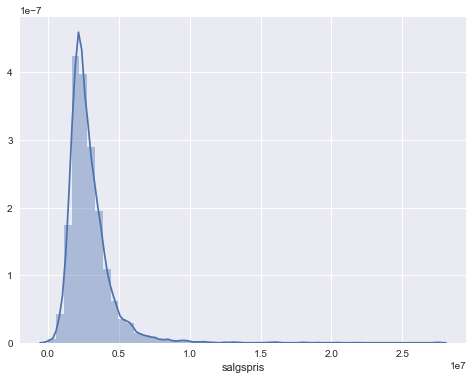

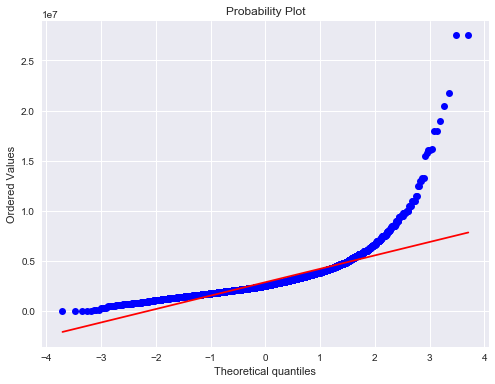

In [1480]:
# histogram of target label
plt.subplots(figsize=(8, 6))
sns.distplot(final['salgspris'])
print("Skewness: %f" % final['salgspris'].skew())
print("Kurtosis: %f" % final['salgspris'].kurt()) 

plt.subplots(figsize=(8, 6))
prob_plot = stats.probplot(final['salgspris'], plot=plt)

The histogram shows the frequency of salesprices in the dataset. Salesprice seems to follow a uniform distribution, however with a positive skew, i.e. right-tailed skewnes indicated by the positive skewness measure as well as a heavily-tailed distribution indicated by the kurtosis measure. To follow a normal distribution, the skewness and kurtosis should be zero and three, respectively. Overall, we can observe:

- Deviation from the normal distribution (non-symmetric)
- Positive skewness (right-skewed) 
- Heavily-tailed distribution
- One peak showing the most frequent salesprice

### 1.4.1 Relationship with independent features 

#### Numerical features 

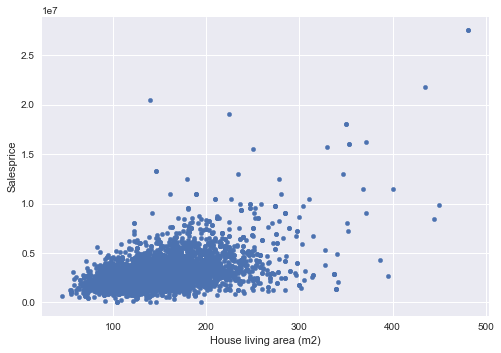

In [1683]:
# Scatterplot of salgspris vs. boligareal
final.plot.scatter(x='boligareal', y='salgspris')
plt.xlabel('House living area (m2)')
plt.ylabel("Salesprice")

Is there a linear relationship? The scatterplot indicates a positive linear relationship with a bigger spread as the m2 increases. What is the reason for that? Agricultural houses with a lot of space, but cheap in price? Or just normal houses in bad condition and/or bad location? 

Furthermore, since the scatterplot does not indicate a strong positive linear relationship, it's natural to believe that there are other variables that can explain salesprice. 

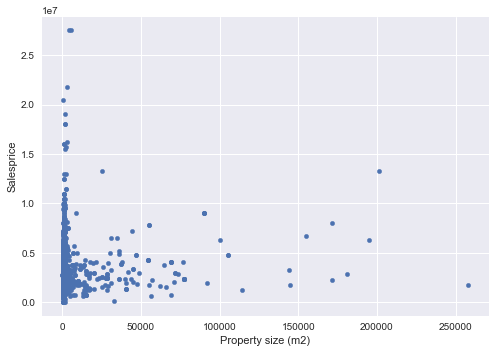

In [1682]:
# Scatterplot of salgspris vs. grundareal
final.plot.scatter(x='grundareal', y='salgspris')
plt.xlabel('Property Size (m2)')
plt.ylabel("Salesprice")

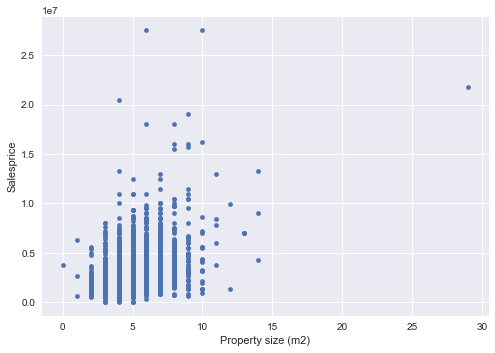

In [1681]:
# Scatterplot for salesprice vs. 
final.plot.scatter(x='vaerelse', y='salgspris')
plt.xlabel('Number of rooms')
plt.ylabel("Salesprice")

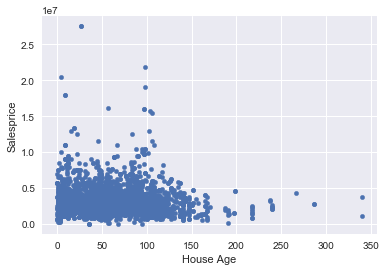

In [1564]:
# Scatterplot for number of rooms vs. salesprice
final.plot.scatter(x='hus_alder', y='salgspris')
plt.xlabel('House Age')
plt.ylabel("Salesprice")

#### Categorical features 

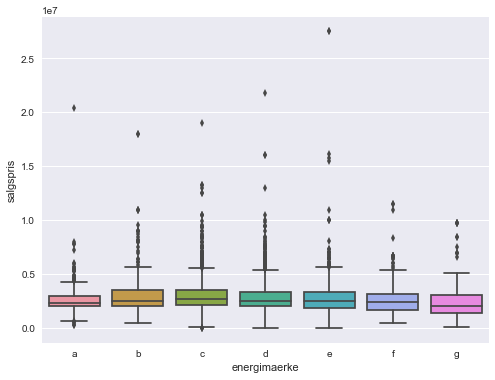

In [1434]:
# box plot for salesprice vs. energimaerke
data = pd.concat([final['salgspris'], final['energimaerke']], axis = 1)
# data = data.loc[data['energimaerke'] != "NA"]
plt.subplots(figsize=(8, 6))
sns.boxplot(x = 'energimaerke', y = 'salgspris', data = data)

Doesn't seem like the level of energimaerke has much to say about the sales price. The better the energimaerke is, the the higher the salesprice is not necessarily true. Therefore, energimaerke is not exactly a valid indicator of the quality of the house.

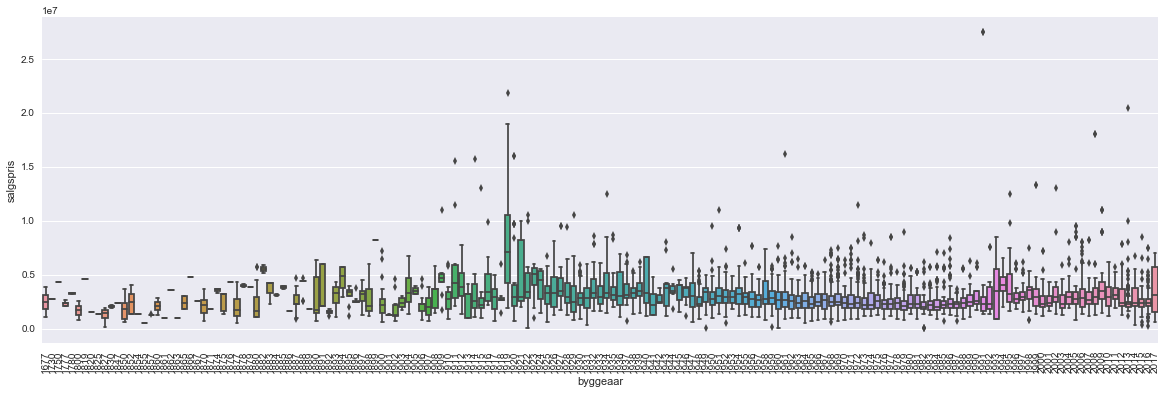

In [1568]:
# Box plot for sales prices vs. byggeaar
data = pd.concat([final['salgspris'], final['byggeaar']], axis = 1)
plt.subplots(figsize=(20, 6))
sns.boxplot(x = 'House ', y = 'salgspris', data = data)
res = plt.xticks(rotation= 90)

So are new houses more expensive than old houses? This box plot does not give us any evidence of that. My first assumptions was that newer houses simply were more expensive than old houses, but visually this does not seem to hold.

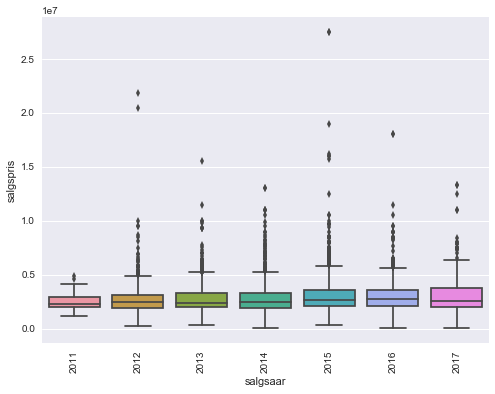

In [1479]:
# Box plot for sales prices vs. year sold
data = pd.concat([final['salgspris'], final['salgsaar']], axis = 1)
plt.subplots(figsize=(8, 6))
sns.boxplot(x = 'salgsaar', y = 'salgspris', data = data)
res = plt.xticks(rotation= 90)

So the salesprice does seem to vary a bit across the years. Again, we must be careful about interpretation since the salesprice does not take inflation into account. Furthermore, given the relatively small amount of observations in the dataset, we should probably conduct statistical test to conclude if the mean salesprice for each year is representative of the true population.

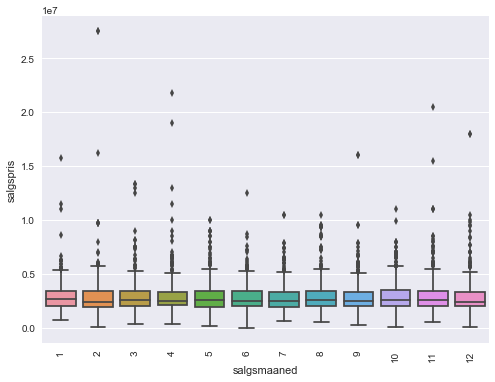

In [1478]:
# Box plot for sales prices vs. month sold
data = pd.concat([final['salgspris'], final['salgsmaaned']], axis = 1)
plt.subplots(figsize=(8, 6))
sns.boxplot(x = 'salgsmaaned', y = 'salgspris', data = data)
res = plt.xticks(rotation= 90)

Visually, there do not seem to be any seasonal pattern where some months have higher salesprice, e.g. because of the change in supply and demand or simply because house owners are more prone to sell their houses at the necessary price. Another exploration would be to check if the number of sold houses varies across months. 

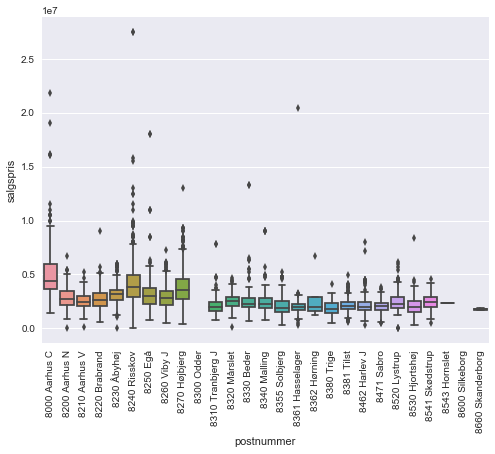

In [1465]:
# Box plot for sales price vs. zipn code
data = pd.concat([final['salgspris'], final['postnummer']], axis = 1)
plt.subplots(figsize=(8, 6))
sns.boxplot(x = 'postnummer', y = 'salgspris', data = data)
res = plt.xticks(rotation = 90)

The above box plot indicates that sales prices vary according the zipcode. For instance, the median price in 8000 Aarhus C is relatively higher than the rest of the zipcode areas. However, the quartil ranges is also spread more out meaning that the price range in also very high. 

#### Heatmap correlation matrix  

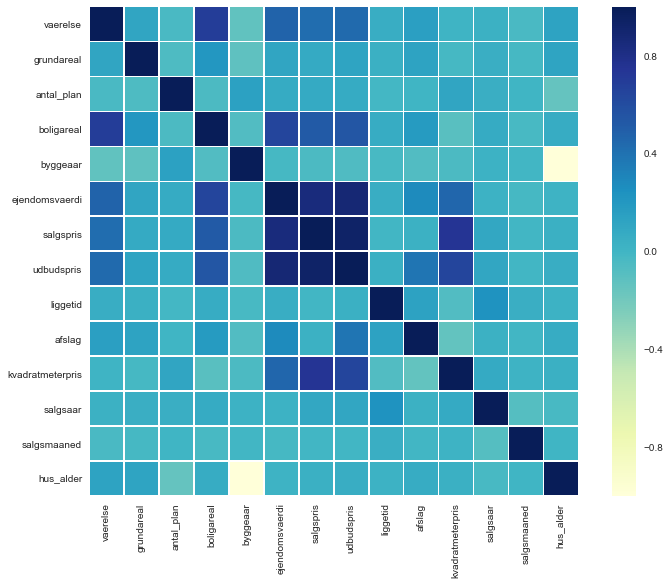

In [1569]:
plt.subplots(figsize=(12, 9))
sns.heatmap(final.corr(method = 'pearson'), vmax = 0.8, square = True, linewidths=.5, cmap="YlGnBu")

#### Scatterplot of salesprice and correlated variables 

The objective is to identify correlation between independent variables, which is a violation against our Ordinary Least Squares assumptions that the independent variables must not be correlated. Also, this pairwise correlation matrix is good for identifying correlation between the dependent and independet variables and could therefore be seen as a pre-step before the regression modelling.

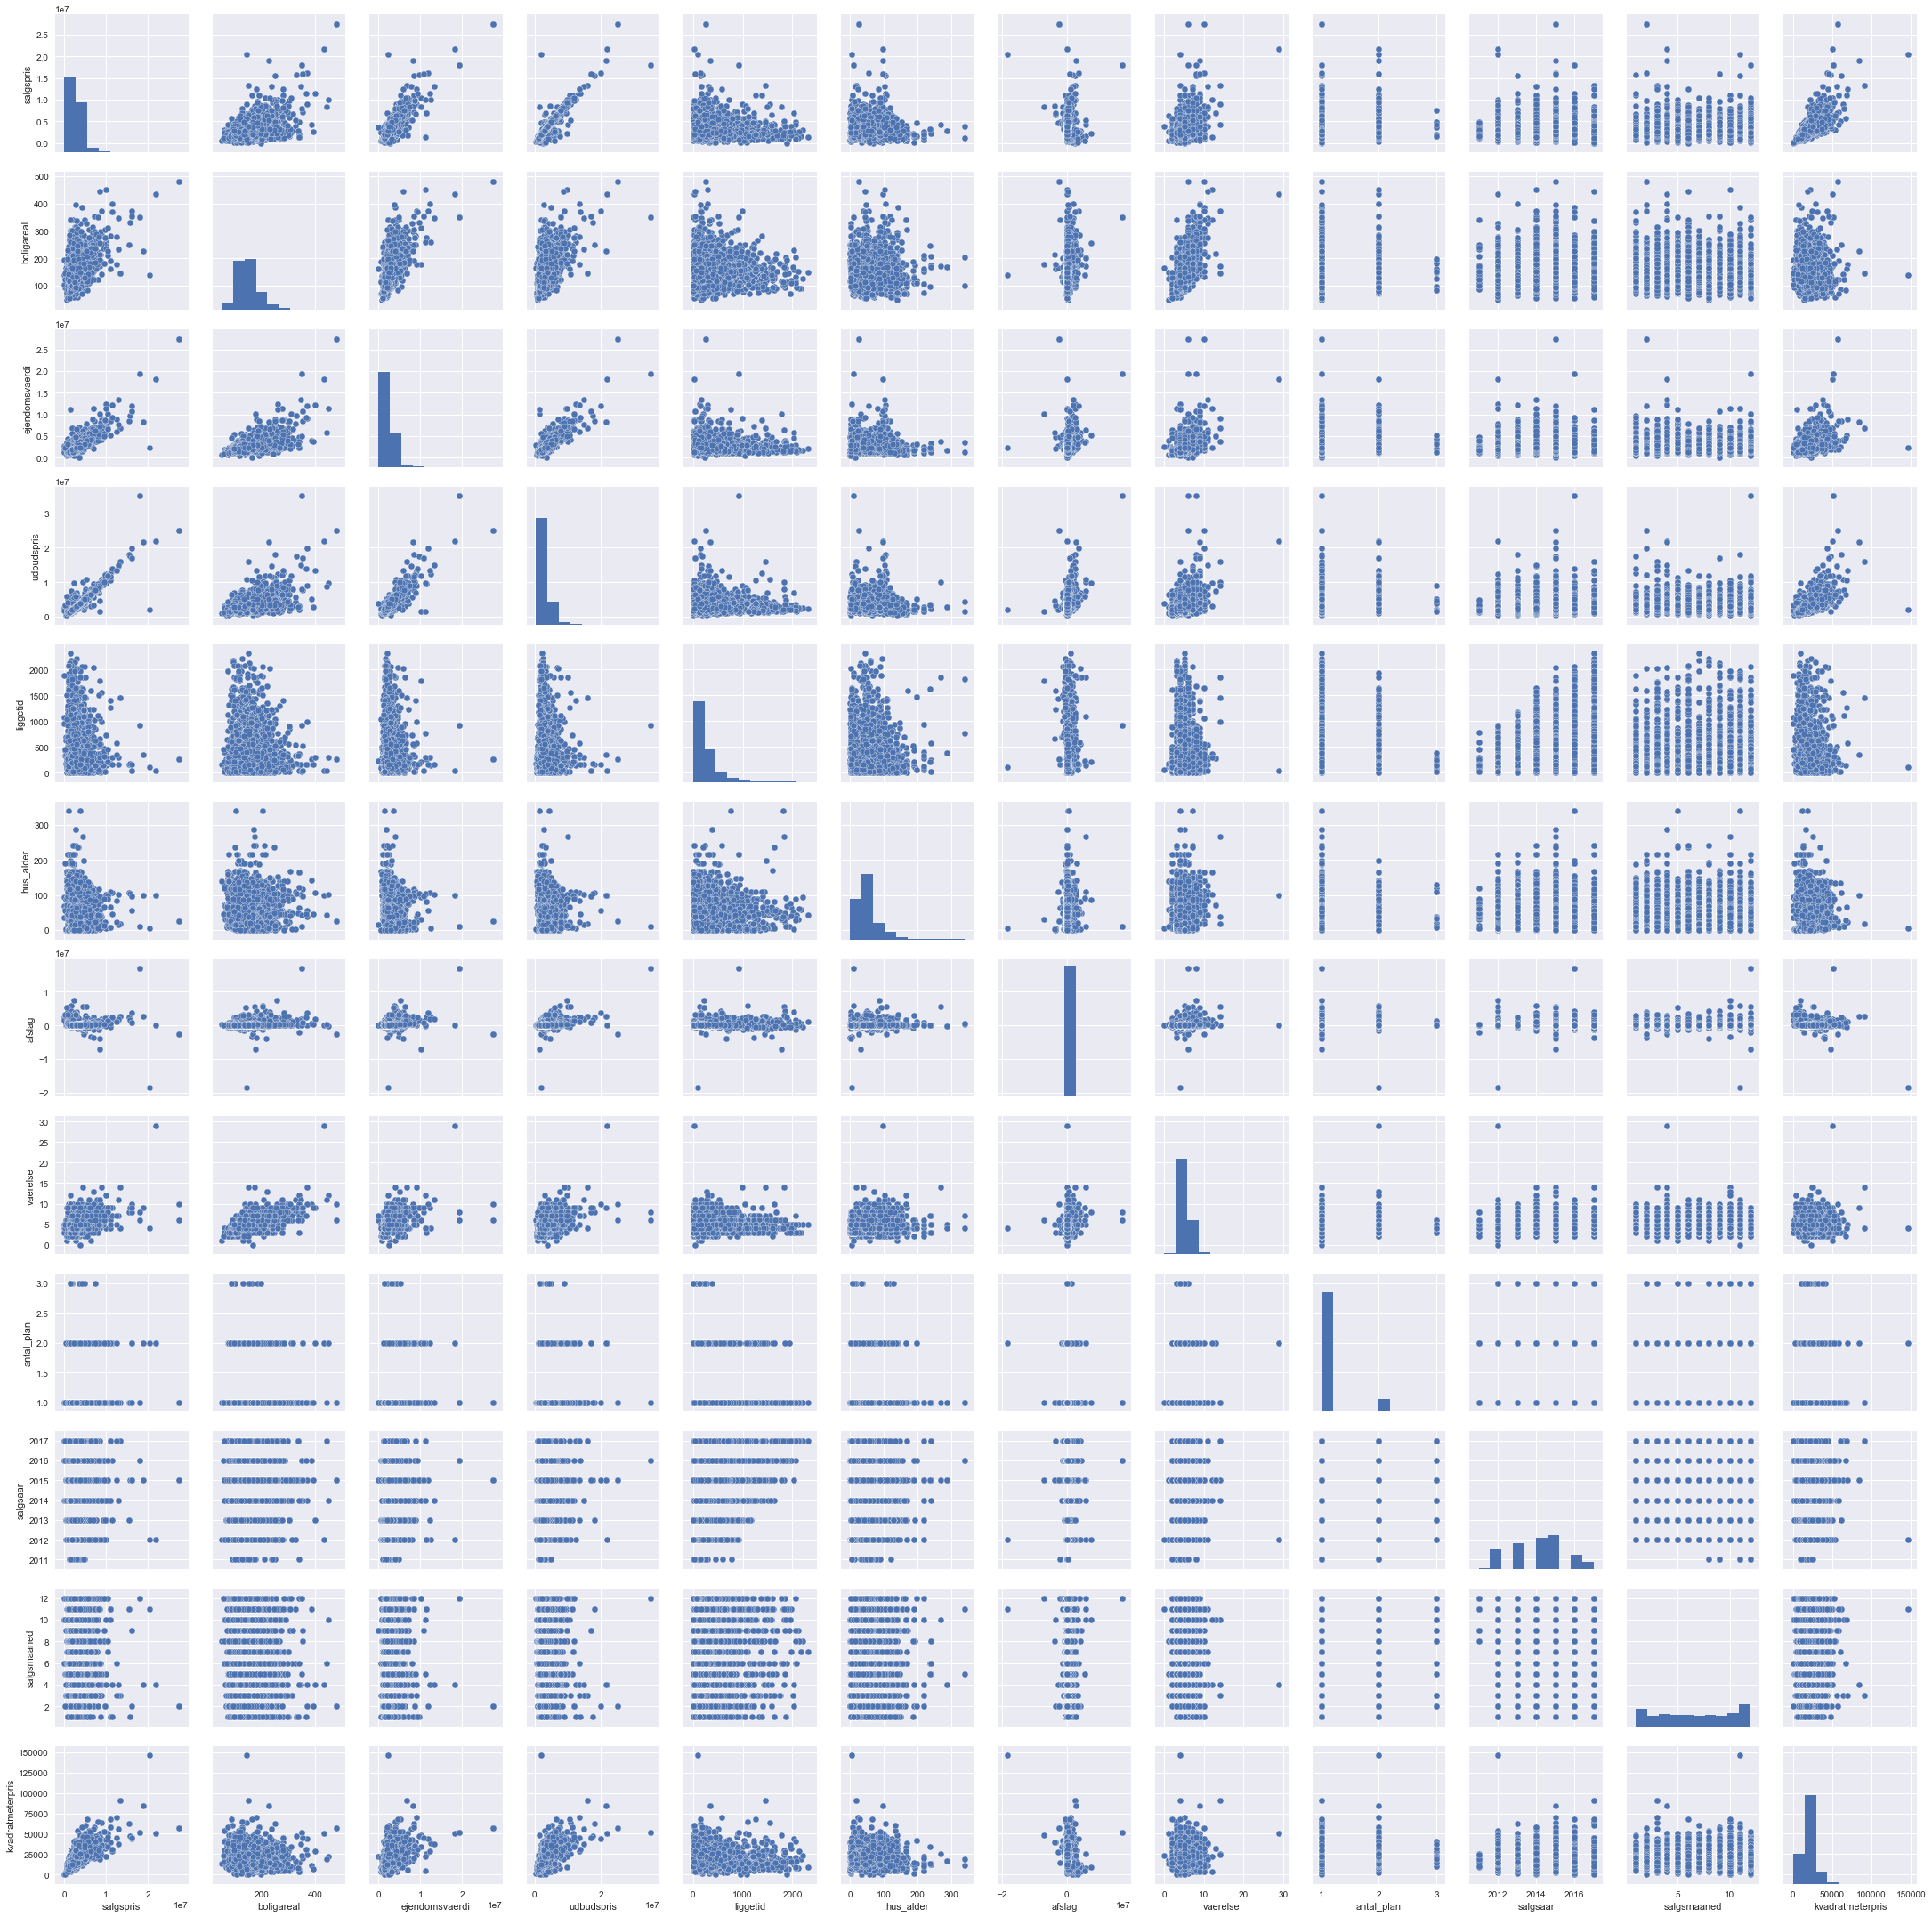

In [1571]:
# pairwise relationships in the dataset
sns.set()
columns = ['salgspris', 'boligareal', 'ejendomsvaerdi', 'udbudspris', 'liggetid', 'hus_alder',
           'afslag', 'vaerelse', 'antal_plan', 'salgsaar', 'salgsmaaned', 'kvadratmeterpris']
sns.pairplot(final[columns], size = 2.5)
plt.show()

### Exploratory outlier analysis

From the target label summary statistics we saw that the sales price range was relatively high, which, worst case, can lead to biased  regression results, since both min and max values can be considered as outliers. But how can we examine that more in-depth? Intuitively, the type of house can maybe explain this pattern. Let's make a boxplot. 

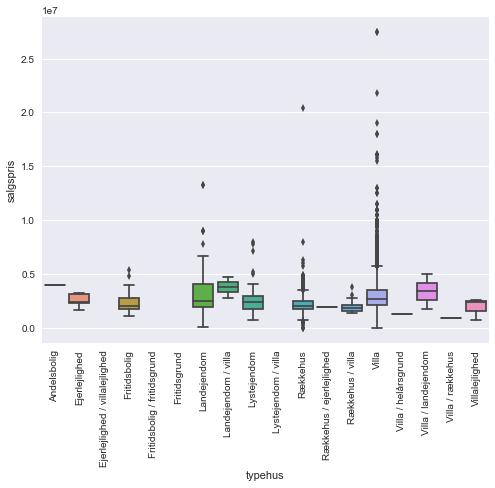

In [1466]:
# box plot for salesprice for each type of house
data = pd.concat([final['salgspris'], final['typehus']], axis = 1)
plt.subplots(figsize=(8, 6))
sns.boxplot(x = 'typehus', y = 'salgspris', data = data)
res = plt.xticks(rotation= 90)

What is interesting here is that the price range for the majority of house types are pretty stable, whereas for Villas, there seems to be many outliers. This is also the case for "Rækkehus". Let's try to filter out outliers for salesprice defined as 3 or more standard devations from the mean. Thus, we standardize the values in salesprice to get a mean 0 and standard deviation of 1. If some of these standardized values are more than 3 standard deviations from the mean, we consider them as outliers. 

In [1472]:
out = final[['salgspris']]
out = out.loc[~out.apply(lambda x: np.abs(x - x.mean()) / x.std() < 3).all(axis=1)]
outliers = pd.merge(out, final, left_index=True, right_index = True)

In [1476]:
outliers.head()

,salgspris_x,typehus,vaerelse,postnummer,adresse,energimaerke,href,grundareal,antal_plan,boligareal,byggeaar,ejendomsvaerdi,liggetid_slut,liggetid_start,salgsdato,salgspris_y,udbudspris,varmekilde,ydervaegsmateriale,liggetid,afslag,kvadratmeterpris,salgsaar,salgsmaaned
43,8995000,Villa,6,8270 Højbjerg,Bakkedraget 18,d,https://www.boligsiden.dk/arkiv/481017546,835,1,142,2005,4150000,2012-06-14,2010-12-08,2015-03-02,8995000,10900000,Fjernvarme/blokvarme (radiatorsystemer el. var...,"Mursten (tegl, kalksten, cementsten)",1545,1905000,63345,2015,3
75,13300000,Landejendom,14,8330 Beder,Elmosevej 41,c,https://www.boligsiden.dk/arkiv/374977940,25000,1,146,1999,6750000,2017-03-25,2013-03-27,2017-03-23,13300000,15900000,"Centralvarme fra eget anlæg, etkammer fyr","Mursten (tegl, kalksten, cementsten)",1457,2600000,91095,2017,3
79,27500000,Villa,10,8240 Risskov,Tranevej 29,e,https://www.boligsiden.dk/arkiv/868175869,4019,1,481,1991,27500000,2014-06-23,2014-05-22,2015-02-06,27500000,25000000,Fjernvarme/blokvarme (radiatorsystemer el. var...,"Mursten (tegl, kalksten, cementsten)",260,-2500000,57172,2015,2
91,9000000,Landejendom,6,8340 Malling,Norsmindevej 150,b,https://www.boligsiden.dk/arkiv/133277076,90152,1,285,2009,8600000,2016-04-07,2016-04-13,2016-05-07,9000000,10000000,Varmepumpe,"Mursten (tegl, kalksten, cementsten)",24,1000000,31578,2016,5
280,9500000,Villa,9,8240 Risskov,Egelundsvej 2,d,https://www.boligsiden.dk/arkiv/921060617,1407,2,247,1927,7200000,2012-10-12,2012-03-14,2012-09-12,9500000,9850000,Fjernvarme/blokvarme (radiatorsystemer el. var...,"Mursten (tegl, kalksten, cementsten)",182,350000,38461,2012,9


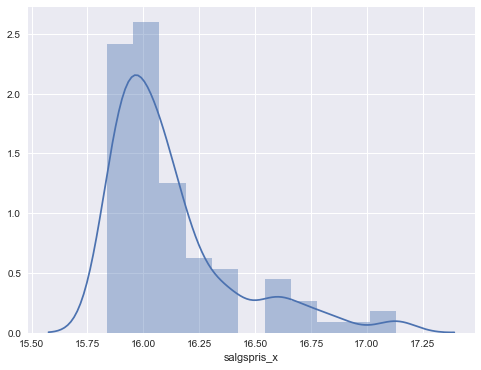

In [1477]:
# Histogram showing distribution of outliers
plt.subplots(figsize=(8, 6))
sns.distplot(np.log(outliers['salgspris_x']))

## Predicting salesprice using multivariate linear regression

In [1225]:
# Converting categorical variables into dummy variables 
cat_columns = ['typehus', 'postnummer', 'energimaerke', 'varmekilde', 'ydervaegsmateriale']
int_columns = ['grundareal', 'boligareal', 'ejendomsvaerdi', 'liggetid', 'afslag']
data = pd.concat([final[cat_columns], final[int_columns]], axis = 1)
regression = pd.get_dummies(data = data)

In [1519]:
import statsmodels.api as sm # import statsmodels 
from statsmodels.sandbox.regression.predstd import wls_prediction_std

X = final[["boligareal", 'vaerelse']] # independent variables
y = final["salgspris"] # dependent variable
X = sm.add_constant(X) # intercept (beta_0) 

model = sm.OLS(y, X).fit() 
predictions = model.predict(X)

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              salgspris   R-squared:                       0.276
Model:                            OLS   Adj. R-squared:                  0.276
Method:                 Least Squares   F-statistic:                     1253.
Date:                Sun, 22 Oct 2017   Prob (F-statistic):               0.00
Time:                        17:04:01   Log-Likelihood:            -1.0208e+05
No. Observations:                6582   AIC:                         2.042e+05
Df Residuals:                    6579   BIC:                         2.042e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -5.697e+04   6.39e+04     -0.891      0.373   -1.82e+05    6.83e+04
boligareal  1.532e+04    519.381     29.488      0.000    1.43e+04    1.63e+04
vaerelse    1.444e+05   1.66e+04      8.711      0.000    1.12e+05    1.77e+05
==============================================================================
Omnibus:                     4812.833   Durbin-Watson:                   1.856
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           233540.662
Skew:                           2.989   Prob(JB):                         0.00
Kurtosis:                      31.562   Cond. No.                         606.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [1547]:
# Standardized coefficients
from scipy.stats.mstats import zscore

X = final[["boligareal", 'vaerelse']] # independent variables
y = final["salgspris"] # dependent variable

z_model = sm.OLS(zscore(y), zscore(X)).fit()
z_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.276
Model:                            OLS   Adj. R-squared:                  0.276
Method:                 Least Squares   F-statistic:                     1253.
Date:                Sun, 22 Oct 2017   Prob (F-statistic):               0.00
Time:                        19:11:42   Log-Likelihood:                -8277.2
No. Observations:                6582   AIC:                         1.656e+04
Df Residuals:                    6580   BIC:                         1.657e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.4293      0.015     29.490      0.000       0.401       0.458
x2             0.1268      0.015      8.711      0.000       0.098       0.155
==============================================================================
Omnibus:                     4812.833   Durbin-Watson:                   1.856
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           233540.662
Skew:                           2.989   Prob(JB):                         0.00
Kurtosis:                      31.562   Cond. No.                         2.35
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

To access the importance of the predictor variables and determine which variable that has the highest importance on predicting salesprices, we must standardize the data by substracting each value from its mean and divide by the standard deviation, so that the variance of both the dependent and independet variables becomes 1. 

After doing so and running the regression again, we get standardized coefficients that allow us to compare predictor variables that orginally where in different units. 

Specifially we look for the predictor variable with the largest absolute value for the standardized coefficient. These standardized coefficients represent the standard deviation change in the dependent variable given a one standard deviation change in the predictor variable. In the above statistic ouput, x1 (boligareal) is the most important variable in the regression model.

Also, the intercept is not included since it is identically equal to zero.

Another method is to inspect the change in the coefficient of determination (R-squared) when we add one variable to the model at a time.

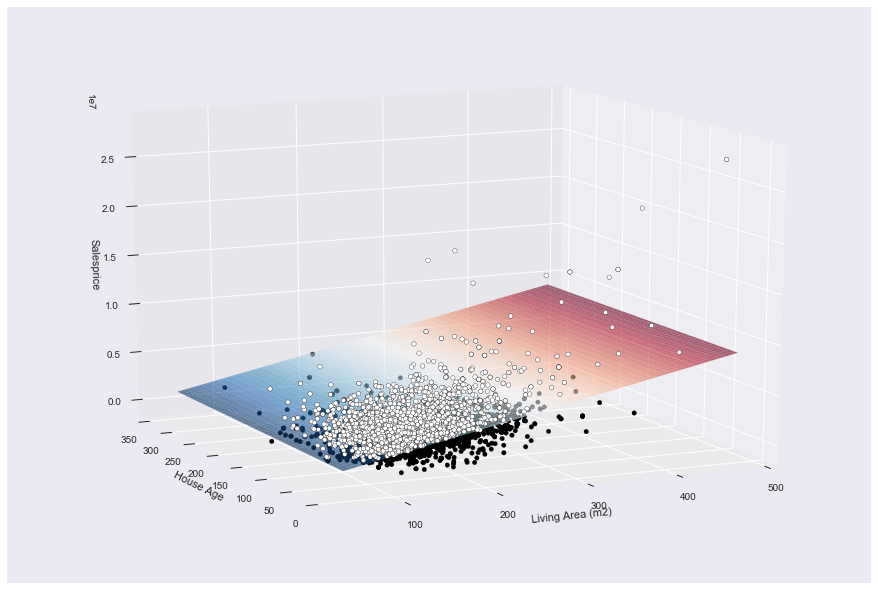

In [1582]:
# 3D plot
from mpl_toolkits.mplot3d import Axes3D

X = final[["boligareal", 'hus_alder']] # independent variables
y = final["salgspris"] # dependent variable
X = sm.add_constant(X) # intercept (beta_0) 

model = sm.OLS(y, X).fit() 

xx1, xx2 = np.meshgrid(np.linspace(X.boligareal.min(), X.boligareal.max(), 100), 
                       np.linspace(X.hus_alder.min(), X.hus_alder.max(), 100))

# plot the hyperplane by evaluating the parameters on the grid
Z = model.params[0] + model.params[1] * xx1 + model.params[2] * xx2

# create matplotlib 3d axes
fig = plt.figure(figsize=(12, 8))
ax = Axes3D(fig, azim=-115, elev=15)

# plot hyperplane
surf = ax.plot_surface(xx1, xx2, Z, cmap=plt.cm.RdBu_r, alpha=0.6, linewidth=0)

# plot data points - points over the HP are white, points below are black
resid = y - model.predict(X)
ax.scatter(X[resid >= 0].boligareal, X[resid >= 0].hus_alder, y[resid >= 0], color='black', alpha=1.0, facecolor='white')
ax.scatter(X[resid < 0].boligareal, X[resid < 0].hus_alder, y[resid < 0], color='black', alpha=1.0)
#ax.invert_yaxis()

# set axis labels
ax.set_xlabel('Living Area (m2)')
ax.set_ylabel('House Age')
ax.set_zlabel('Salesprice')

In [1642]:
# Regression with dummy variables

# Converting categorical variables into dummy variables 
cat_columns = ['postnummer'] # try also: typehus, varmekilde, ydervaegsmateriale
int_columns = ['grundareal', 'boligareal', 'vaerelse']
data = pd.concat([final[cat_columns], final[int_columns]], axis = 1)
regression = pd.get_dummies(data = data, drop_first = True) # dropping first dummy to avoid multicollinearity (postnummer_8000 Aarhus C)

X = regression # independent variables
y = final["salgspris"] # dependent variable
X = sm.add_constant(X) # adding intercept (beta_0) with a constant of 1 as initial value

model = sm.OLS(y, X).fit() 
predictions = model.predict(X)

# Print out the statistics
model.summary()

/Users/madshelt/anaconda/envs/py35/lib/python3.5/site-packages/statsmodels/base/model.py:1036: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse
/Users/madshelt/anaconda/envs/py35/lib/python3.5/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/madshelt/anaconda/envs/py35/lib/python3.5/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/Users/madshelt/anaconda/envs/py35/lib/python3.5/site-packages/scipy/stats/_distn_infrastructure.py:1818: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              salgspris   R-squared:                       0.481
Model:                            OLS   Adj. R-squared:                  0.478
Method:                 Least Squares   F-statistic:                     224.6
Date:                Mon, 23 Oct 2017   Prob (F-statistic):               0.00
Time:                        20:39:48   Log-Likelihood:            -1.0098e+05
No. Observations:                6582   AIC:                         2.020e+05
Df Residuals:                    6554   BIC:                         2.022e+05
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                        2.563e+06   1.12e+05     22.918      0.000    2.34e+06    2.78e+06
grundareal                      6.4571      1.525      4.234      0.000       3.467       9.447
boligareal                   1.489e+04    456.382     32.617      0.000     1.4e+04    1.58e+04
vaerelse                     8.182e+04   1.42e+04      5.745      0.000    5.39e+04     1.1e+05
postnummer_8200 Aarhus N    -2.051e+06   1.18e+05    -17.449      0.000   -2.28e+06   -1.82e+06
postnummer_8210 Aarhus V    -2.368e+06   1.11e+05    -21.283      0.000   -2.59e+06   -2.15e+06
postnummer_8220 Brabrand    -2.355e+06    1.1e+05    -21.480      0.000   -2.57e+06   -2.14e+06
postnummer_8230 Åbyhøj      -1.773e+06   1.15e+05    -15.394      0.000      -2e+06   -1.55e+06
postnummer_8240 Risskov     -1.097e+06   1.03e+05    -10.692      0.000    -1.3e+06   -8.96e+05
postnummer_8250 Egå         -1.953e+06   1.12e+05    -17.360      0.000   -2.17e+06   -1.73e+06
postnummer_8260 Viby J      -2.207e+06   1.04e+05    -21.121      0.000   -2.41e+06      -2e+06
postnummer_8270 Højbjerg     -1.56e+06   1.04e+05    -15.058      0.000   -1.76e+06   -1.36e+06
postnummer_8300 Odder        4.829e-09   2.28e-09      2.121      0.034    3.66e-10    9.29e-09
postnummer_8310 Tranbjerg J -2.808e+06   1.11e+05    -25.327      0.000   -3.03e+06   -2.59e+06
postnummer_8320 Mårslet     -2.587e+06   1.22e+05    -21.264      0.000   -2.83e+06   -2.35e+06
postnummer_8330 Beder       -2.549e+06   1.31e+05    -19.496      0.000    -2.8e+06   -2.29e+06
postnummer_8340 Malling     -2.847e+06    1.3e+05    -21.958      0.000    -3.1e+06   -2.59e+06
postnummer_8355 Solbjerg    -3.083e+06   1.31e+05    -23.597      0.000   -3.34e+06   -2.83e+06
postnummer_8361 Hasselager  -2.856e+06   1.12e+05    -25.420      0.000   -3.08e+06   -2.64e+06
postnummer_8362 Hørning     -3.173e+06   4.35e+05     -7.292      0.000   -4.03e+06   -2.32e+06
postnummer_8380 Trige       -3.366e+06   1.34e+05    -25.215      0.000   -3.63e+06    -3.1e+06
postnummer_8381 Tilst       -2.888e+06   1.13e+05    -25.474      0.000   -3.11e+06   -2.67e+06
postnummer_8462 Harlev J    -3.218e+06   1.29e+05    -24.990      0.000   -3.47e+06   -2.97e+06
postnummer_8471 Sabro       -2.986e+06   1.24e+05    -24.022      0.000   -3.23e+06   -2.74e+06
postnummer_8520 Lystrup     -2.636e+06   1.09e+05    -24.186      0.000   -2.85e+06   -2.42e+06
postnummer_8530 Hjortshøj   -3.097e+06   1.27e+05    -24.355      0.000   -3.35e+06   -2.85e+06
postnummer_8541 Skødstrup   -2.836e+06   1.16e+05    -24.345      0.000   -3.06e+06   -2.61e+06
postnummer_8543 Hornslet    -3.441e+06   1.12e+06     -3.071      0.002   -5.64e+06   -1.24e+06
postnummer_8600 Silkeborg            0          0        nan        nan           0           0
postnummer_

This is the output of the multiple regression with grundareal, boligareal, vaerelse and postnummer with dummy encoding as the independent variables. I have excluded one dummy (8000 Aarhus C) to avoid multicollinaerity, so this will be my base meaning that the interpretation of other dummy variables should be compared to my base dummy. It is ovbious to see that all the other zipcodes have lower salesprices than 8000 Aarhus C, meaning that 8000 Aarhus C, on average, has the most expensive houses.

In [ ]:
# Konkluder på grafen ovenfor og prøv at skrive formlen op
# predict something 

###  Residual diagnostics

To investigate if the regression model based on Ordinary Least Square method has a valid fit, we must test four assumptions about the residuals of the model. These are the following:

- The residuals are normally distributed
- The residuals have a constant variance (i.e. homoskedasticity)
- The residuals are independent (i.e. no autocorelation)
- The underlying relation is linear

Especially for autocorrelation and heteroskedasticity, if these are present it can influence our conclusions about significance, e.g. that an independent variable is signficant but in reality not, vice versa. Of this reason, residual diagnostics can help us make valid conclusions about our regression model.

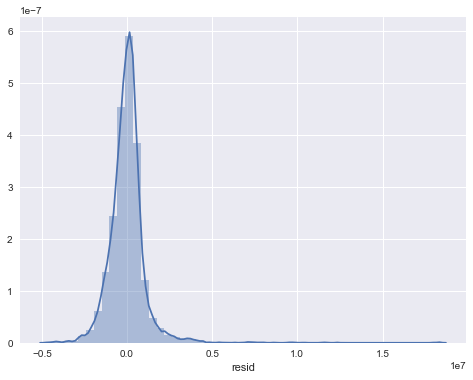

In [1590]:
# Checking for normal distribution
resi d = y - model.predict(X)

plt.subplots(figsize=(8, 6))
sns.distplot(resid, axlabel = "resid")

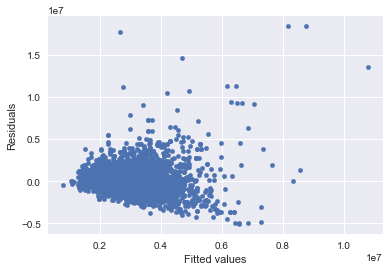

In [1546]:
# Checking for constant variance
fit_resid = pd.DataFrame([predictions, resid], index = ['fitted', 'residuals']).T
fit_resid.plot.scatter(x = 'fitted', y = 'residuals')
plt.xlabel('Fitted values')
plt.ylabel("Residuals")

In [ ]:
res = model.resid # residuals
fig = sm.qqplot(res, fit = True, line = 'q')
plt.show()

### Fixing violation of OLS assumptions 

#### Transformation of target variable 

A natural approach will be to take the log of the target variabel to see if we can get a normal distribution of the salesprice. Thus, our interpretation of y becomes a bit different, since we now talk about the relationship between the percentage change in salesprice with unit changes in the independent variables.

Other transformation could be Cox-box or power of around 0.05 with positive skewness, which is the case in our example.

Skewness: 4.025724
Kurtosis: 37.236864


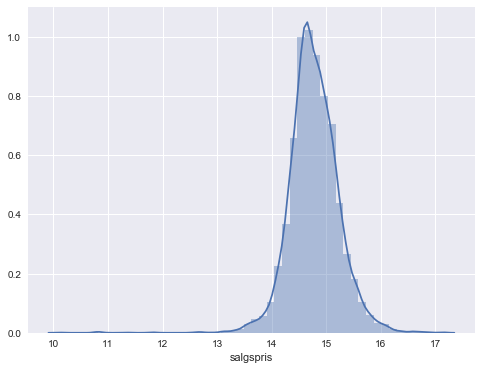

In [1643]:
# histogram of the transformed target label
plt.subplots(figsize=(8, 6))
sns.distplot(np.log(final['salgspris']))
print("Skewness: %f" % final['salgspris'].skew())
print("Kurtosis: %f" % final['salgspris'].kurt()) 

It seems like the log of salesprice moved the distribution closer to what would be considered as a normal distribution. However, we still obseve as skewness of 4 and a kurtosis of 37 indicating long tails, where now it seems like the distribution is more left skewed. Let's try run the same regression with the transformed target variable and see the results 

In [1644]:
# Regression with dummy variables

# Converting categorical variables into dummy variables 
cat_columns = ['postnummer'] # try also: typehus, varmekilde, ydervaegsmateriale
int_columns = ['grundareal', 'boligareal', 'vaerelse']
data = pd.concat([final[cat_columns], final[int_columns]], axis = 1)
regression = pd.get_dummies(data = data, drop_first = True) # dropping first dummy to avoid multicollinearity (postnummer_8000 Aarhus C)

X = regression # independent variables
y = np.log(final["salgspris"]) # dependent variable
X = sm.add_constant(X) # adding intercept (beta_0) with a constant of 1 as initial value

model = sm.OLS(y, X).fit() 
predictions = model.predict(X)

# Print out the statistics
model.summary()

/Users/madshelt/anaconda/envs/py35/lib/python3.5/site-packages/statsmodels/base/model.py:1036: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse
/Users/madshelt/anaconda/envs/py35/lib/python3.5/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/madshelt/anaconda/envs/py35/lib/python3.5/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/Users/madshelt/anaconda/envs/py35/lib/python3.5/site-packages/scipy/stats/_distn_infrastructure.py:1818: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              salgspris   R-squared:                       0.463
Model:                            OLS   Adj. R-squared:                  0.461
Method:                 Least Squares   F-statistic:                     209.5
Date:                Mon, 23 Oct 2017   Prob (F-statistic):               0.00
Time:                        20:41:47   Log-Likelihood:                -2117.9
No. Observations:                6582   AIC:                             4292.
Df Residuals:                    6554   BIC:                             4482.
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                          14.5991      0.034    435.698      0.000      14.533      14.665
grundareal                   1.272e-06   4.57e-07      2.783      0.005    3.76e-07    2.17e-06
boligareal                      0.0038      0.000     27.521      0.000       0.003       0.004
vaerelse                        0.0330      0.004      7.724      0.000       0.025       0.041
postnummer_8200 Aarhus N       -0.4535      0.035    -12.876      0.000      -0.523      -0.384
postnummer_8210 Aarhus V       -0.5412      0.033    -16.233      0.000      -0.607      -0.476
postnummer_8220 Brabrand       -0.5376      0.033    -16.363      0.000      -0.602      -0.473
postnummer_8230 Åbyhøj         -0.3402      0.035     -9.856      0.000      -0.408      -0.273
postnummer_8240 Risskov        -0.2043      0.031     -6.644      0.000      -0.265      -0.144
postnummer_8250 Egå            -0.4209      0.034    -12.489      0.000      -0.487      -0.355
postnummer_8260 Viby J         -0.4895      0.031    -15.635      0.000      -0.551      -0.428
postnummer_8270 Højbjerg       -0.3004      0.031     -9.679      0.000      -0.361      -0.240
postnummer_8300 Odder        1.067e-15   6.82e-16      1.564      0.118   -2.71e-16     2.4e-15
postnummer_8310 Tranbjerg J    -0.7530      0.033    -22.666      0.000      -0.818      -0.688
postnummer_8320 Mårslet        -0.6111      0.036    -16.766      0.000      -0.683      -0.540
postnummer_8330 Beder          -0.6357      0.039    -16.228      0.000      -0.712      -0.559
postnummer_8340 Malling        -0.7145      0.039    -18.388      0.000      -0.791      -0.638
postnummer_8355 Solbjerg       -0.8370      0.039    -21.378      0.000      -0.914      -0.760
postnummer_8361 Hasselager     -0.7538      0.034    -22.389      0.000      -0.820      -0.688
postnummer_8362 Hørning        -0.8246      0.130     -6.324      0.000      -1.080      -0.569
postnummer_8380 Trige          -0.9613      0.040    -24.029      0.000      -1.040      -0.883
postnummer_8381 Tilst          -0.7403      0.034    -21.791      0.000      -0.807      -0.674
postnummer_8462 Harlev J       -0.8496      0.039    -22.016      0.000      -0.925      -0.774
postnummer_8471 Sabro          -0.7944      0.037    -21.329      0.000      -0.867      -0.721
postnummer_8520 Lystrup        -0.6492      0.033    -19.876      0.000      -0.713      -0.585
postnummer_8530 Hjortshøj      -0.8511      0.038    -22.338      0.000      -0.926      -0.776
postnummer_8541 Skødstrup      -0.6916      0.035    -19.812      0.000      -0.760      -0.623
postnummer_8543 Hornslet       -0.7962      0.336     -2.371      0.018      -1.454      -0.138
postnummer_8600 Silkeborg            0          0        nan        nan           0           0
postnummer_

Overall, all the coefficients are signifcant except postnummer_8300 Odder. The adjusted coefficient of determination (adjusted R-squared) is .461, which means that our model is able to explain 46% of the variability in the target variable (salesprice).

Remember the coefficients are log values, and also the dummy variables must be interpreted according to the base dummy which is left out of the model. For instance, if we increase the number of rooms by 1, the average salesprice increases by 3%, ceteris paribus. Also, "grundareal" does not seem to have a powerful effect on salesprice. 

The reason why all the dummy variables have minus values is because we dropped the dummy with the zipcode of the most expensive houses. For instance, the salesprice in postnummer_8200 Aarhus N is on average 45% lower than in Aarhus C (which is the city center).

In this case the interpretation of the constant refers to the average salesprice in the base dummy (Aarhus C). Thus, a house in Aarhus C has an average price of 2.200.000 DKK (exp of the constant value). 

Prediction of an artificial situation:
- grundareal = 500
- boligareal = 200
- vaerelse = 4
- postnummer = 8200 Aarhus V

salesprice = 14.60 + 1.272e-06 x 500 + 0.0038 x 200 + 0.033 x 4 - 0.4535 x  1

salesprice = exp(15) = 3.269.00 DKK 

#### Residuals diagnostics of transformed model 

In [1648]:
# Creating and saving residuals manually
X = regression 
y = np.log(final["salgspris"])
X = sm.add_constant(X)

model = sm.OLS(y, X).fit() 
y_hat = model.predict(X)
residuals = y - y_hat

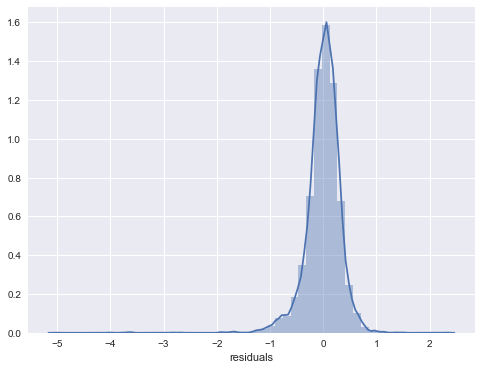

In [1649]:
plt.subplots(figsize=(8, 6))
sns.distplot(residuals, axlabel = "residuals")

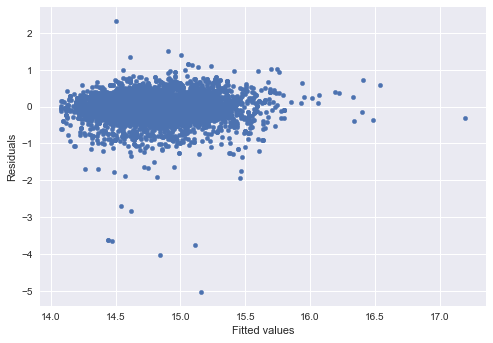

In [1650]:
fit_residuals = pd.DataFrame([y_hat, residuals], index = ['fitted', 'residuals']).T
fit_resid.plot.scatter(x = 'fitted', y = 'residuals')
plt.xlabel('Fitted values')
plt.ylabel("Residuals")

It seems like we managed to remove the heteroskedasticity so that the variance of the residuals is more constant after the transformation of the dependent variable "salesprice". Also, the plot does not show any systematic pattern of the residuals, which indicates that the residuals are not correlated, i.e. no autocorrelation. 

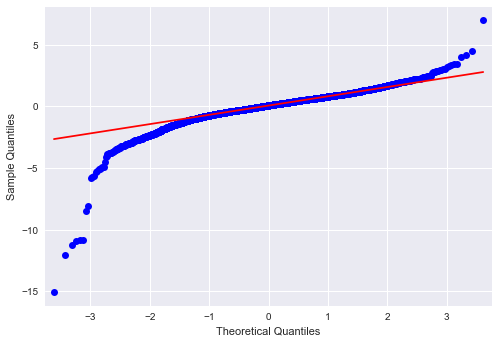

In [1651]:
res = model.resid # residuals
fig = sm.qqplot(res, fit = True, line = 'q')
plt.show()

The above qq plot shows the distributions between the sample quantiles and the theoretical quantiles, thus able to inspect the linearity of the model. If the distribution of the residuals in the regression model followed a normal distribution, the data points will be on line, which is not the case. Actually, the "S" shape indicates that the distribution is skewed and has a tail, which can also be seen from the histogram